In [16]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [18]:
data = pd.read_csv("new_customers.csv")
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
X = data.drop(columns=['CustomerID'])


In [19]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data

    def perform_clustering(self, linkage_type = 'ward'):
        # linkage_matrix = linkage(self.data, method='single')
        linkage_matrix = linkage(self.data, method=linkage_type,metric='euclidean')
        # linkage_matrix = linkage(self.data)
        return linkage_matrix

    def plot_dendrogram(self, linkage_matrix, title = 'Hierarchical Clustering Dendrogram', xlabel = 'Cluster', ylabel = 'Distance'):
        plt.figure(figsize=(12, 8))
        dendrogram(linkage_matrix, leaf_font_size=10)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

# Example usage:
# hc = HierarchicalClustering(X)

Before Normalizing

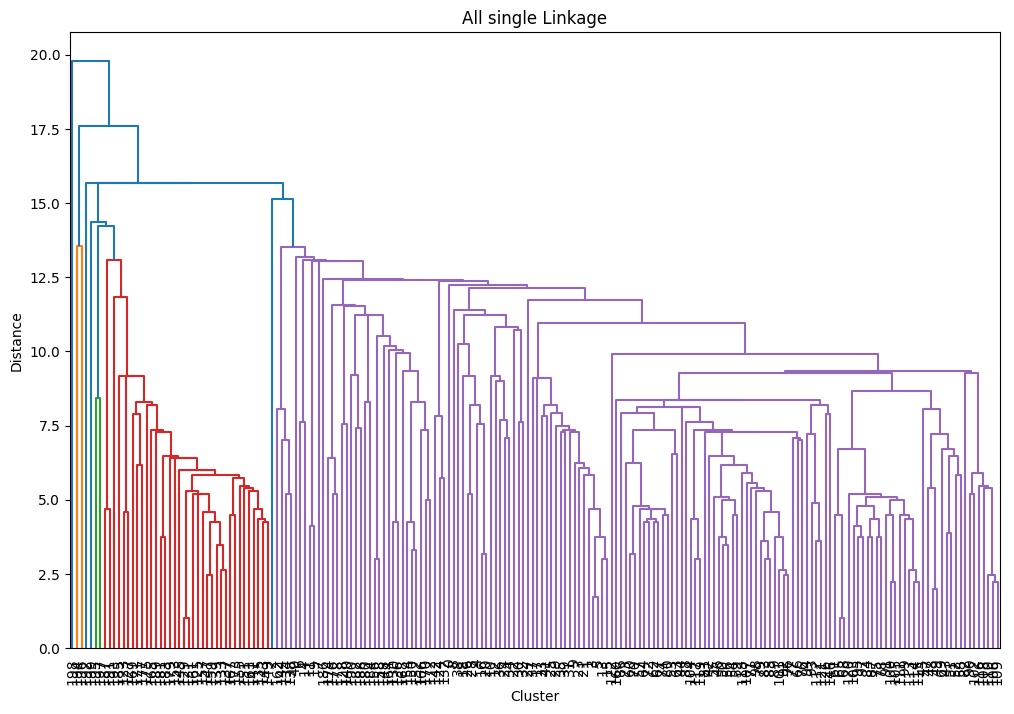

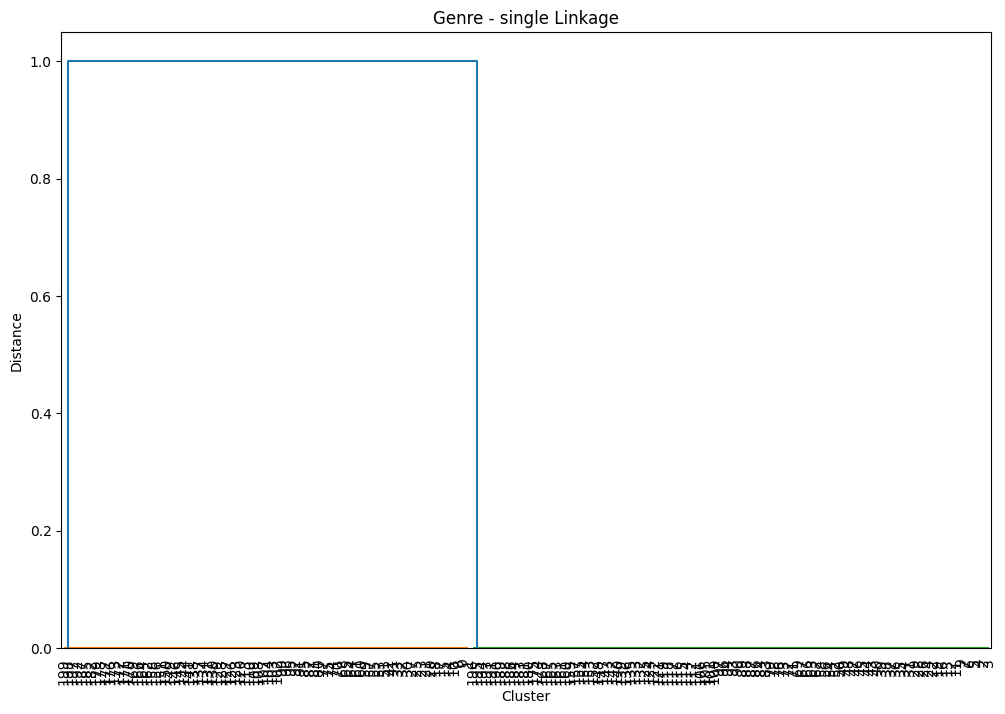

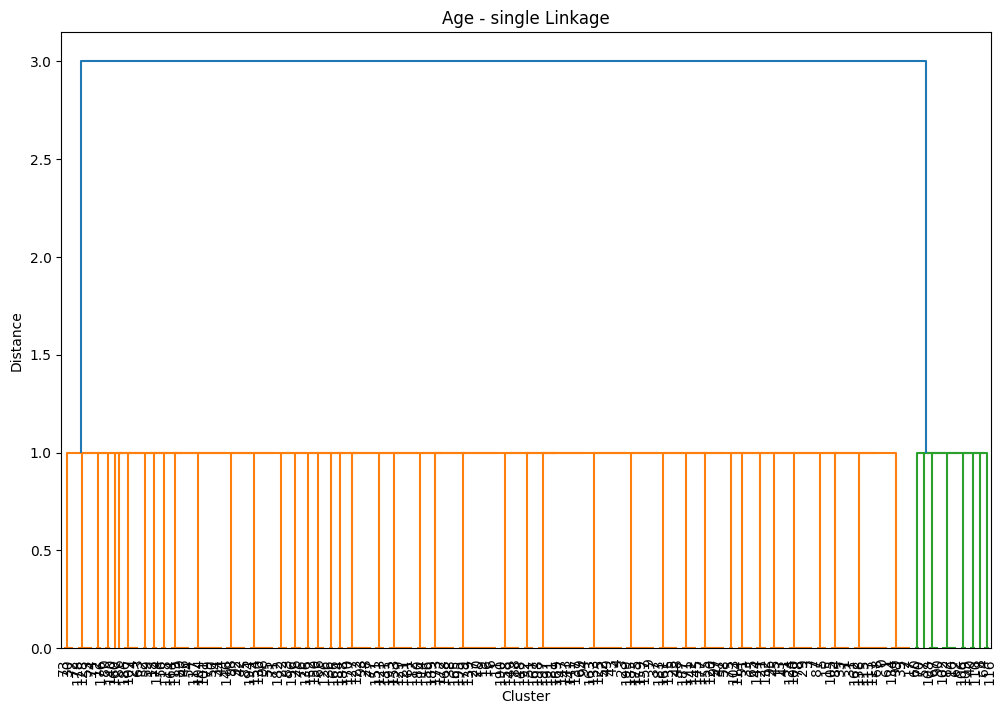

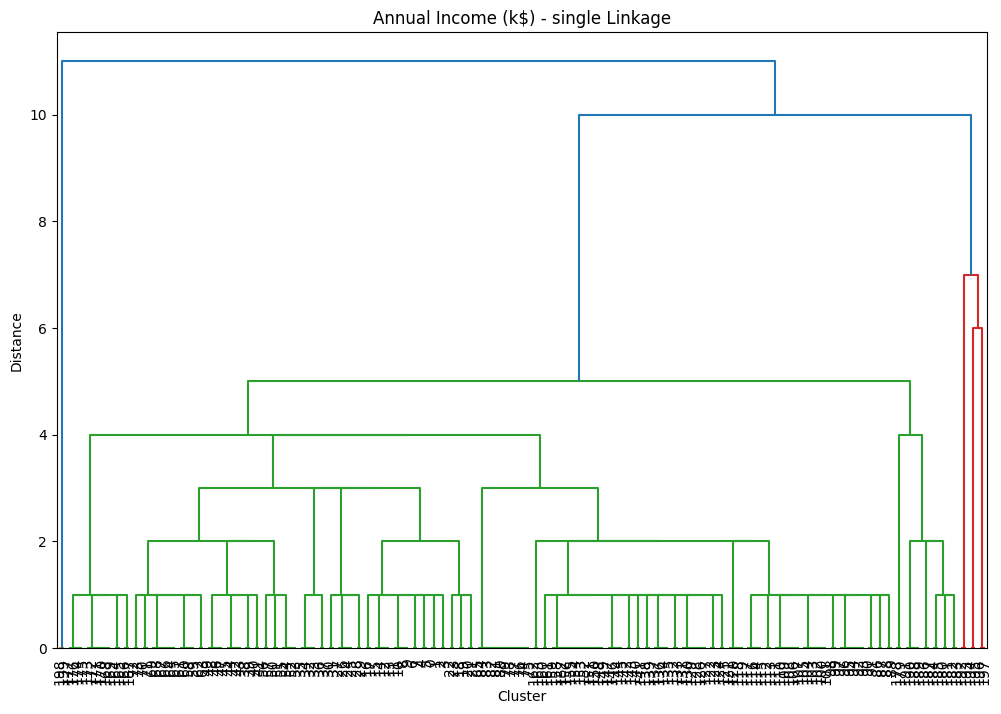

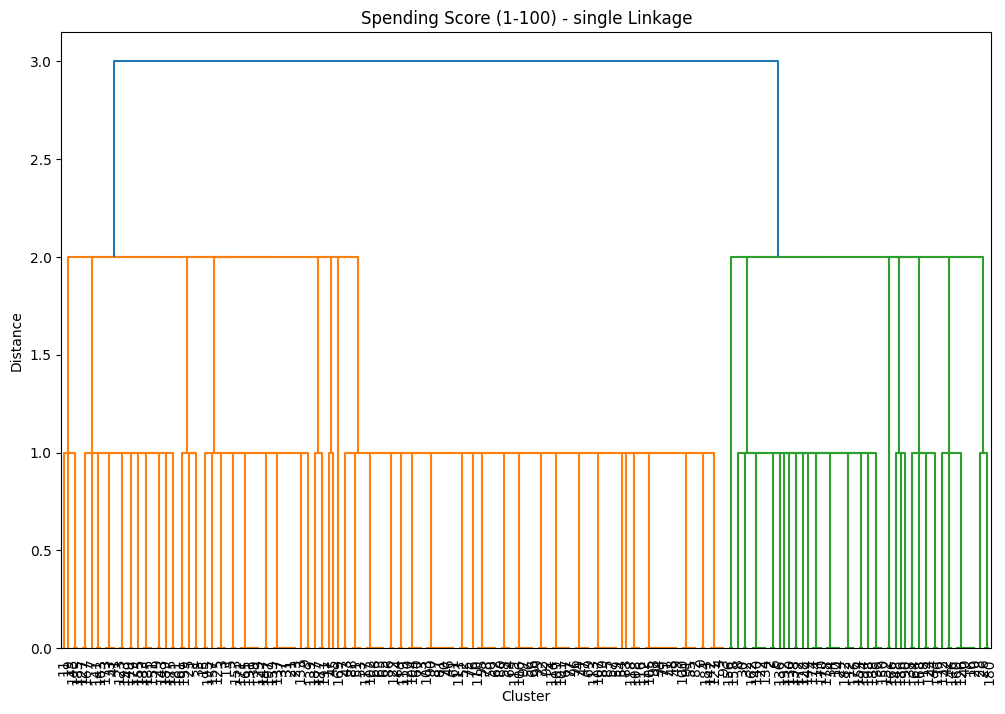

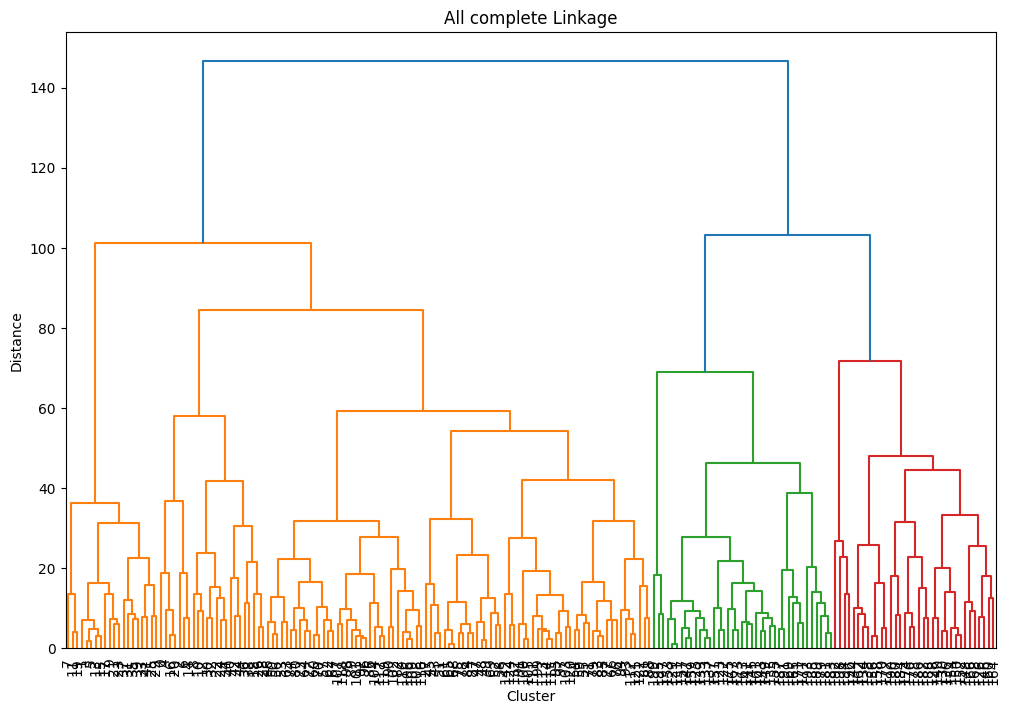

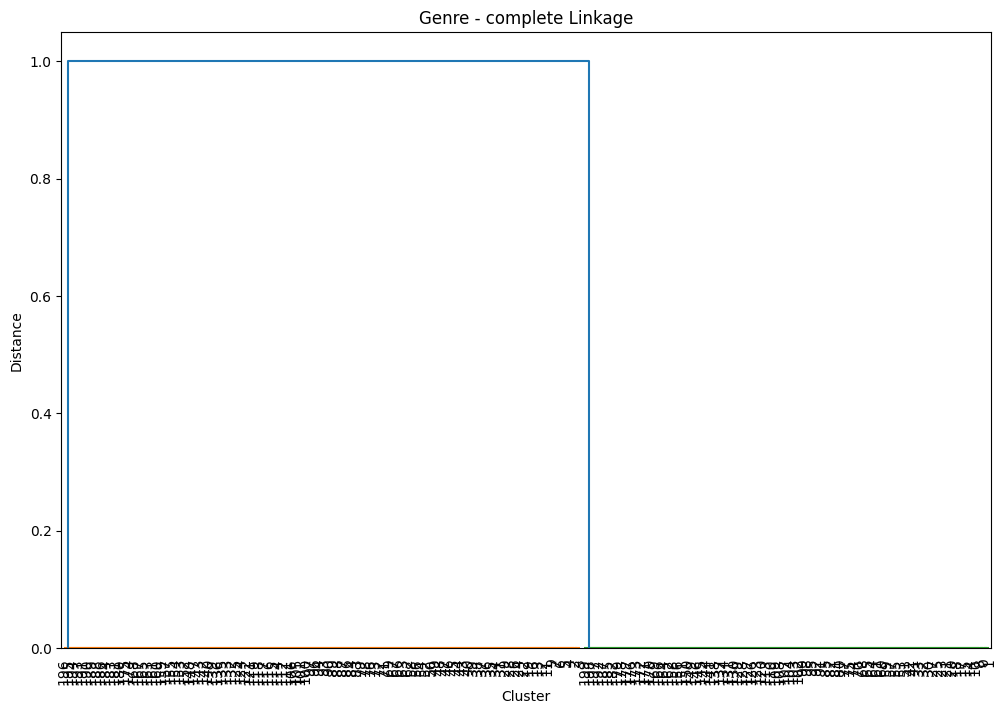

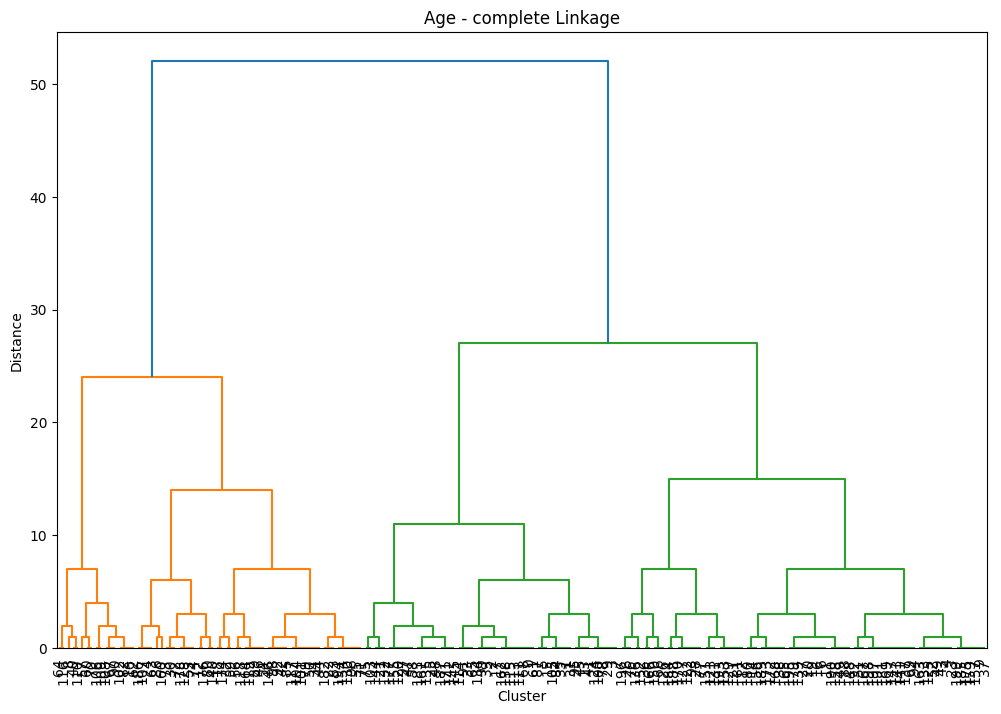

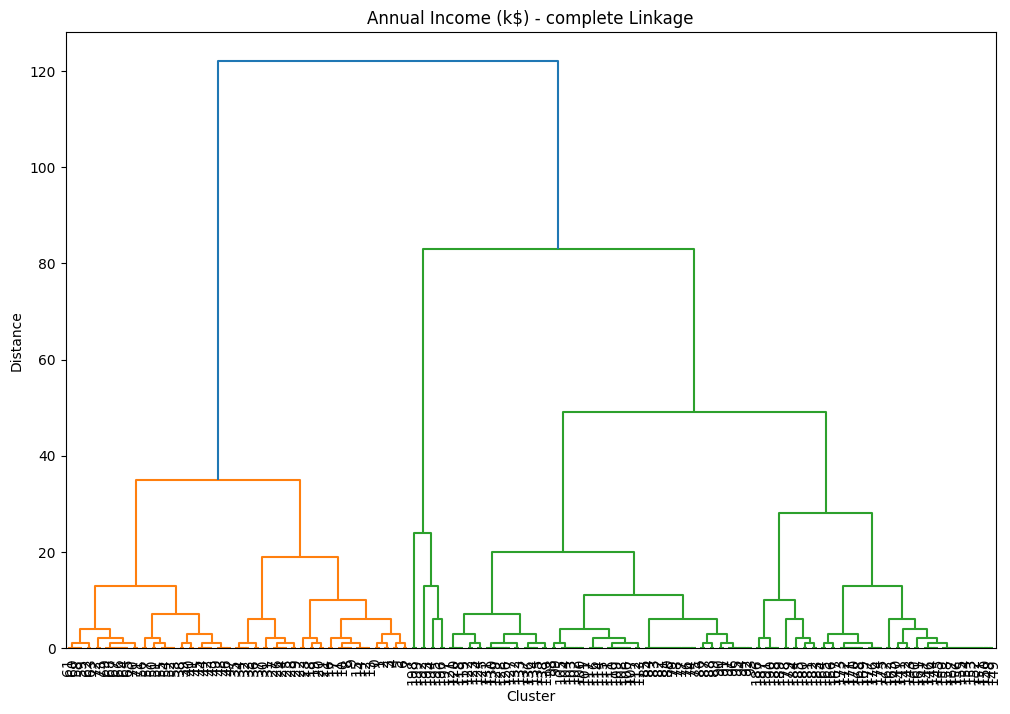

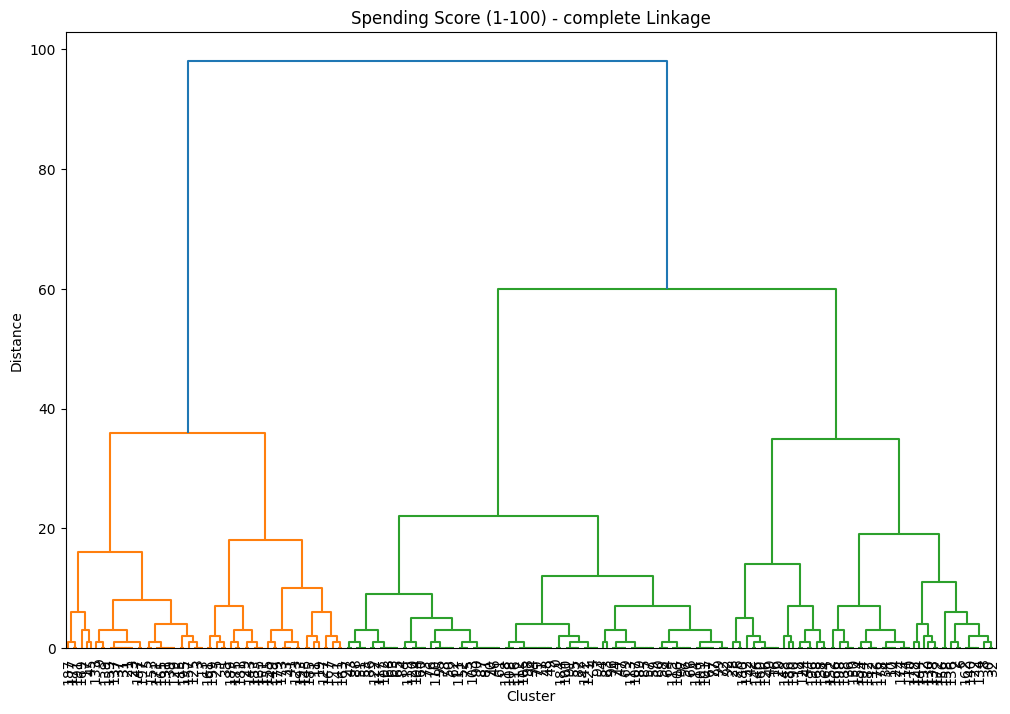

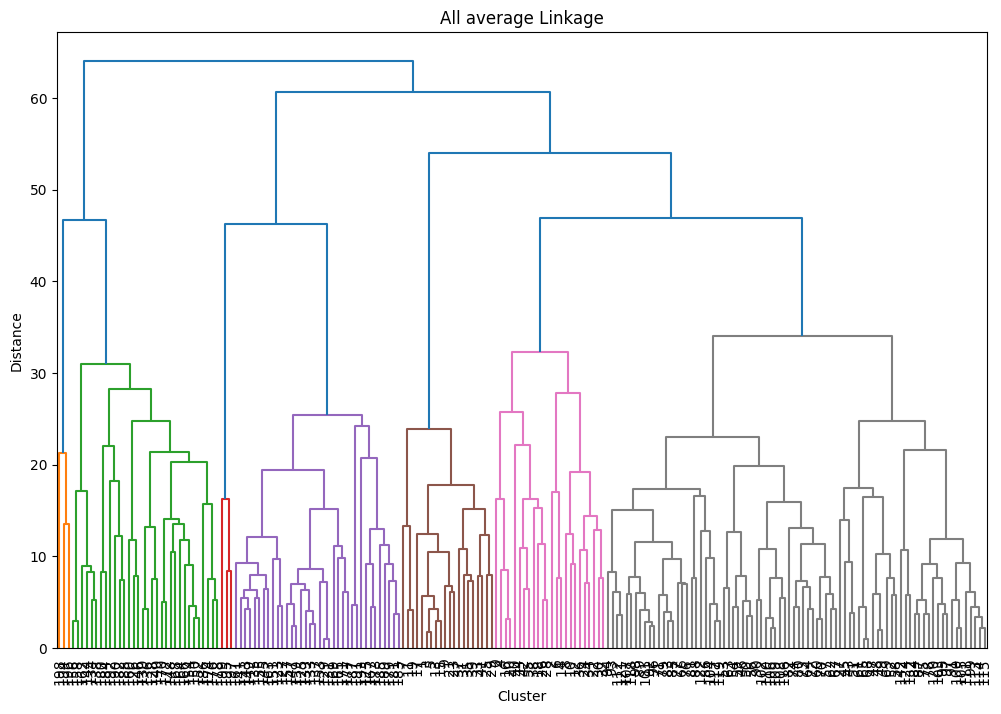

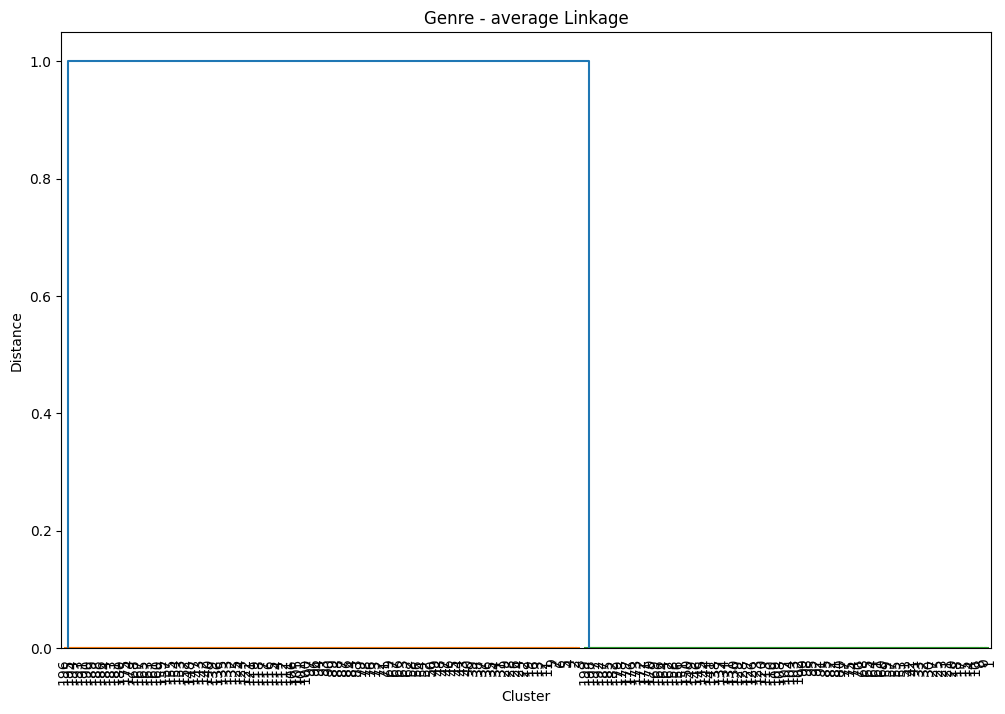

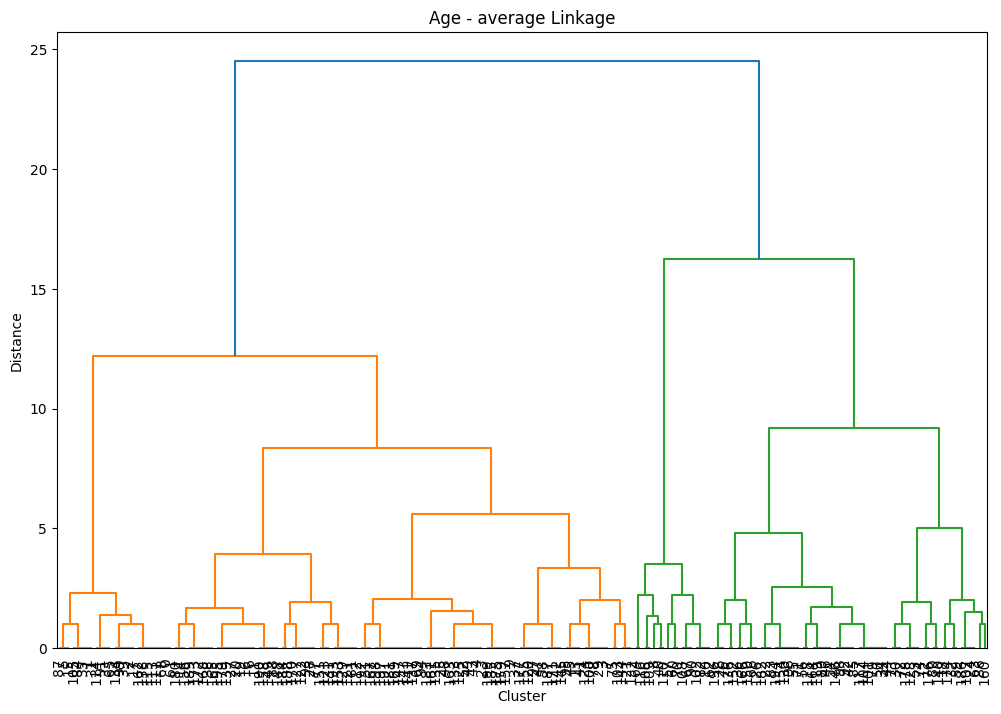

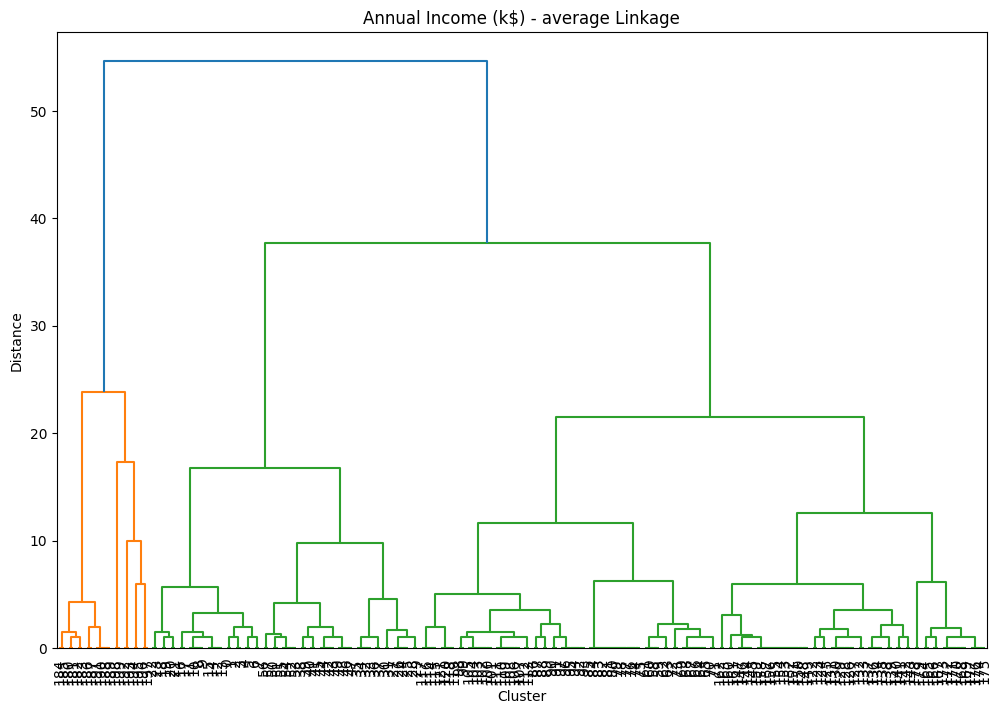

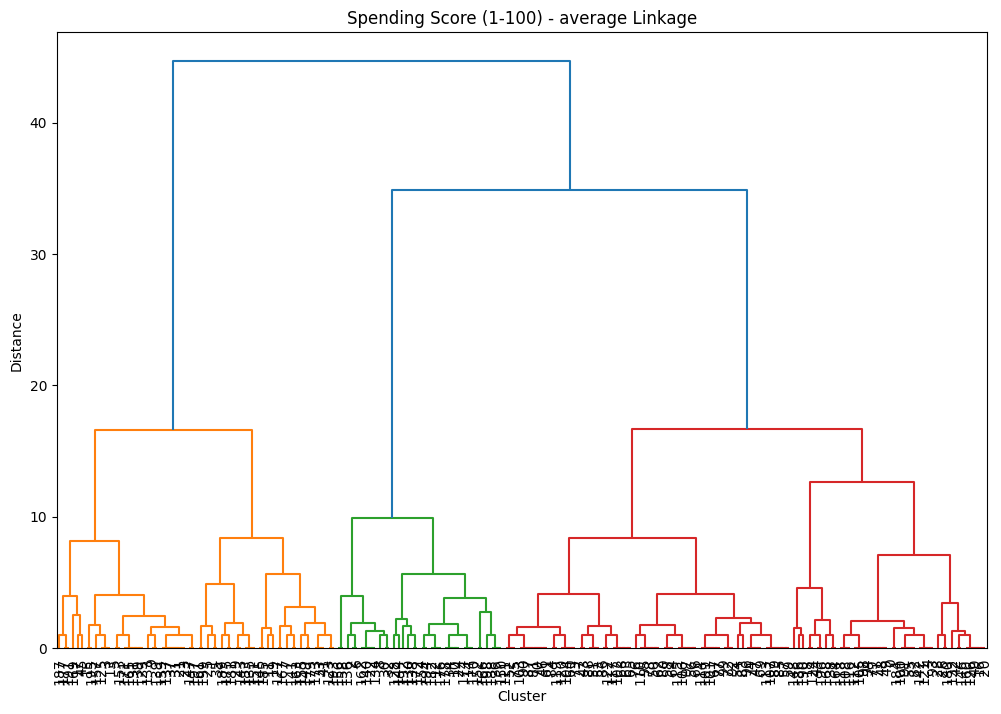

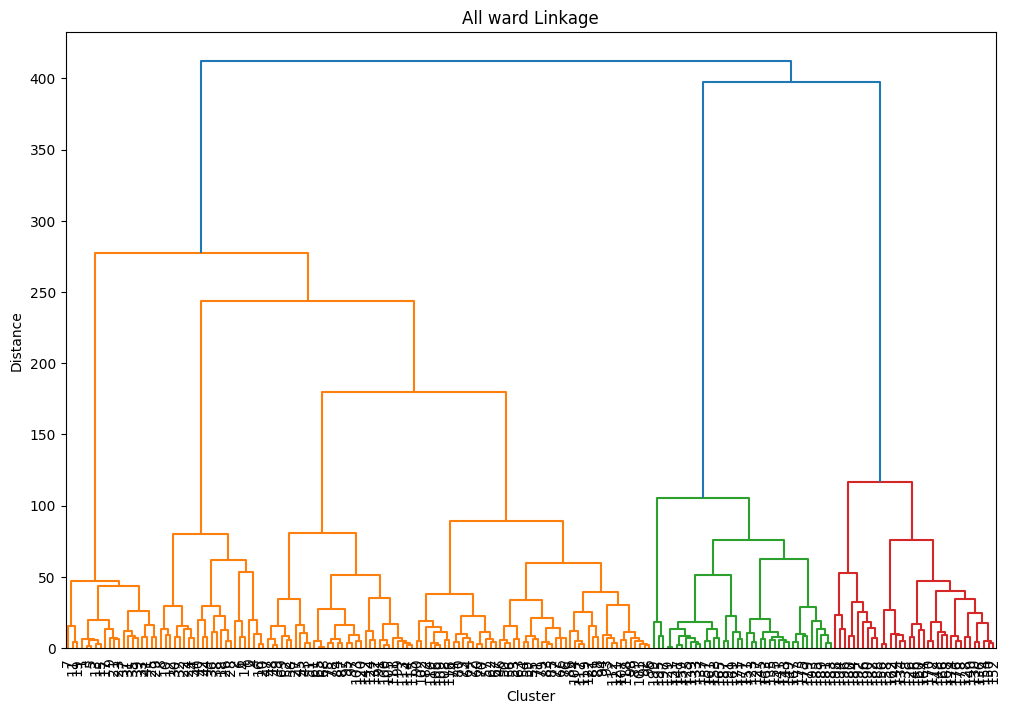

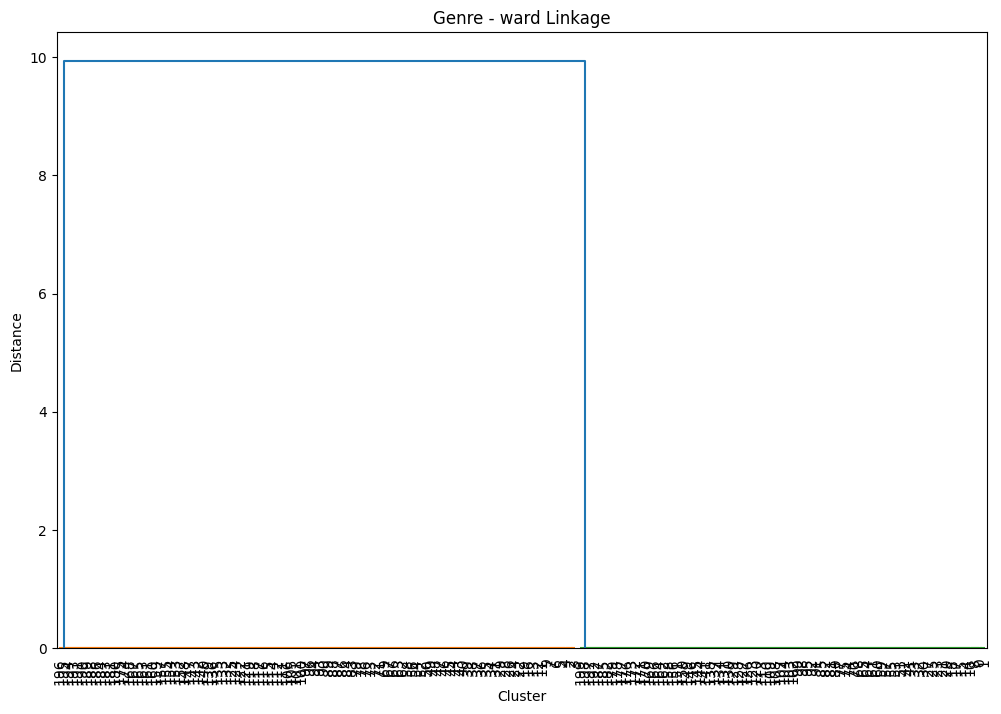

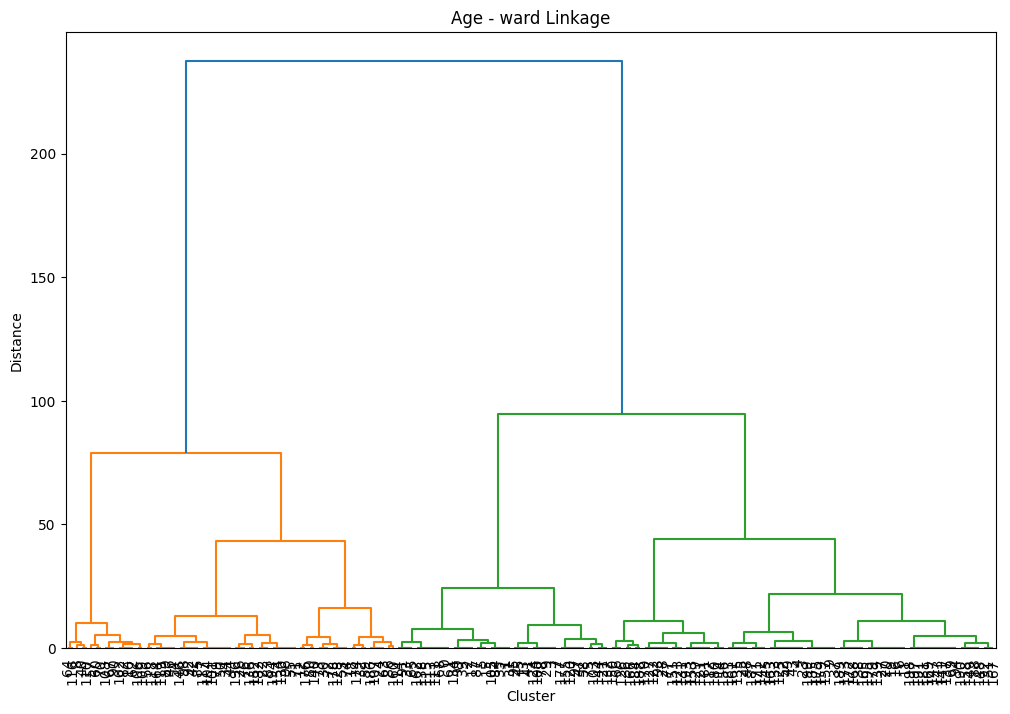

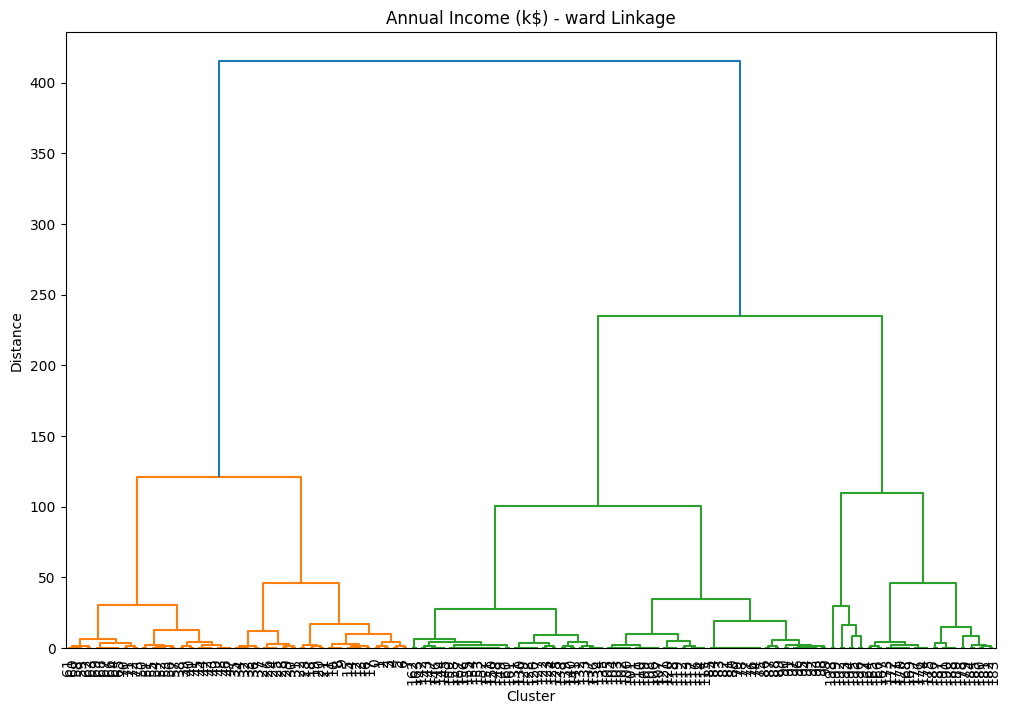

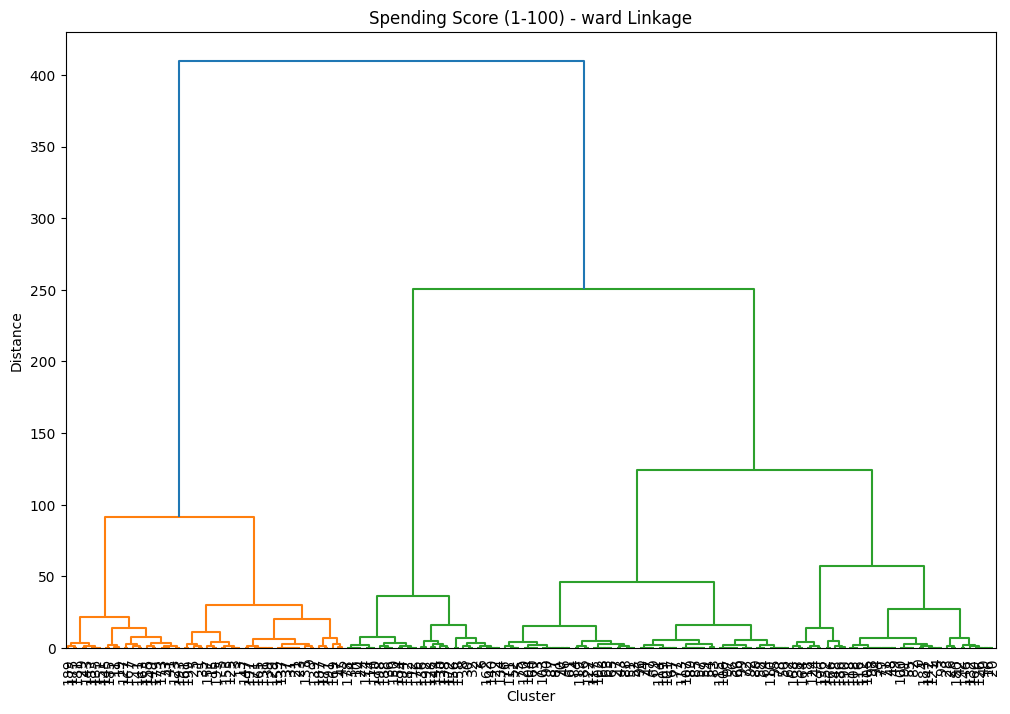

In [20]:
# linkage_matrix_single = hc.perform_clustering()
# hc.plot_dendrogram(linkage_matrix_single)

# linkage_matrix_single = hc.perform_clustering(linkage_type='single')
# hc.plot_dendrogram(linkage_matrix_single)

# linkage_matrix_complete = hc.perform_clustering(linkage_type='complete')
# hc.plot_dendrogram(linkage_matrix_complete)

# linkage_matrix_average = hc.perform_clustering(linkage_type='average')
# hc.plot_dendrogram(linkage_matrix_average)
linkage_methods = ['single', 'complete', 'average', 'ward']
for linkage_type in linkage_methods:
    hc = HierarchicalClustering(X.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in X.columns:
        feature_data = X[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')


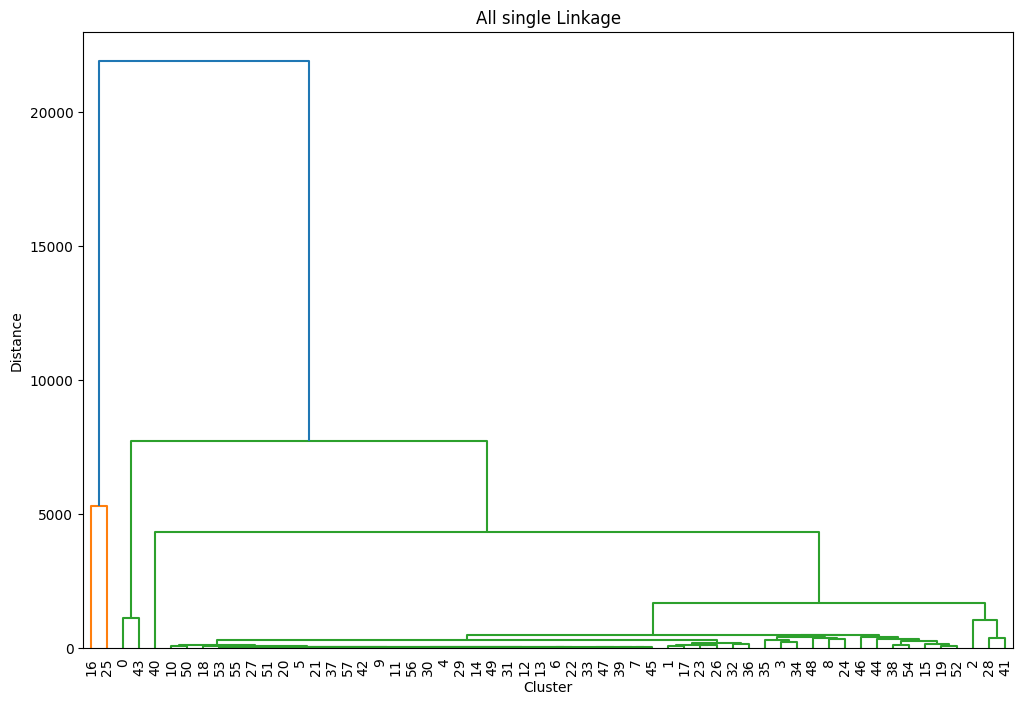

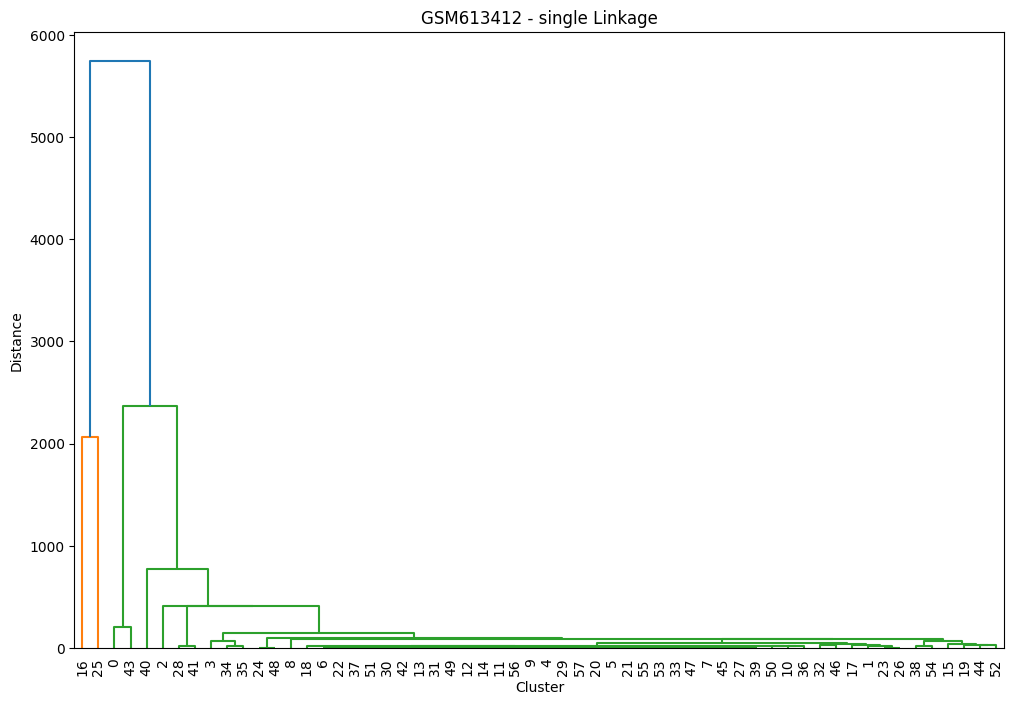

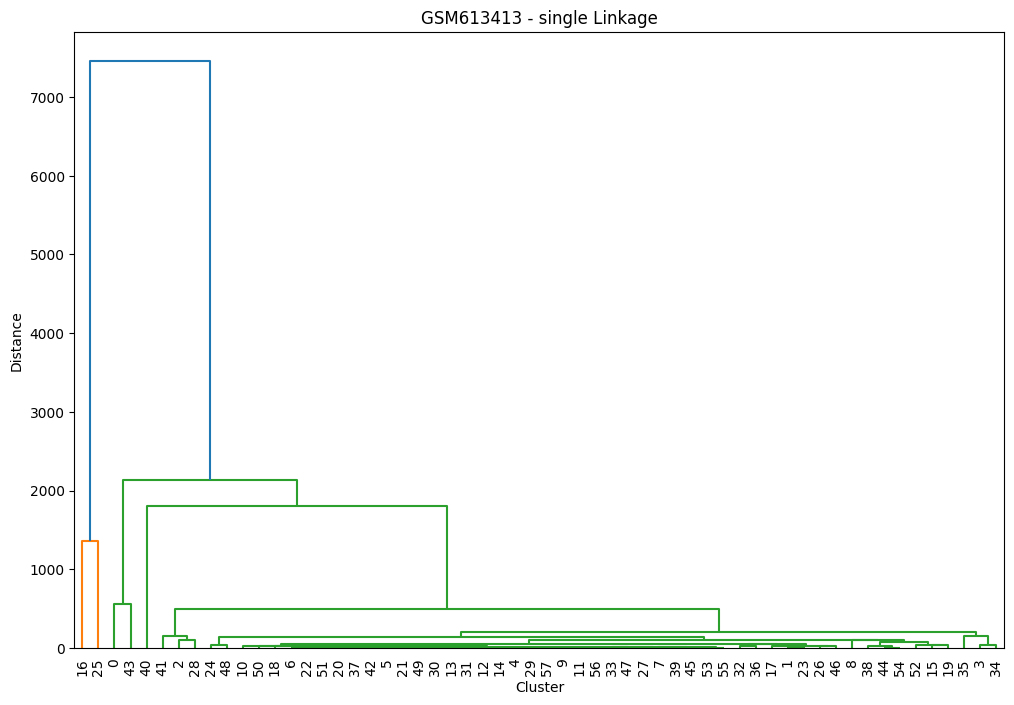

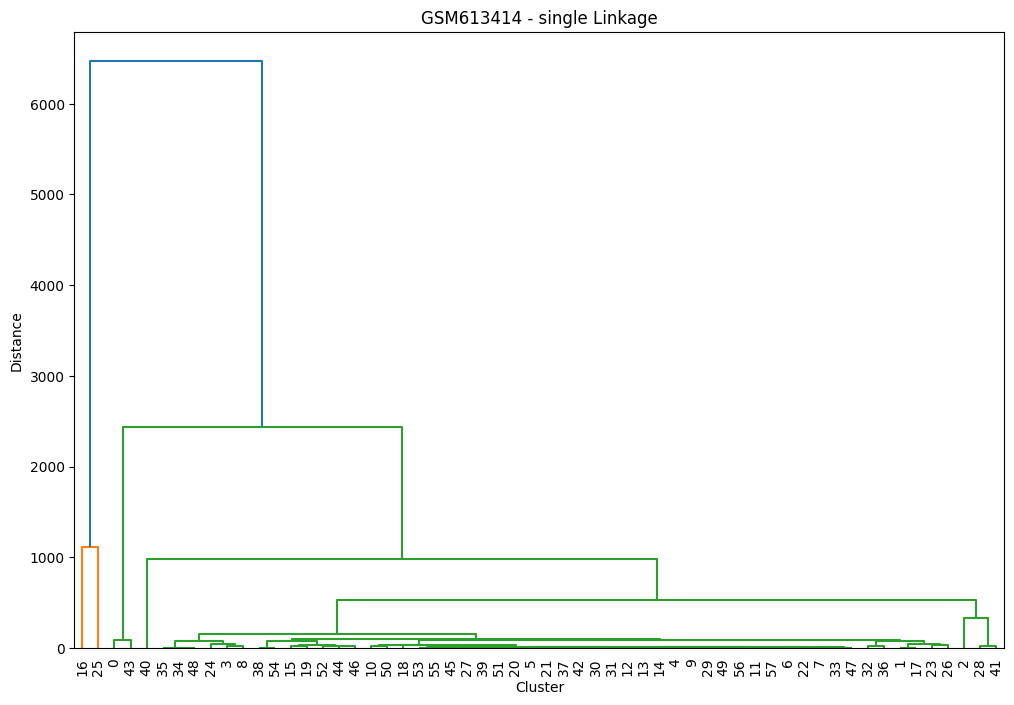

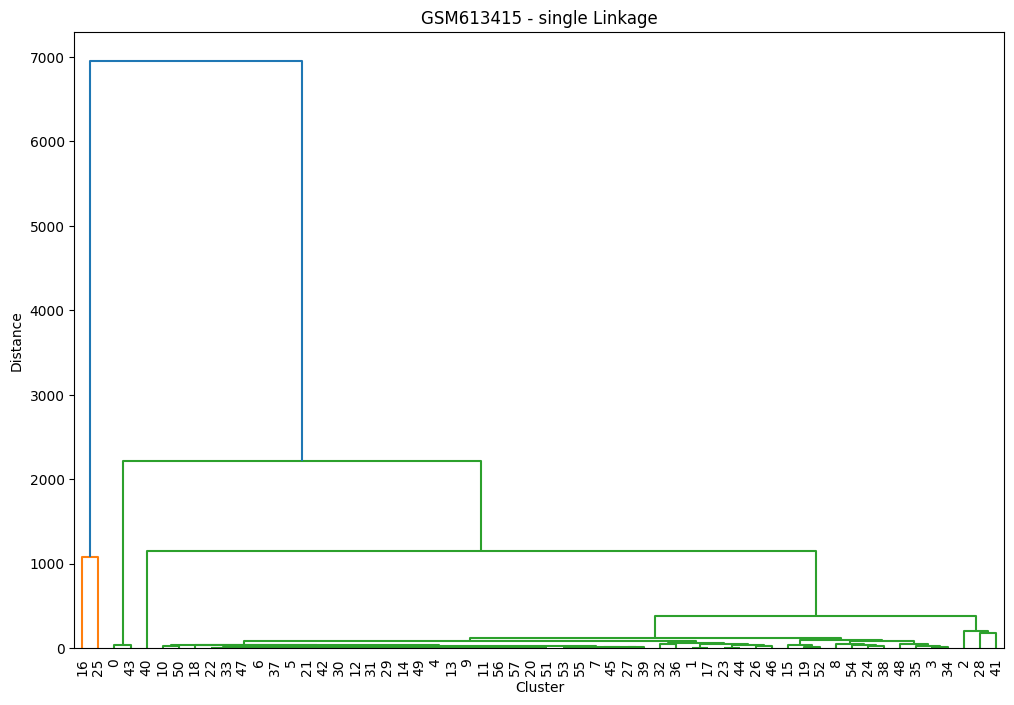

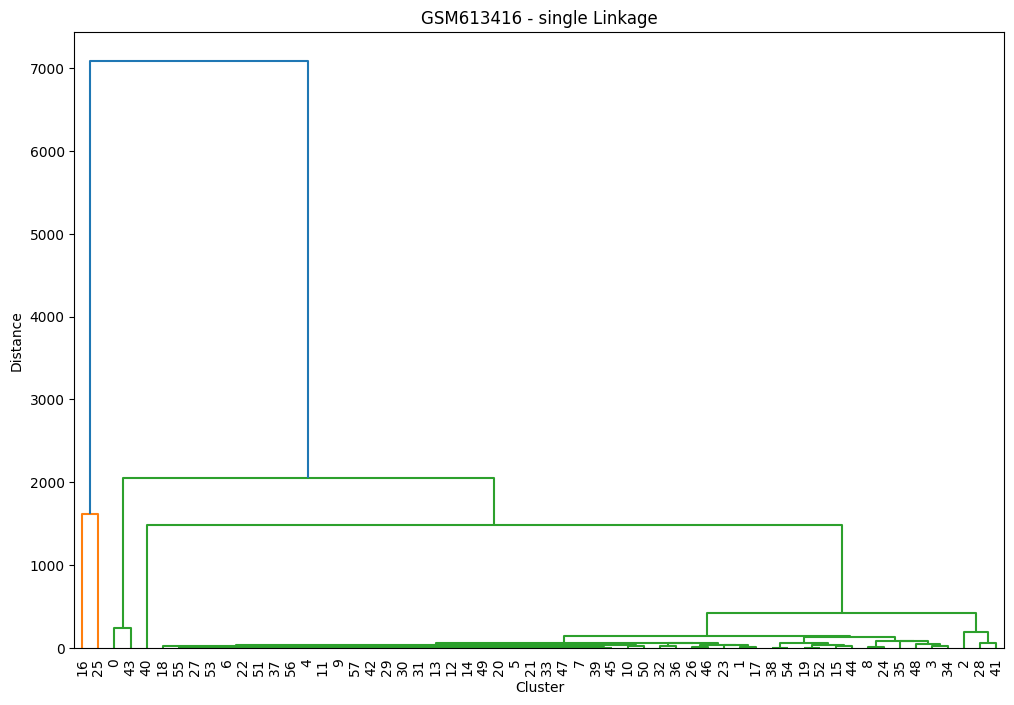

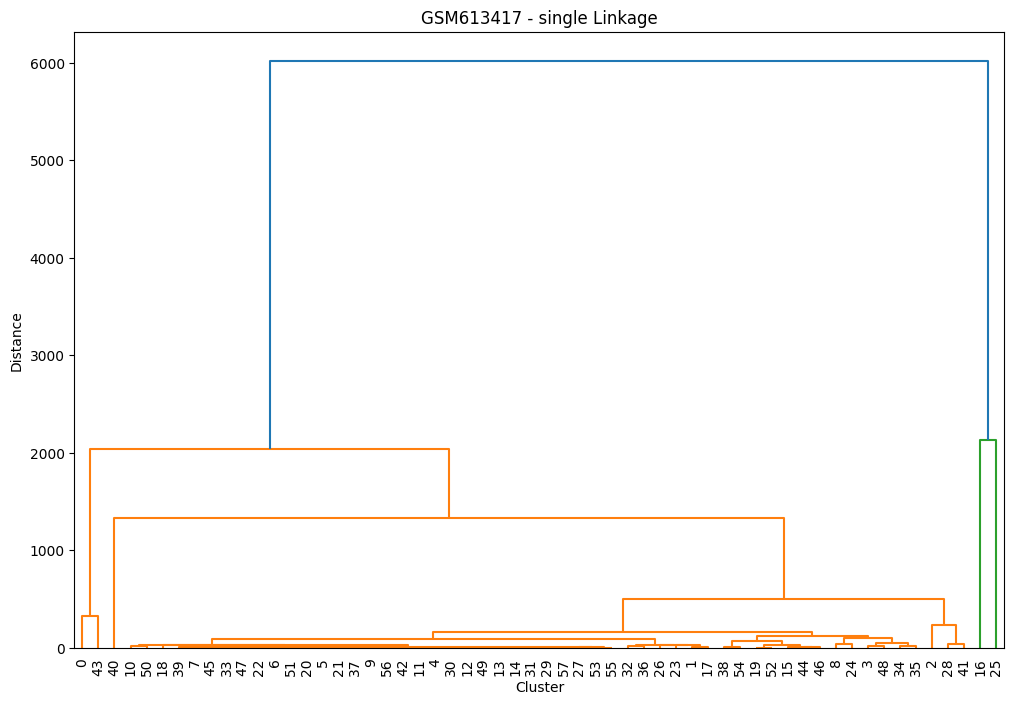

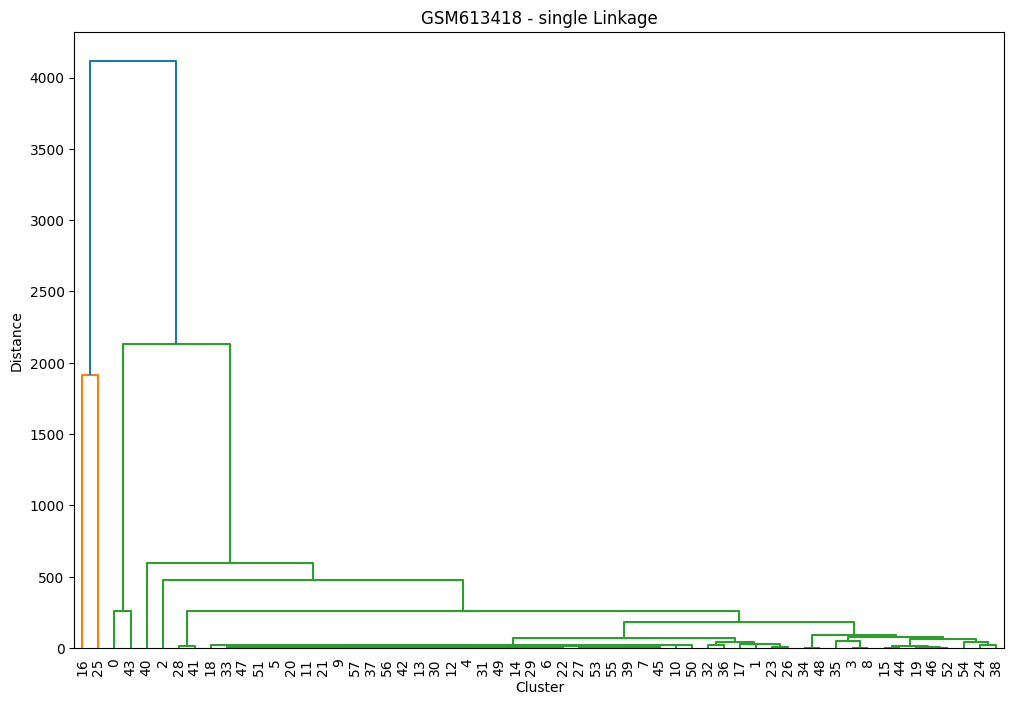

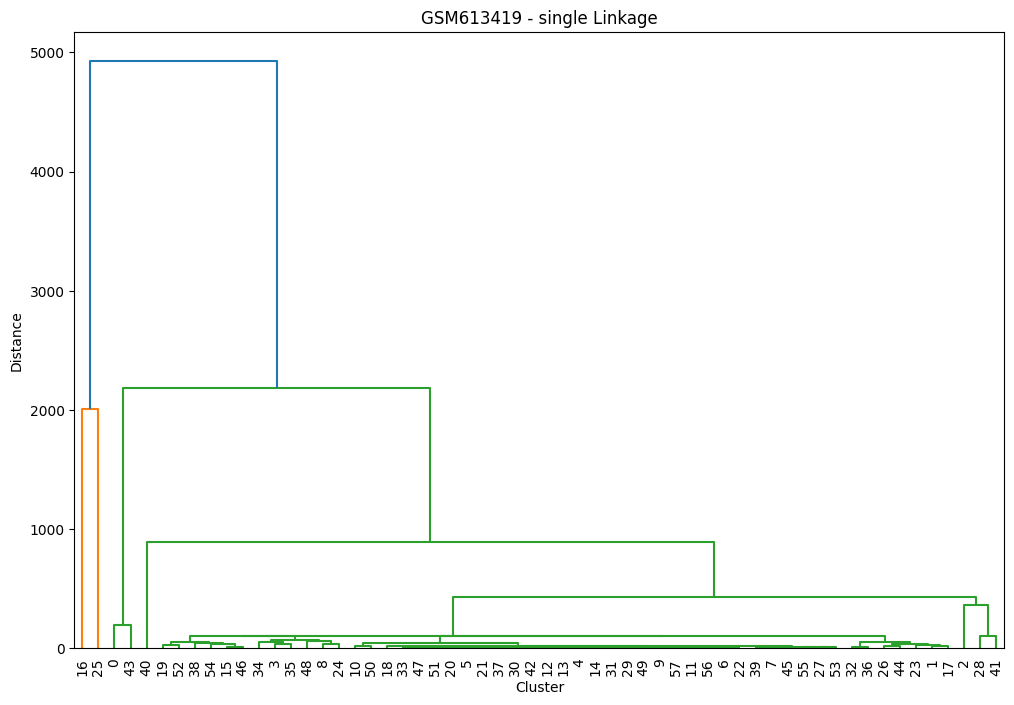

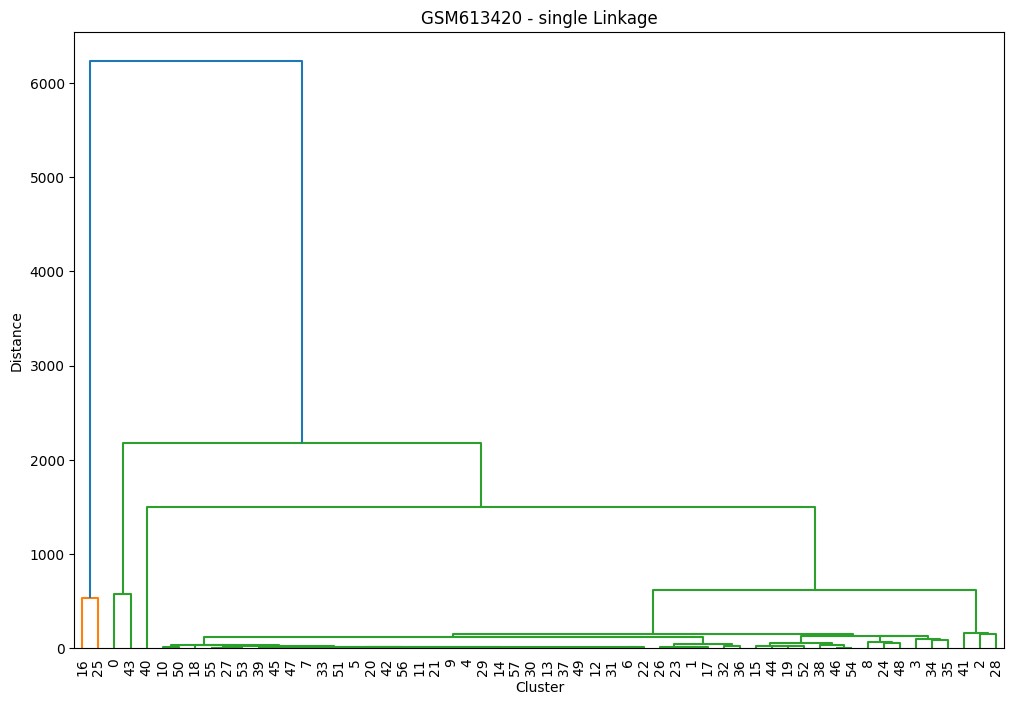

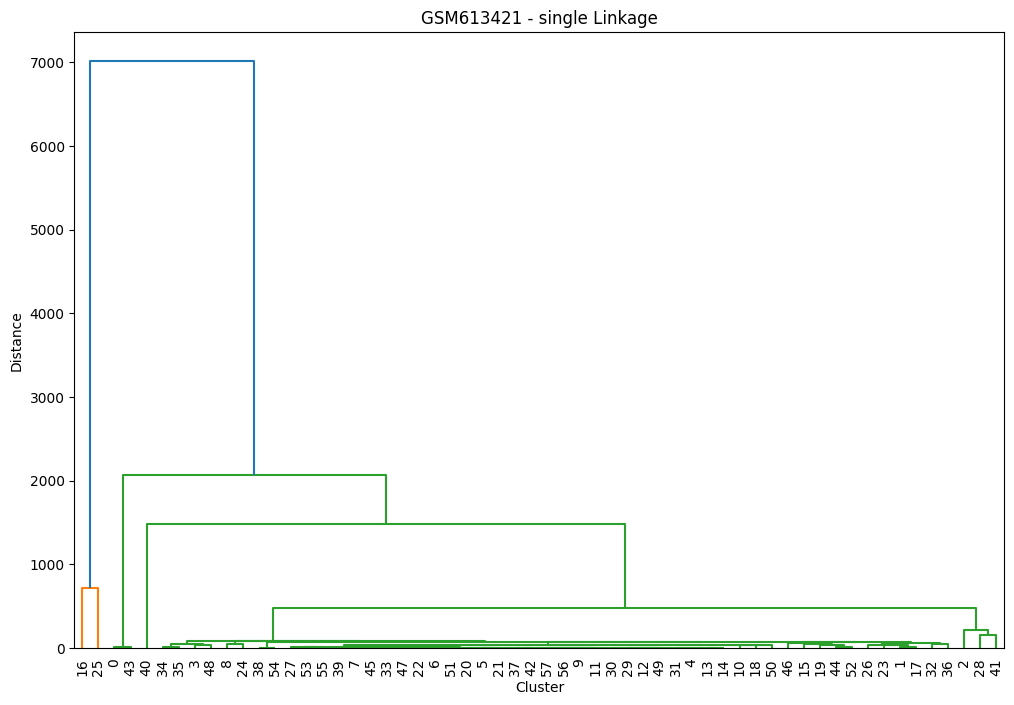

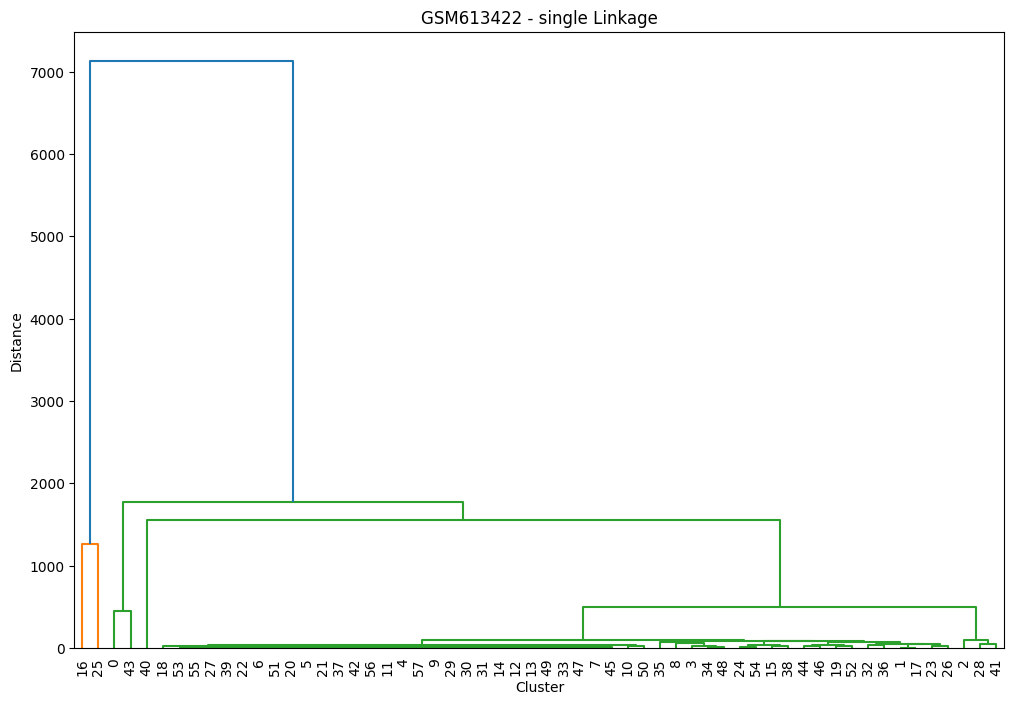

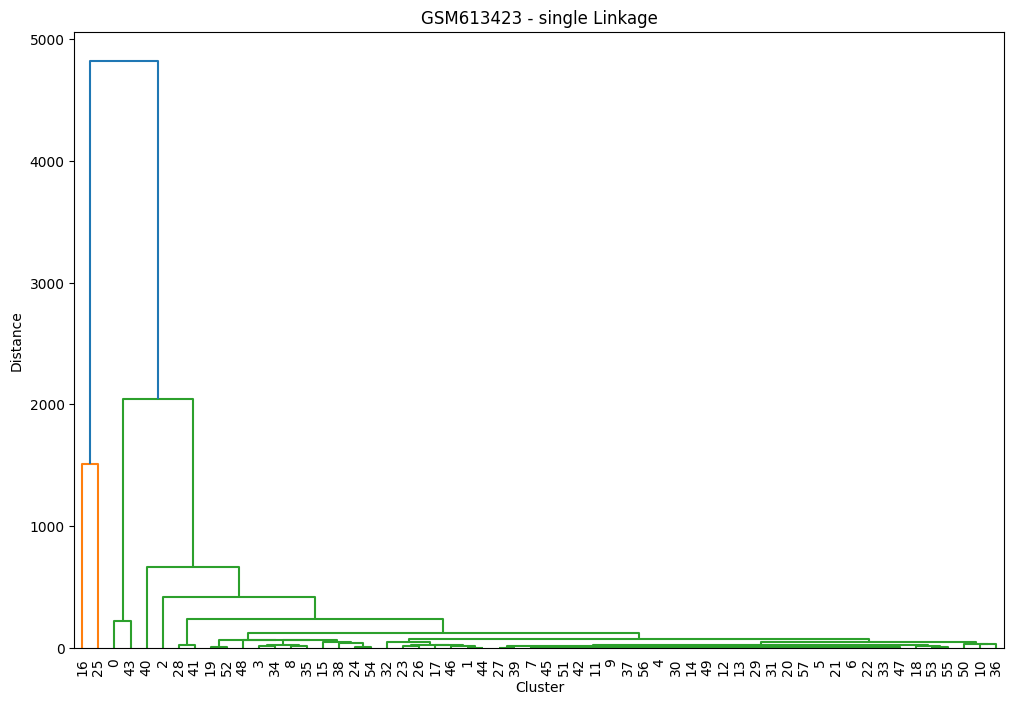

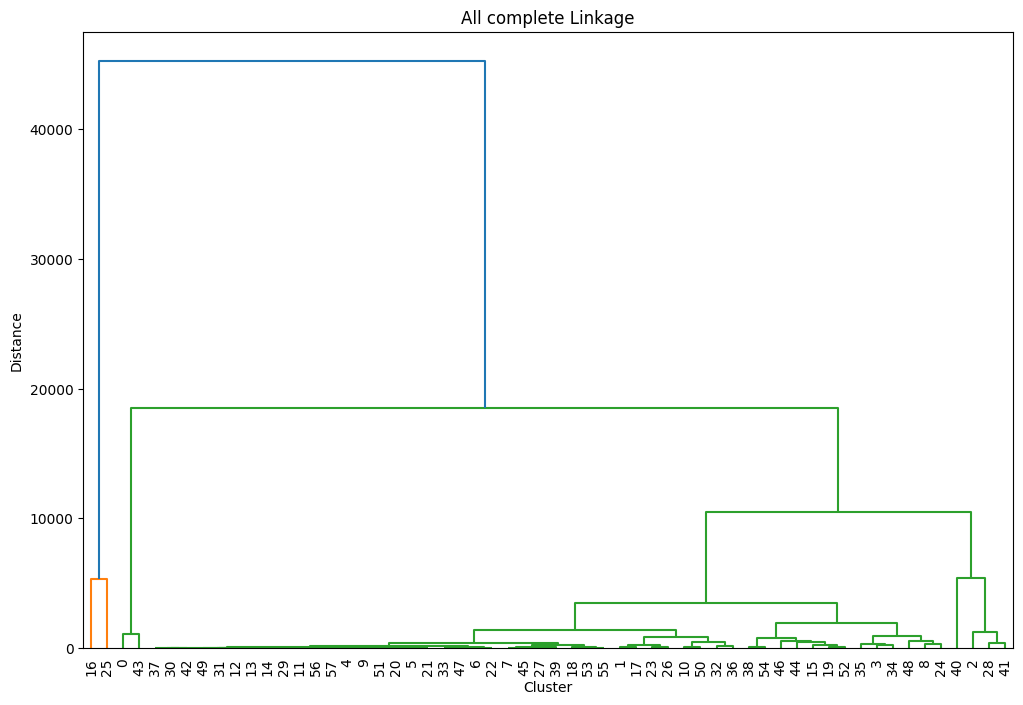

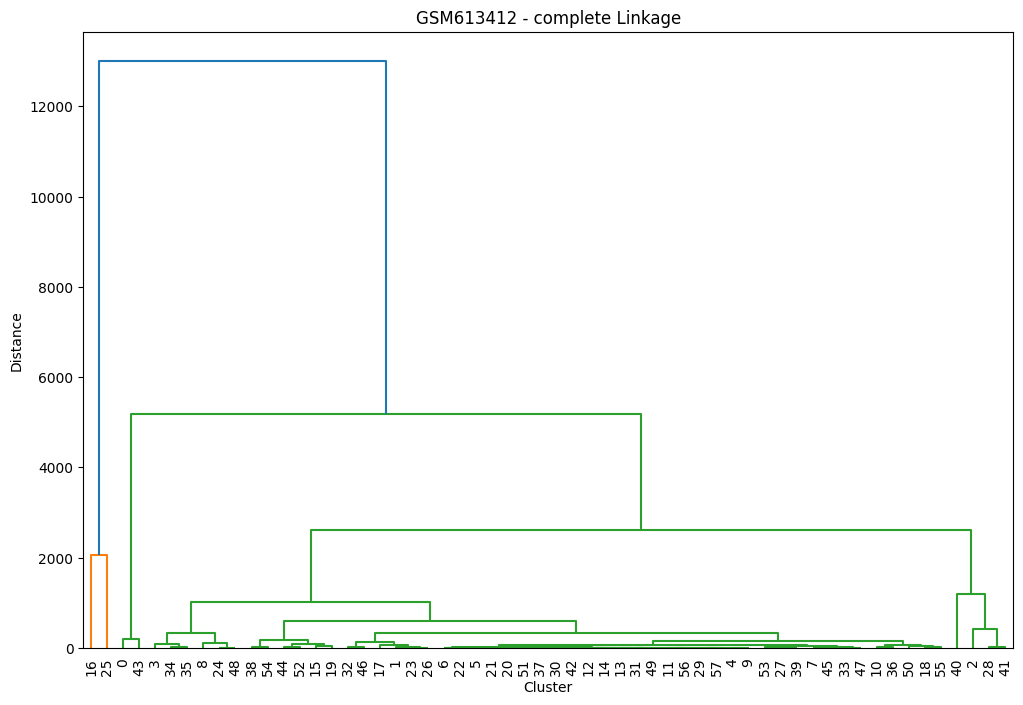

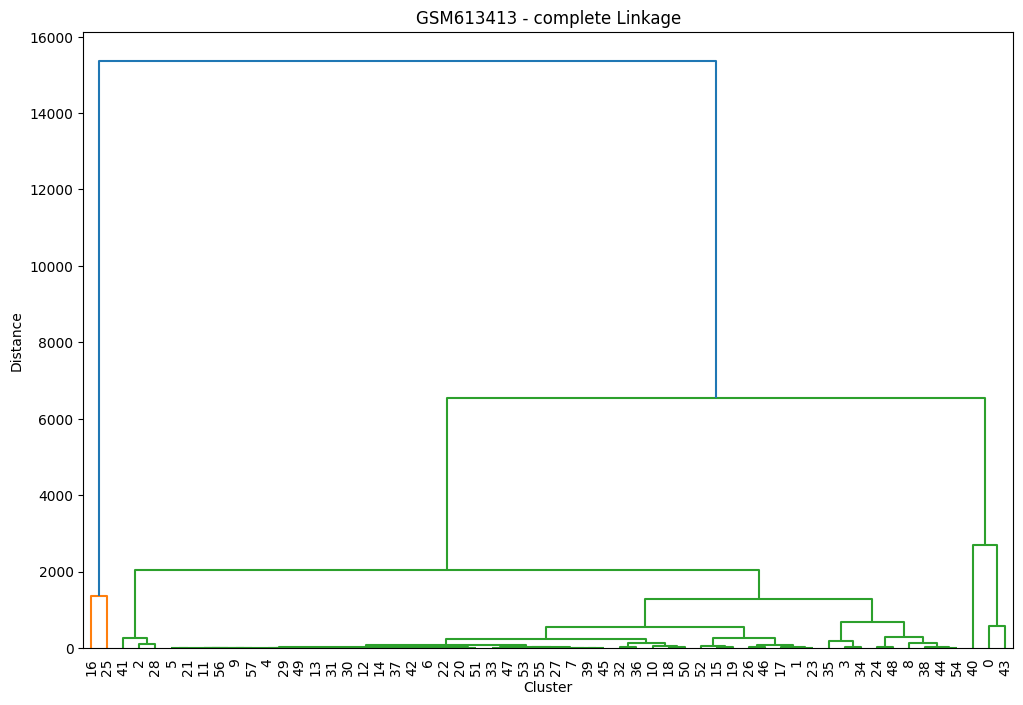

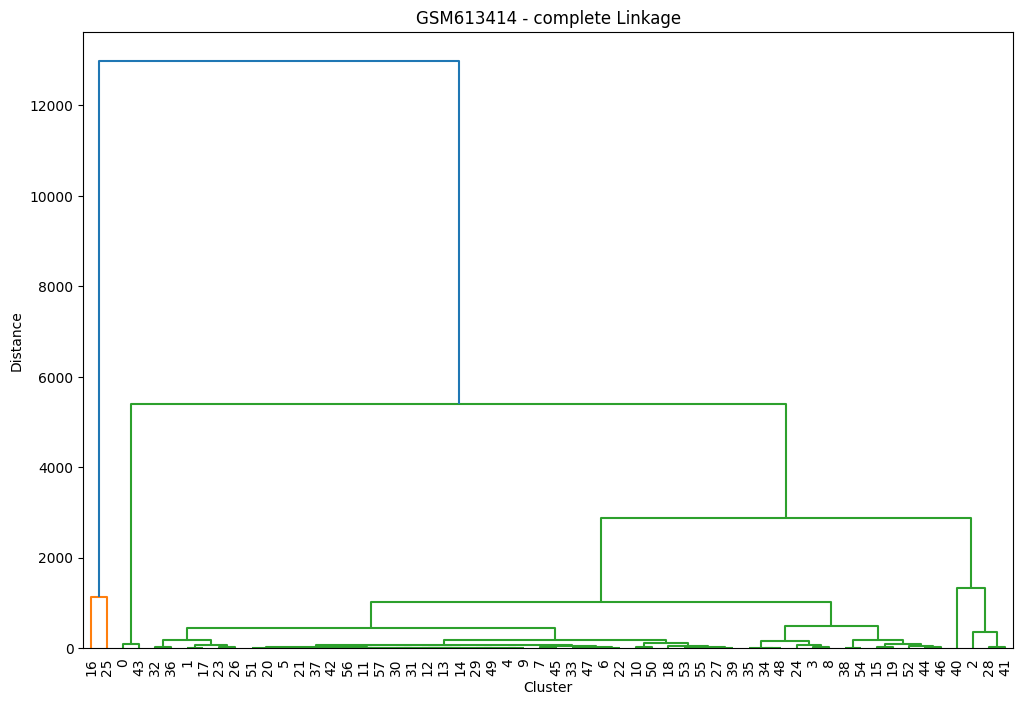

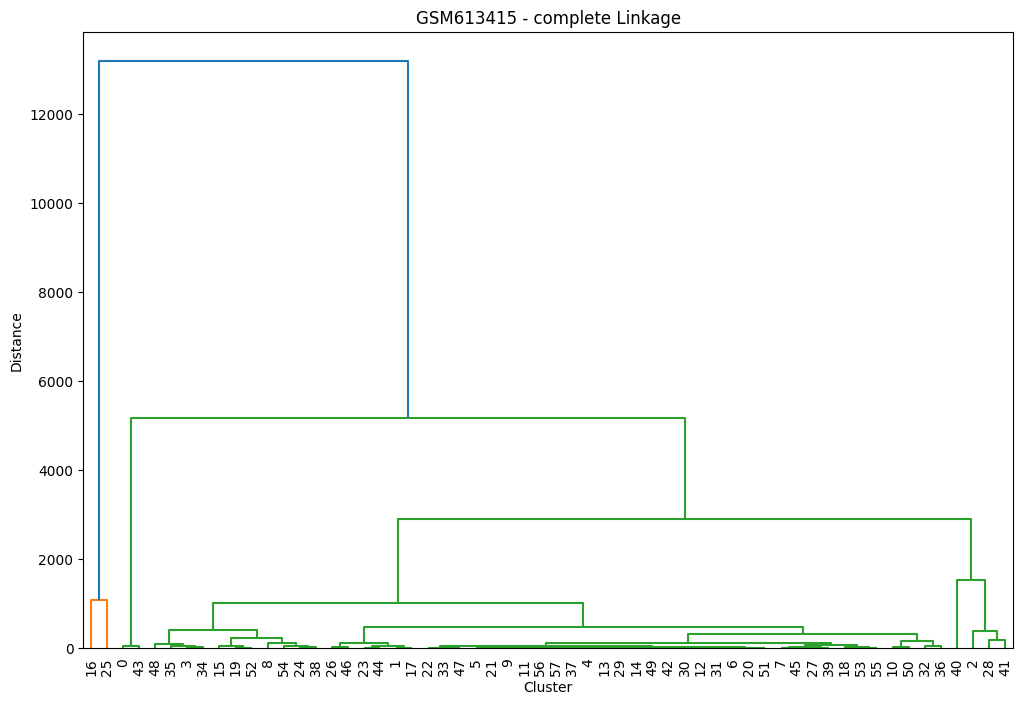

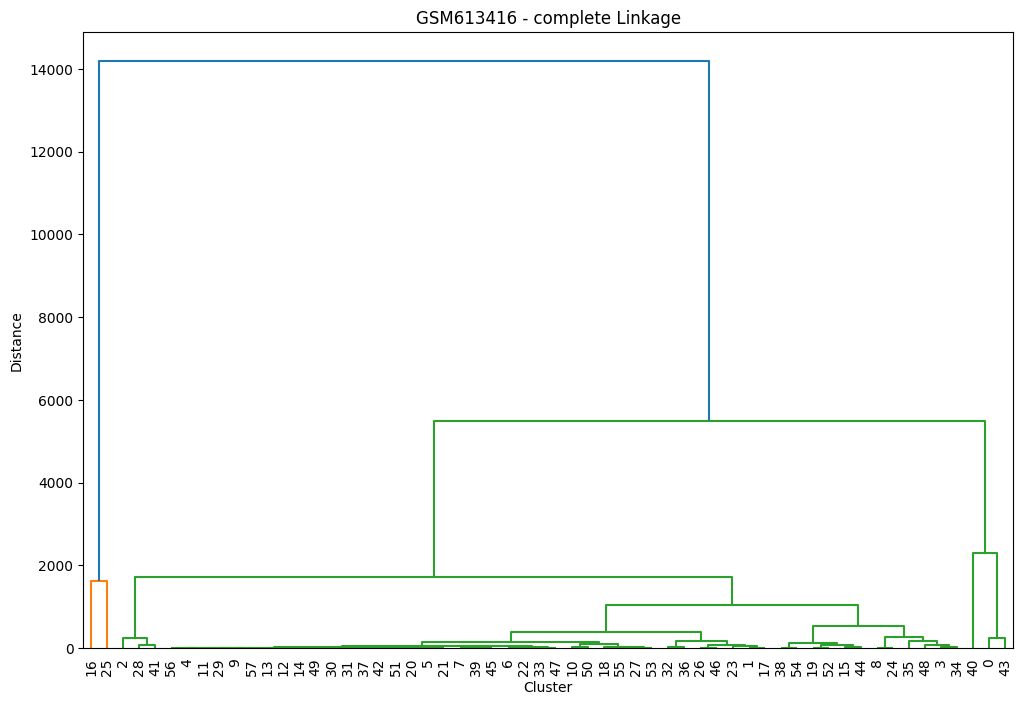

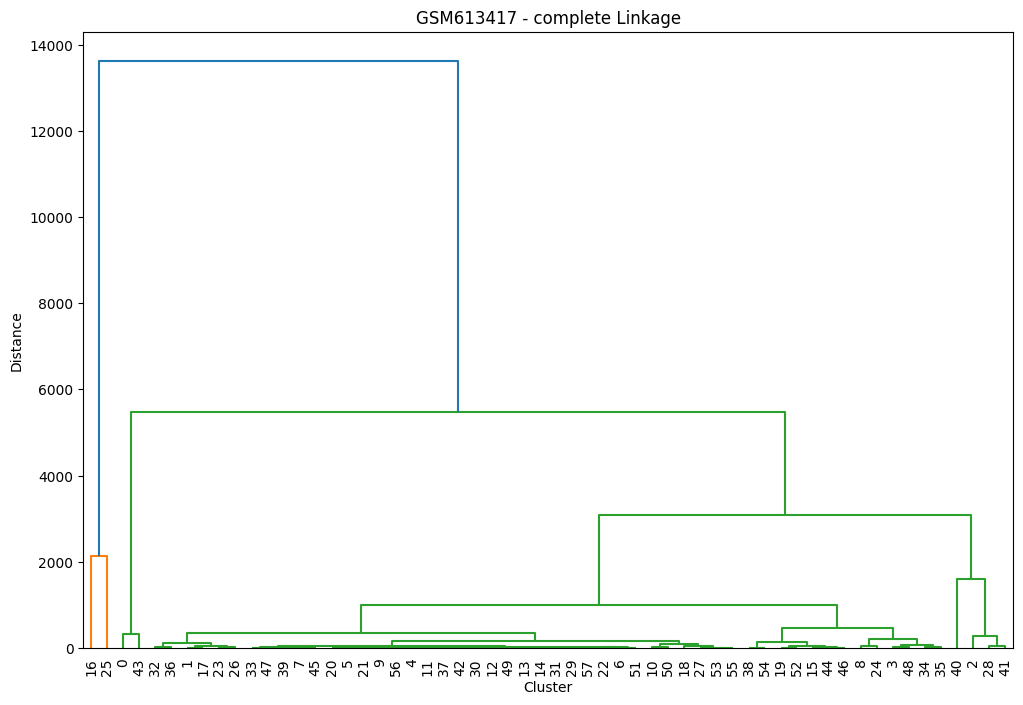

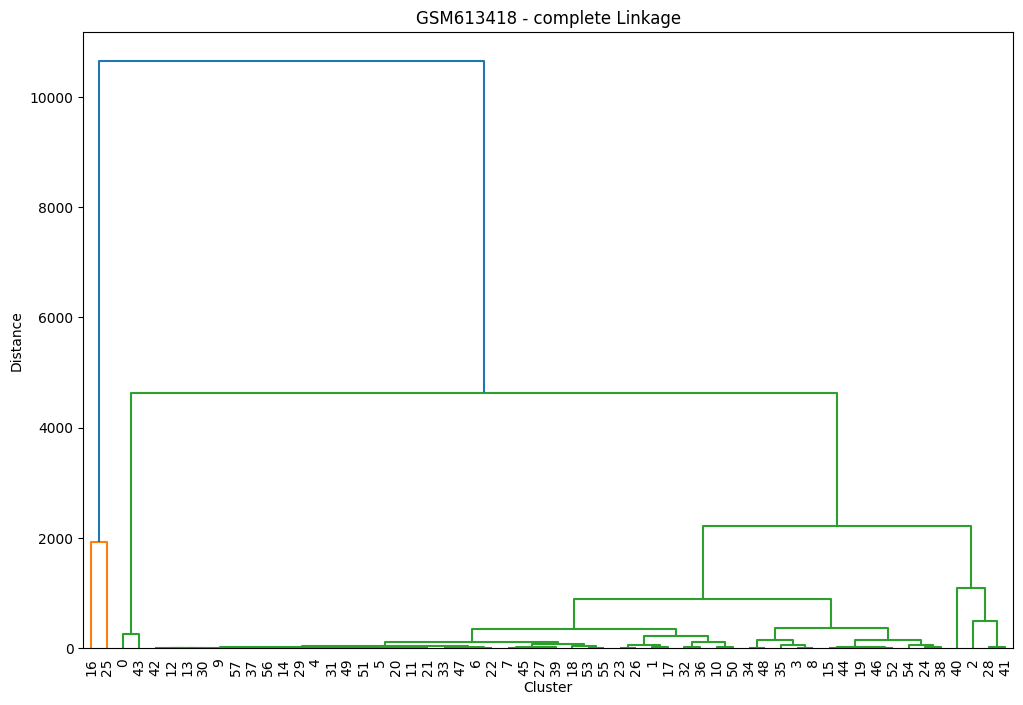

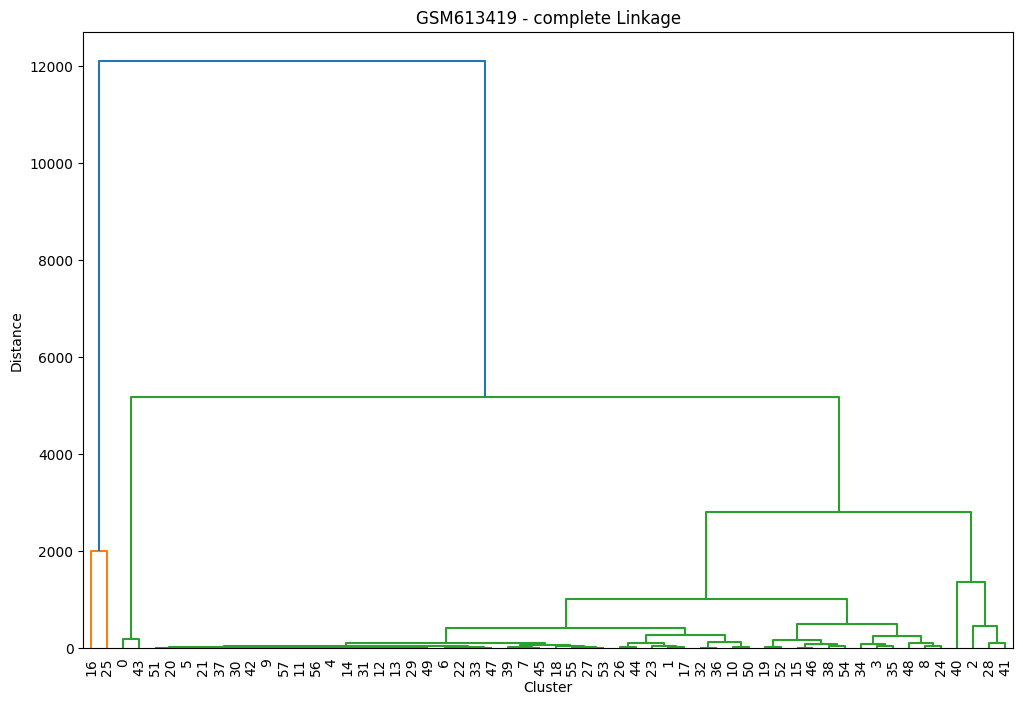

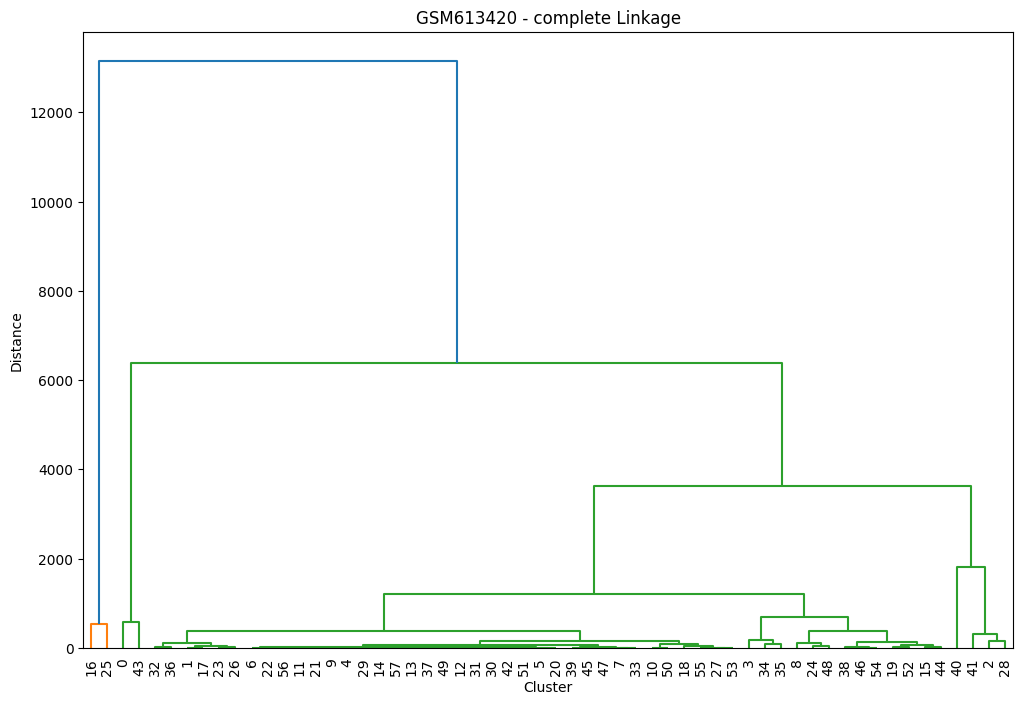

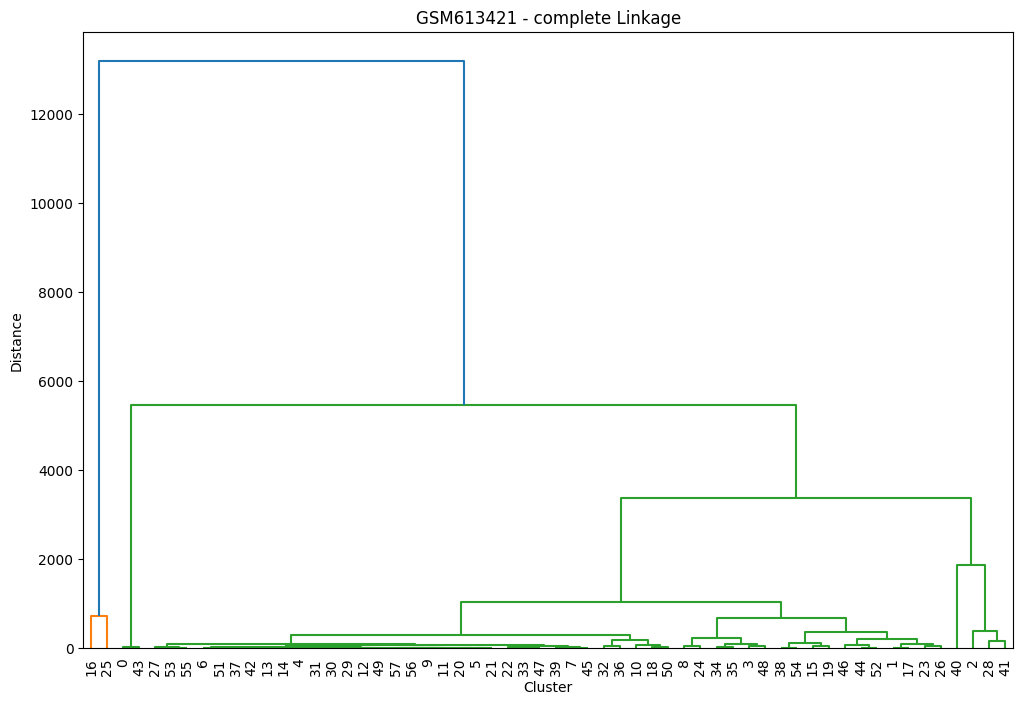

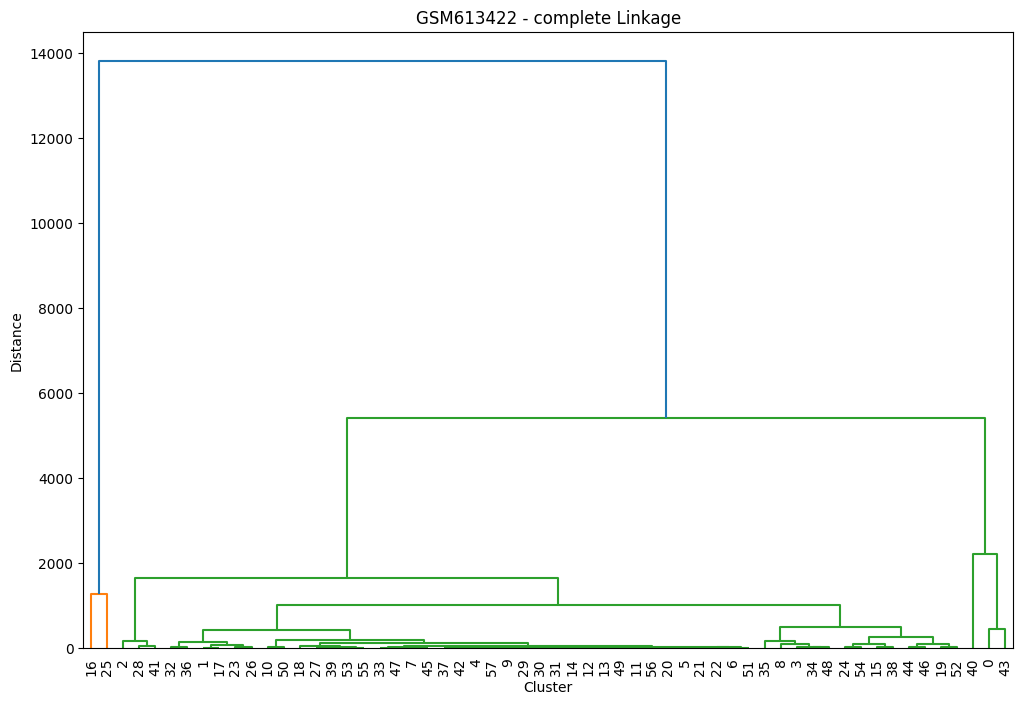

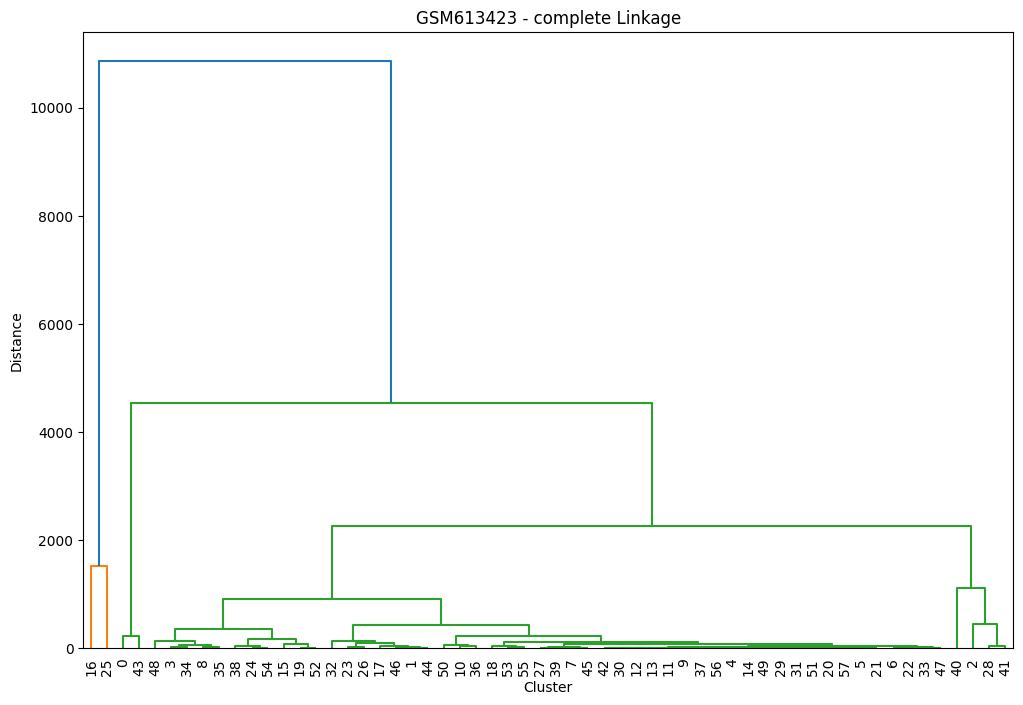

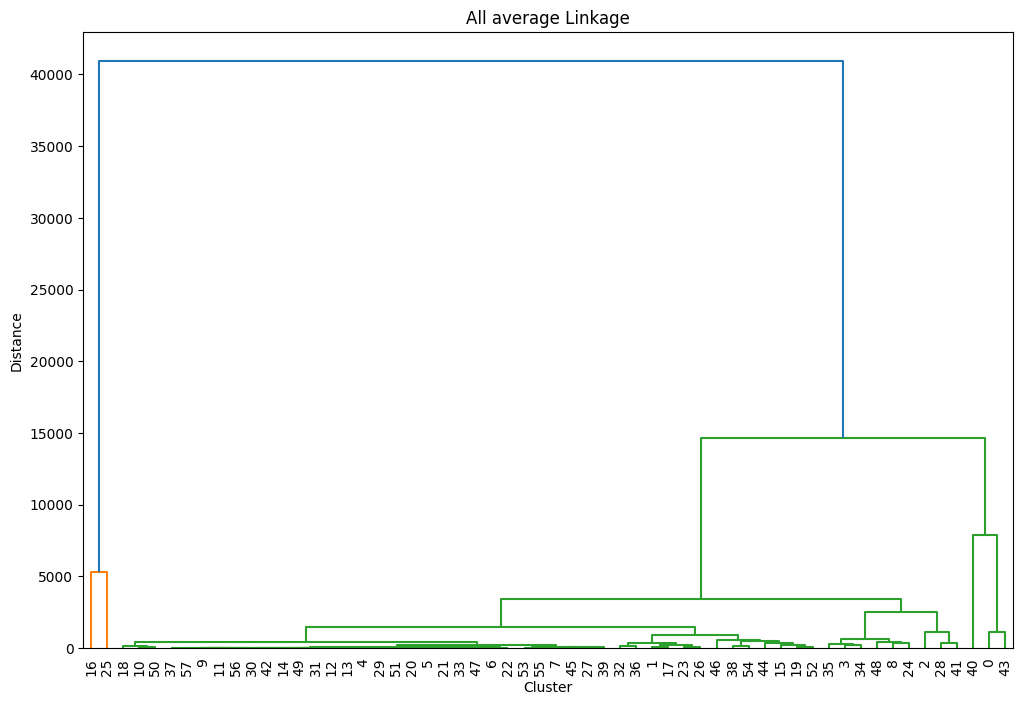

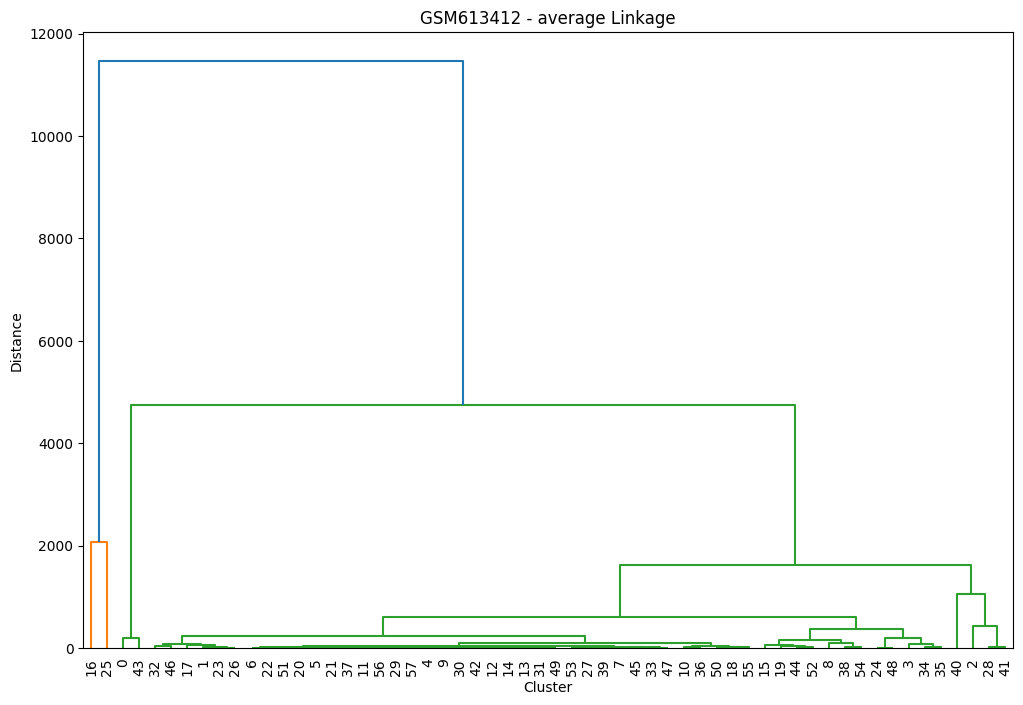

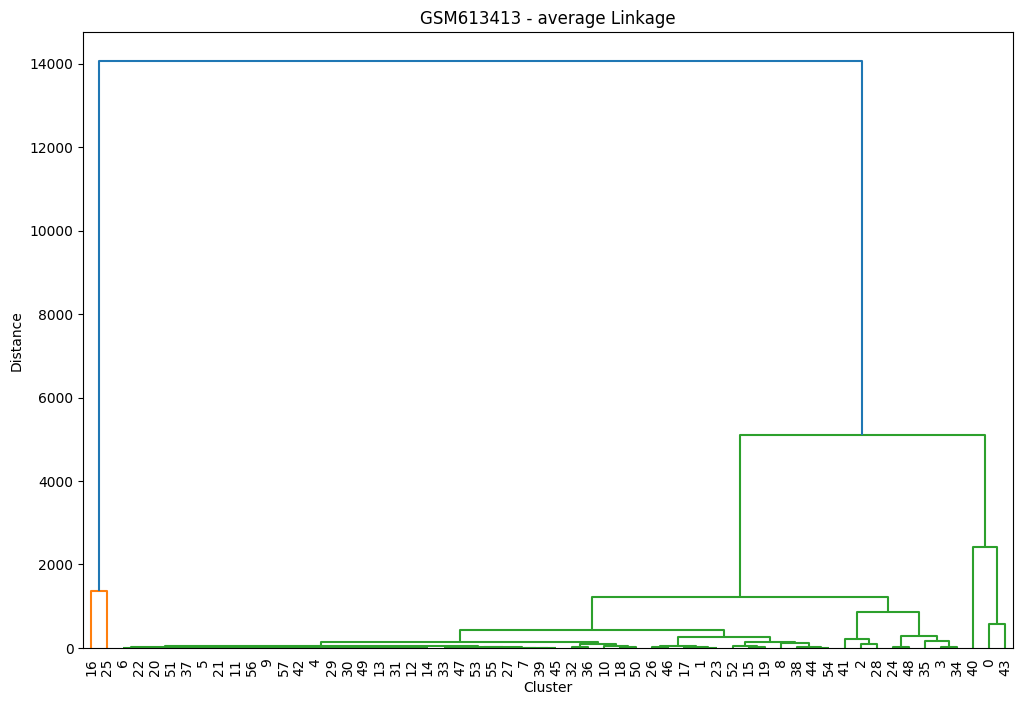

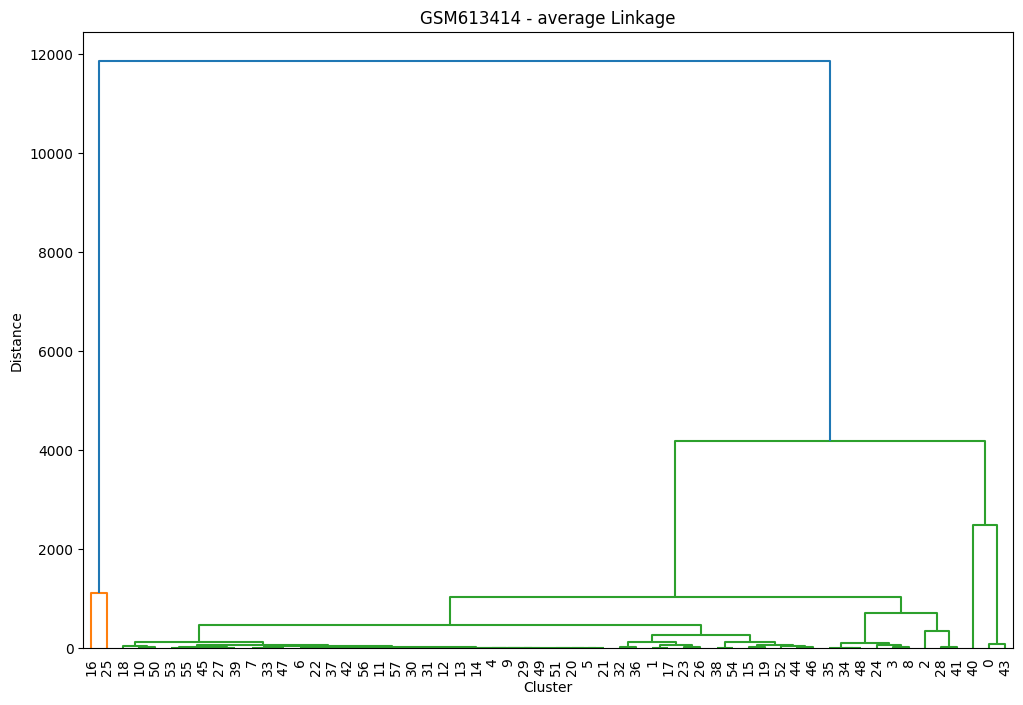

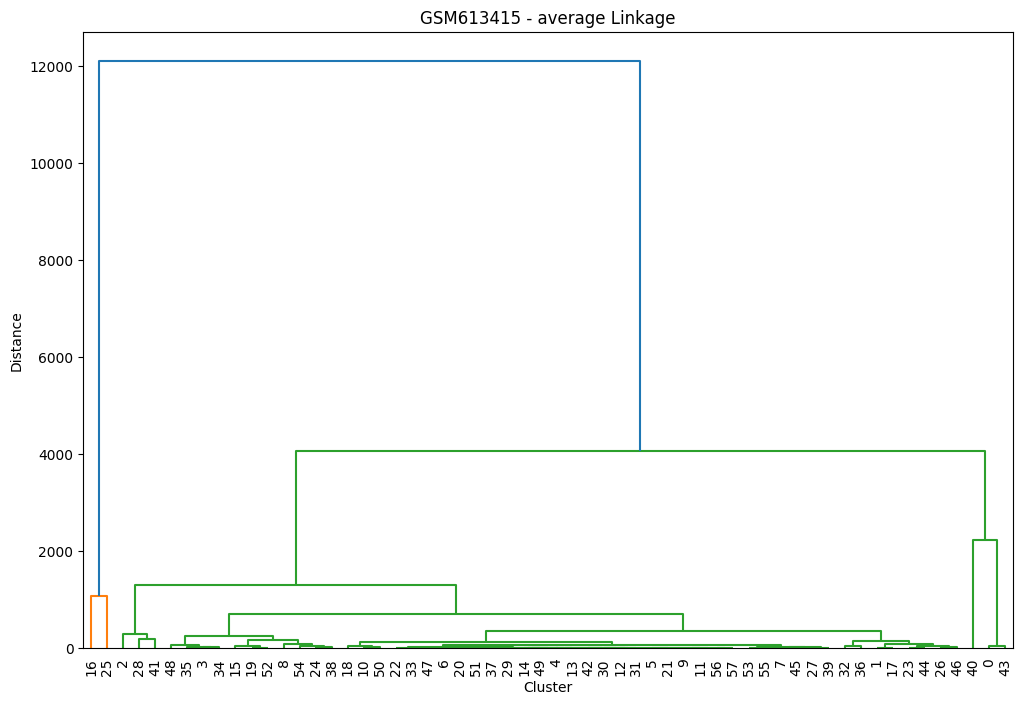

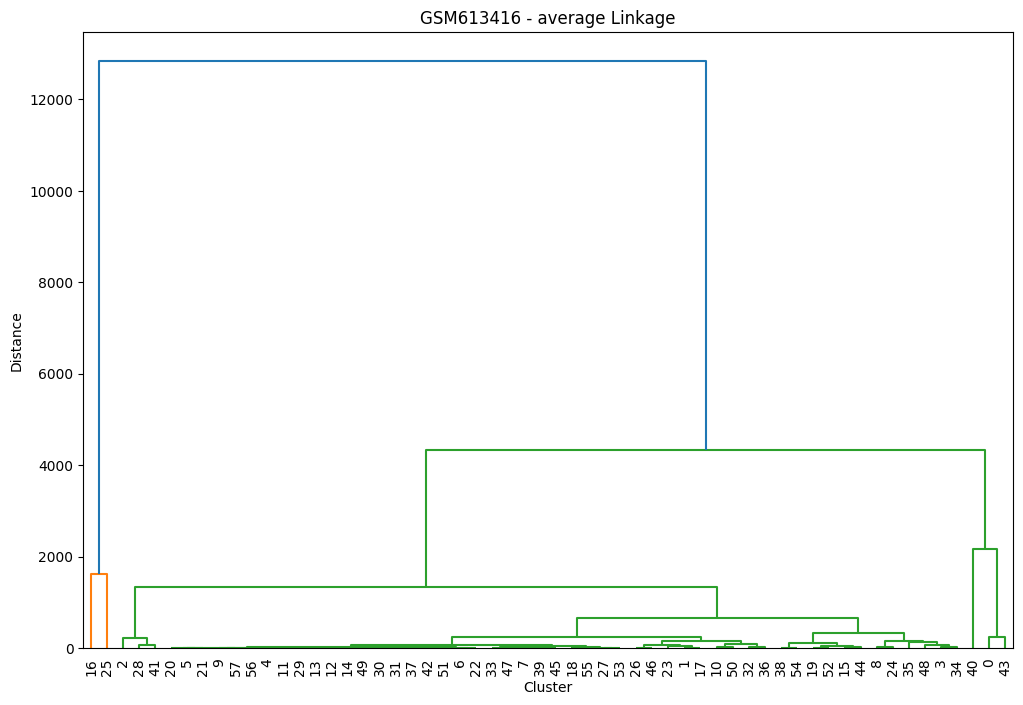

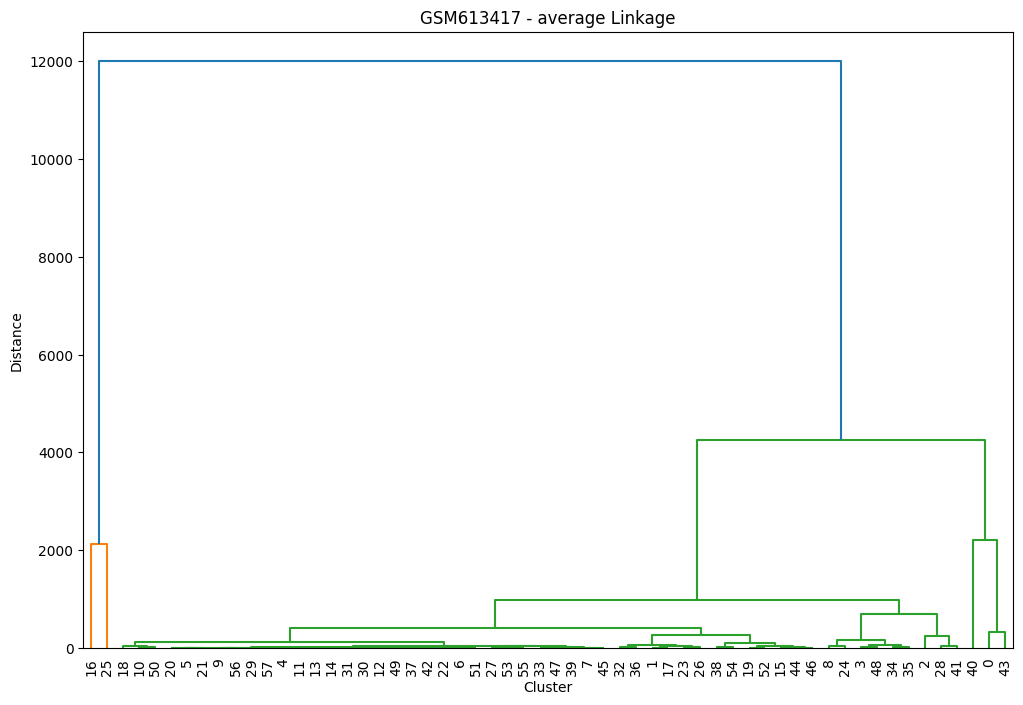

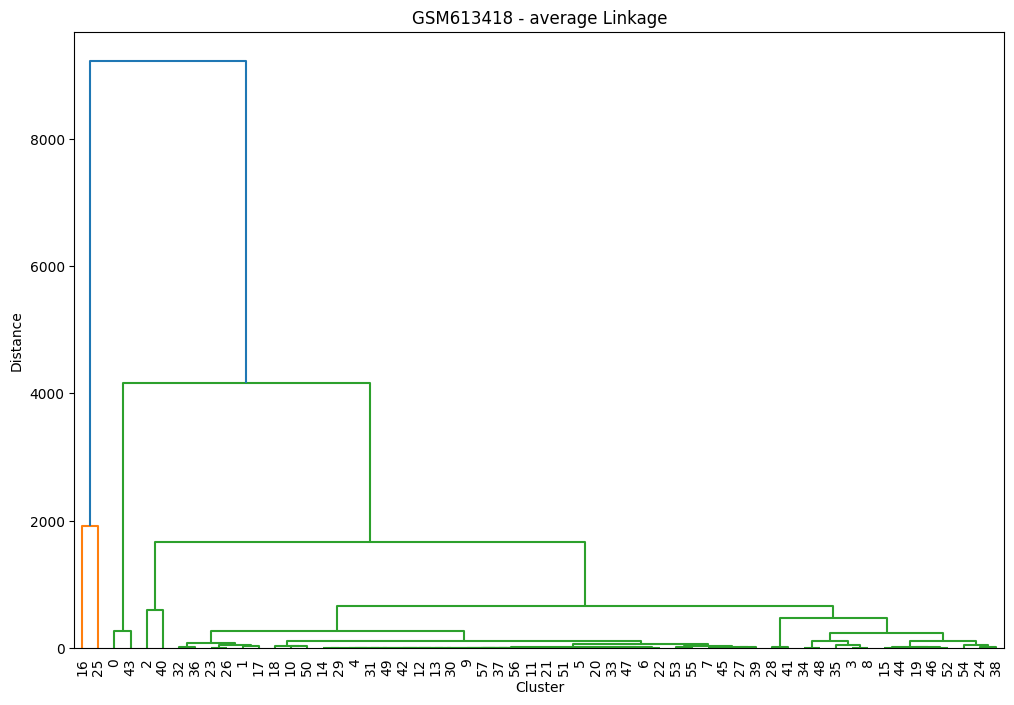

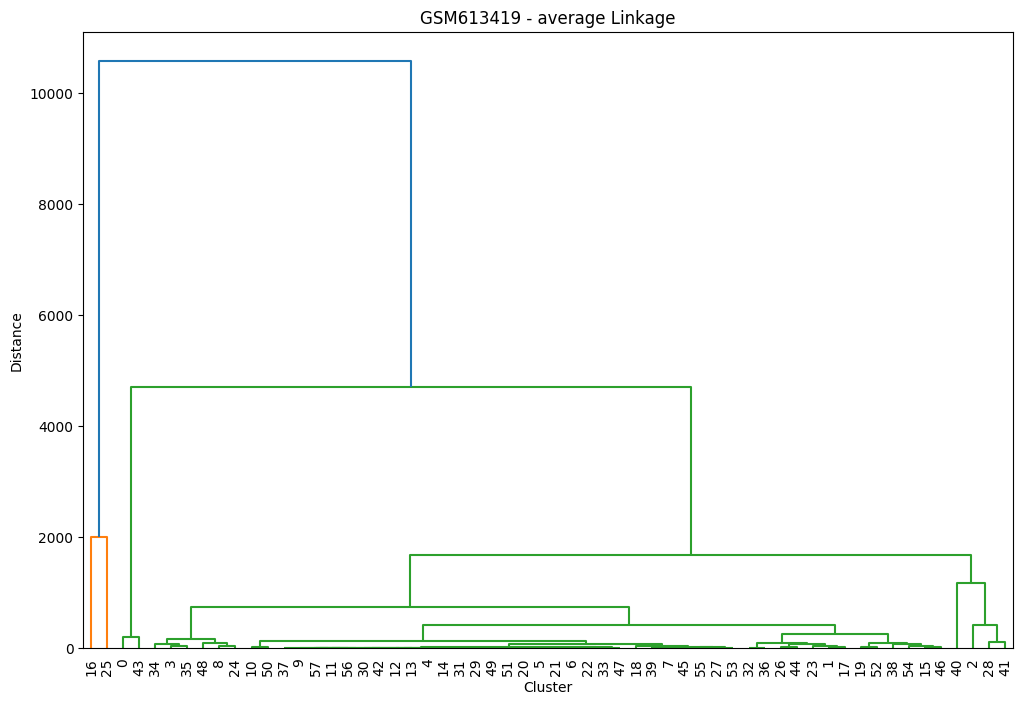

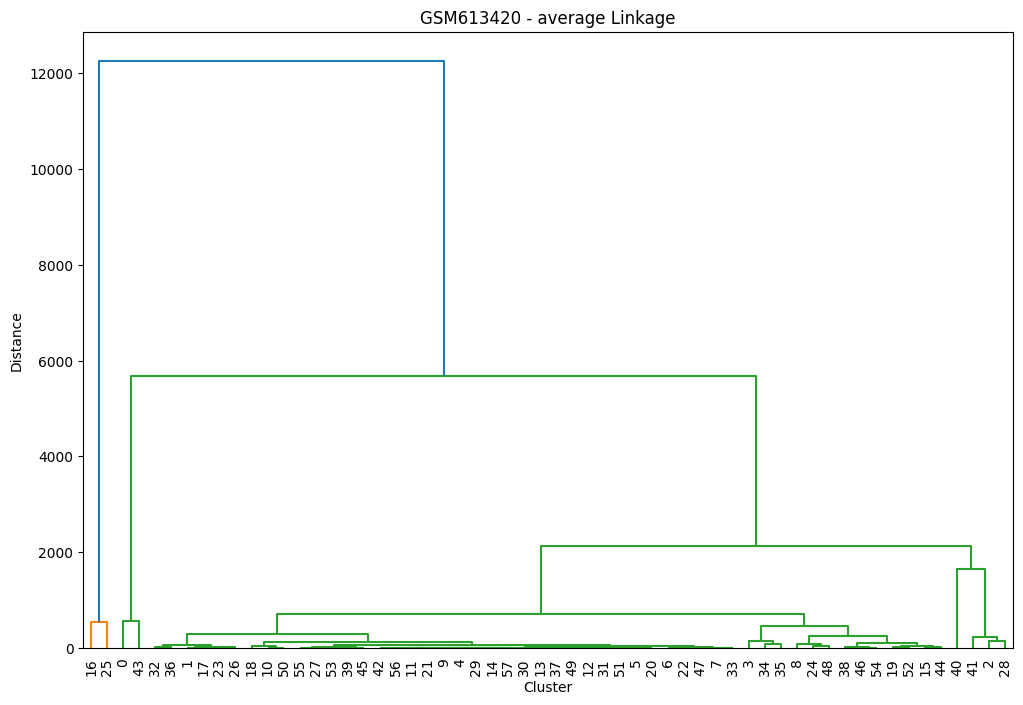

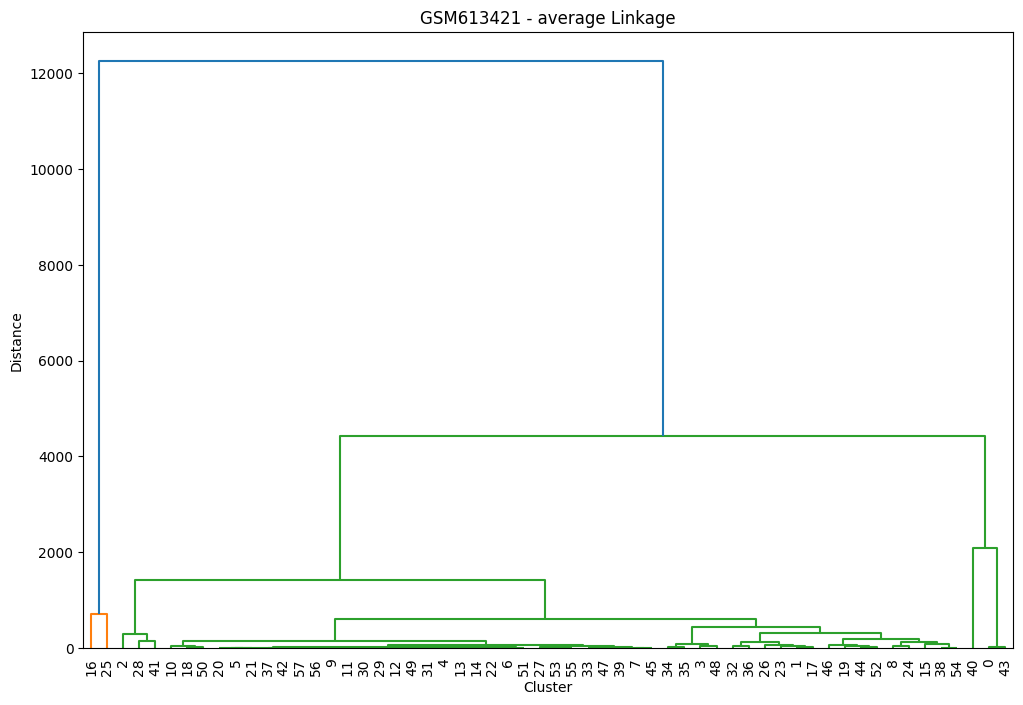

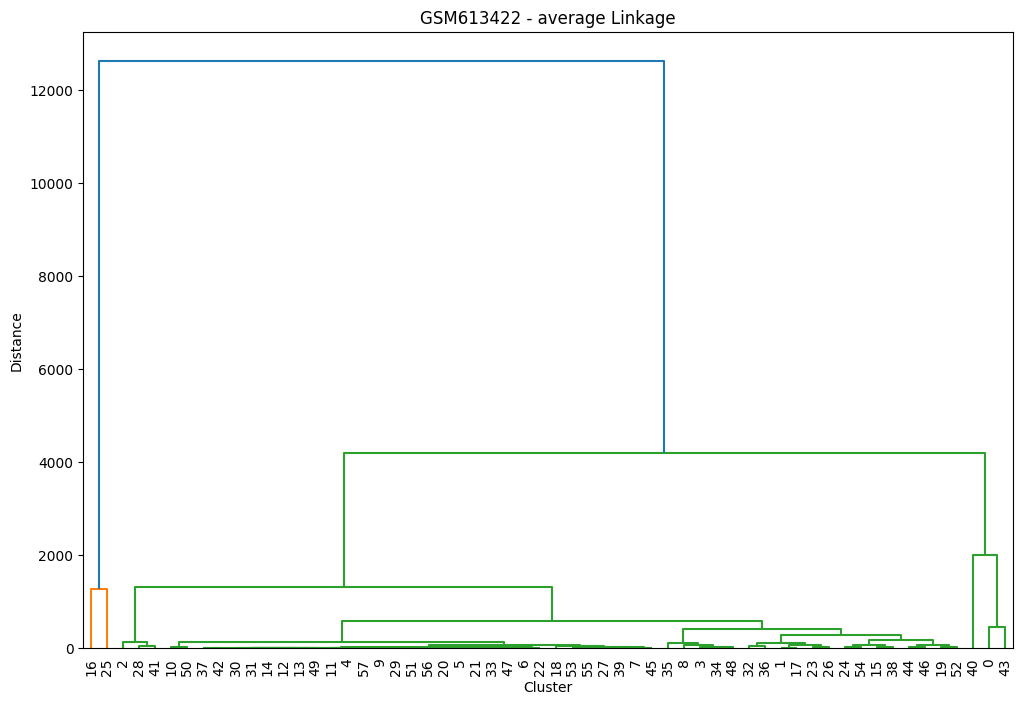

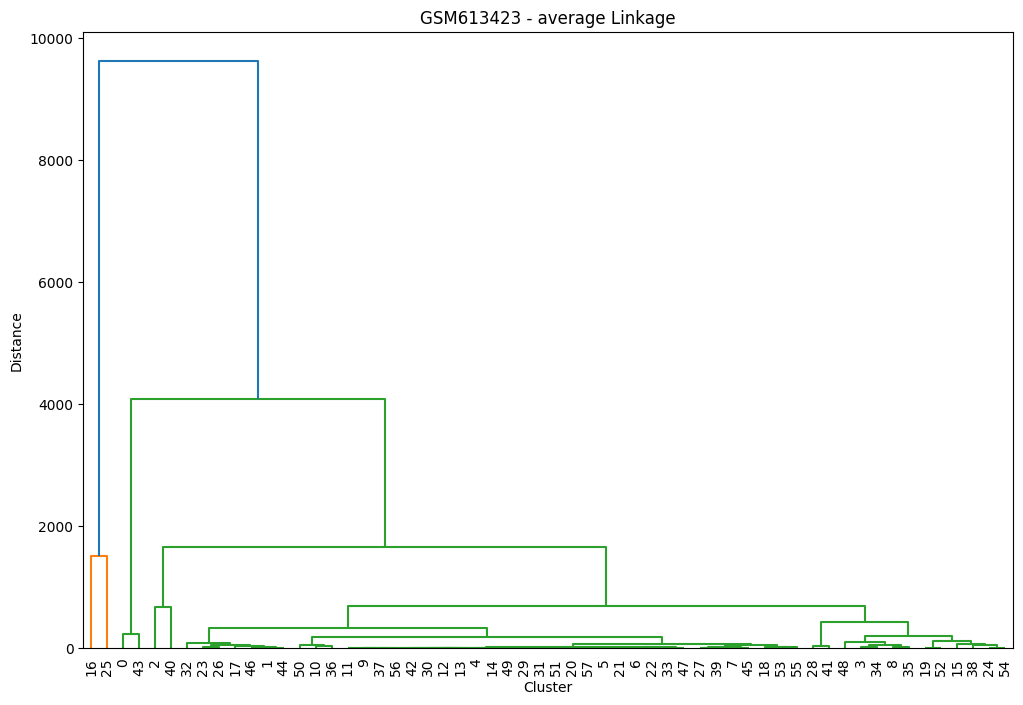

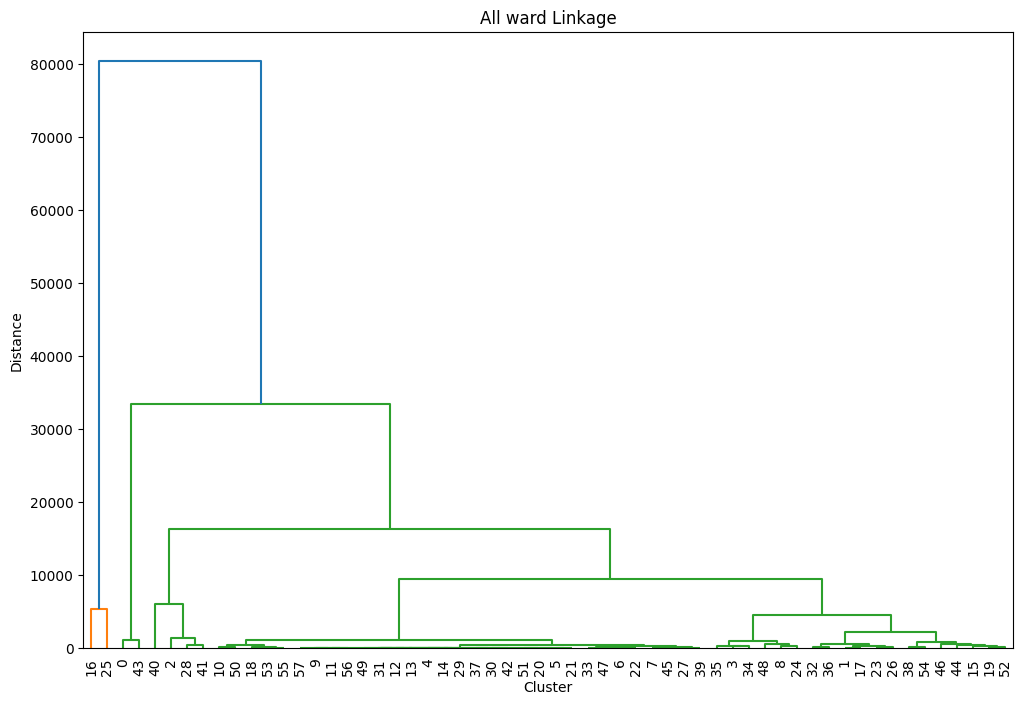

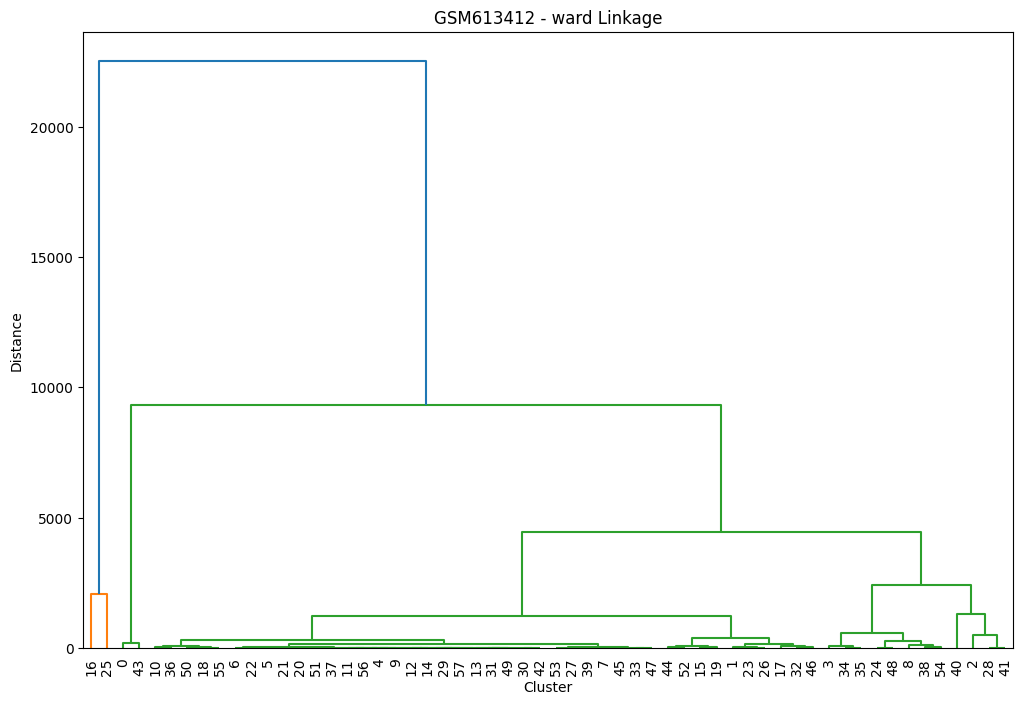

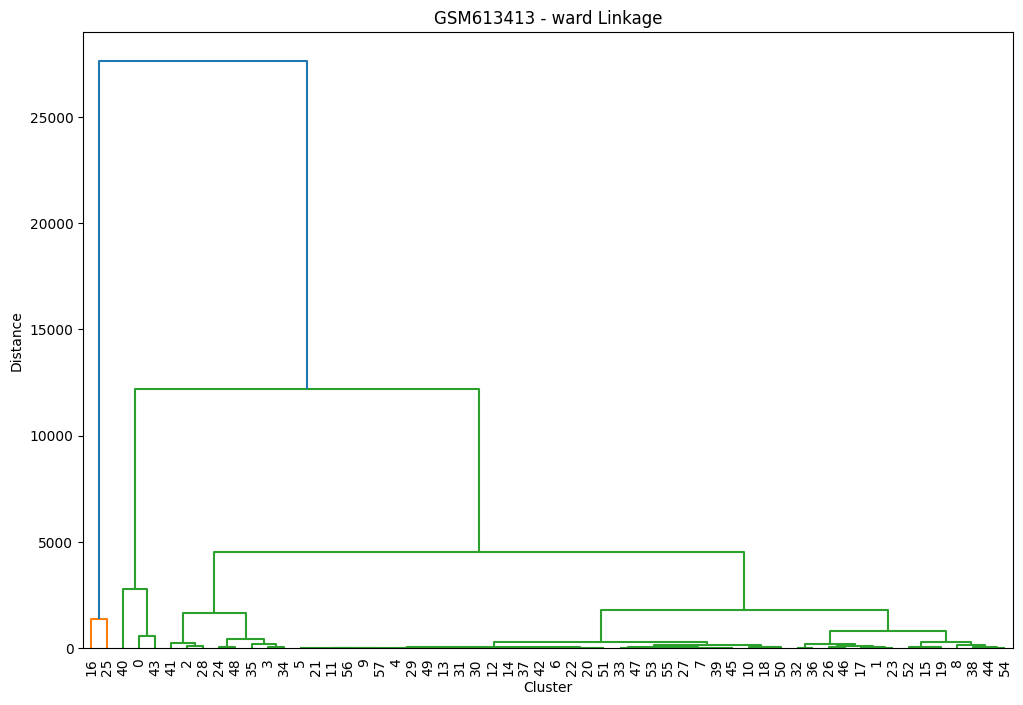

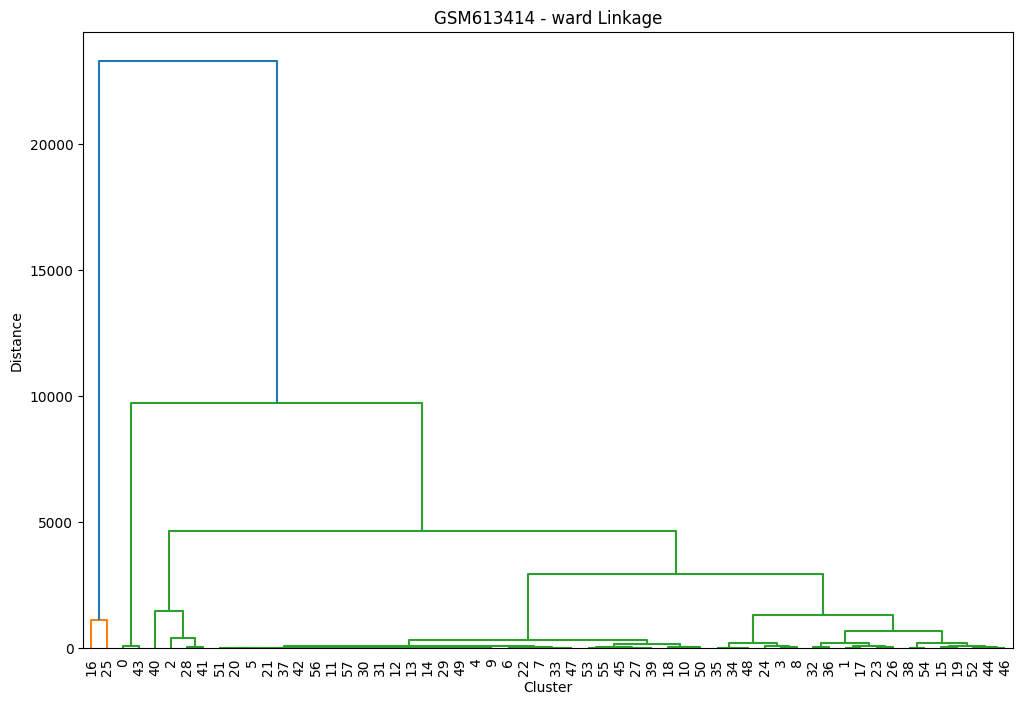

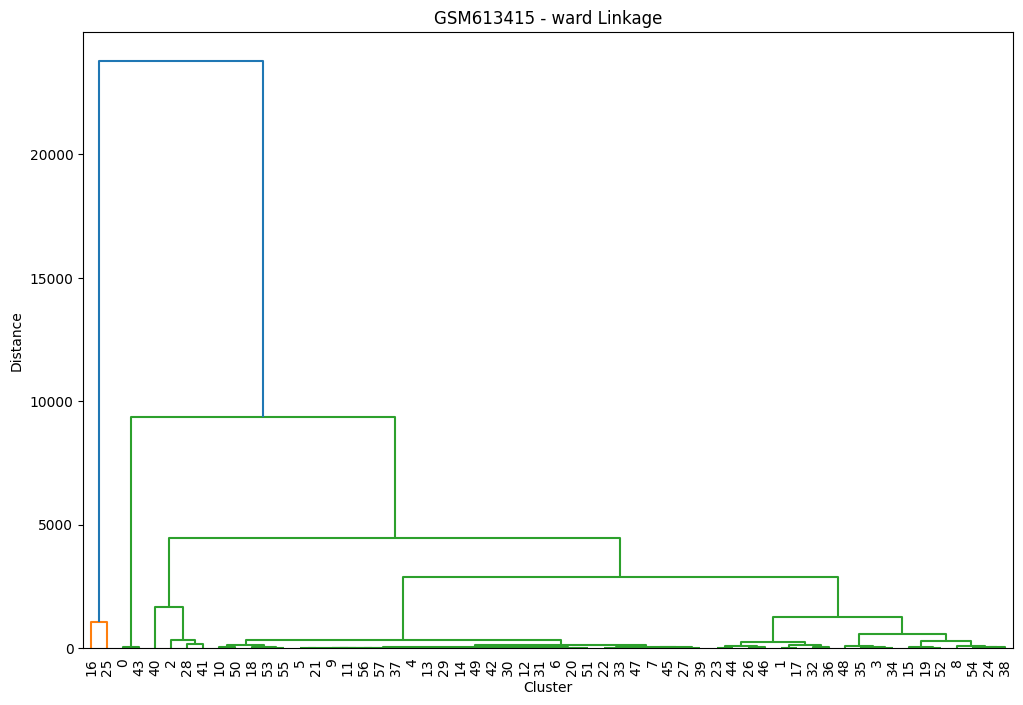

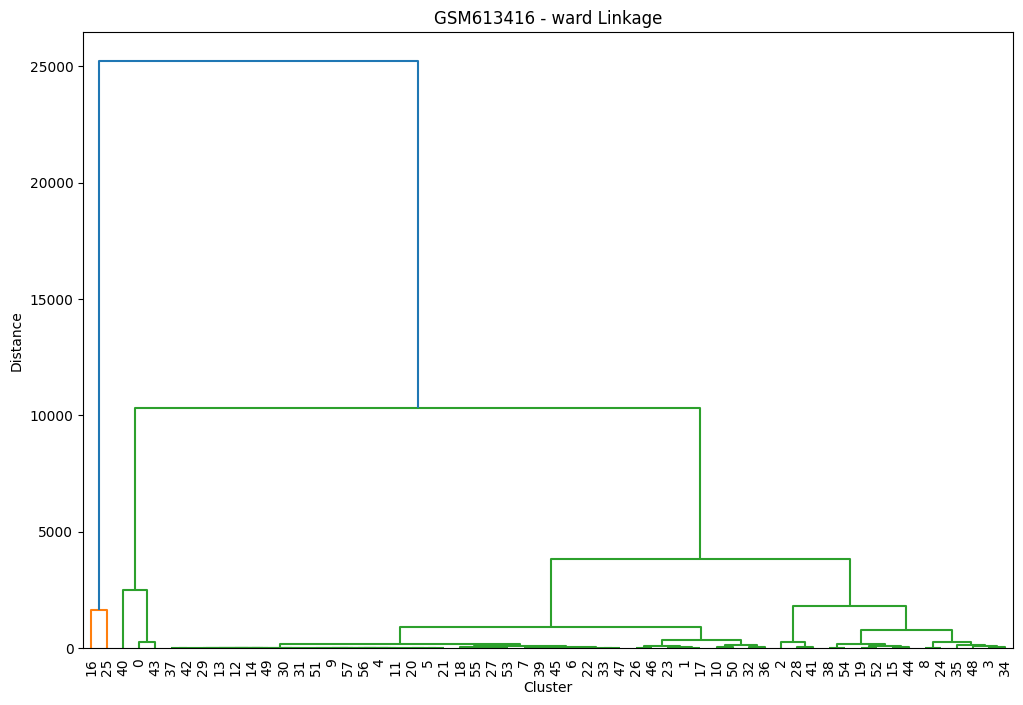

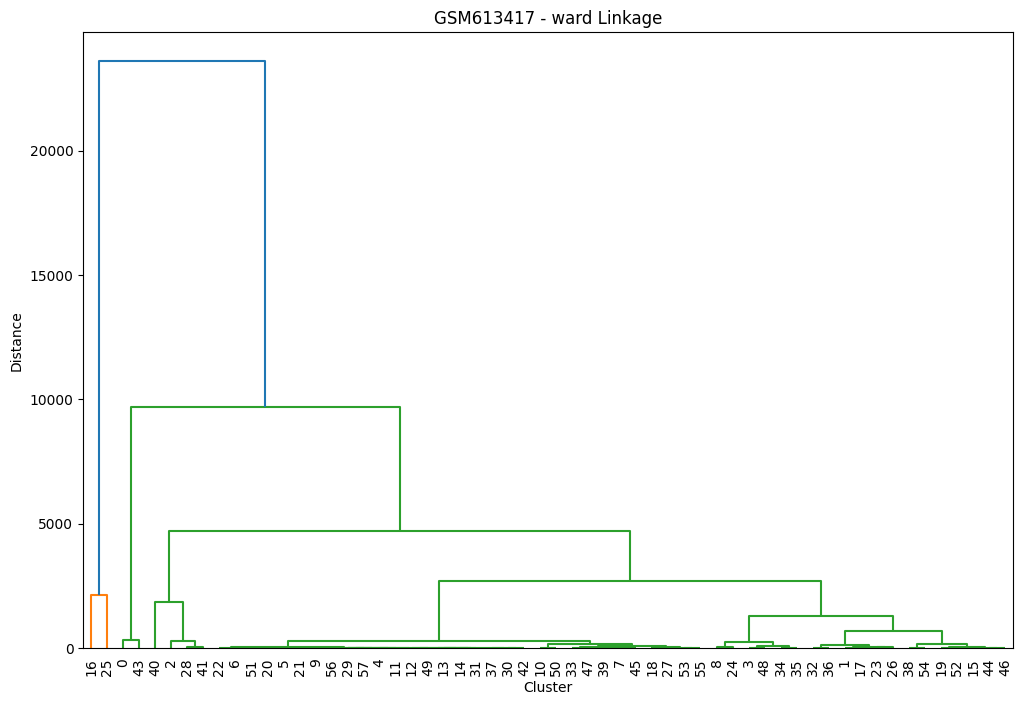

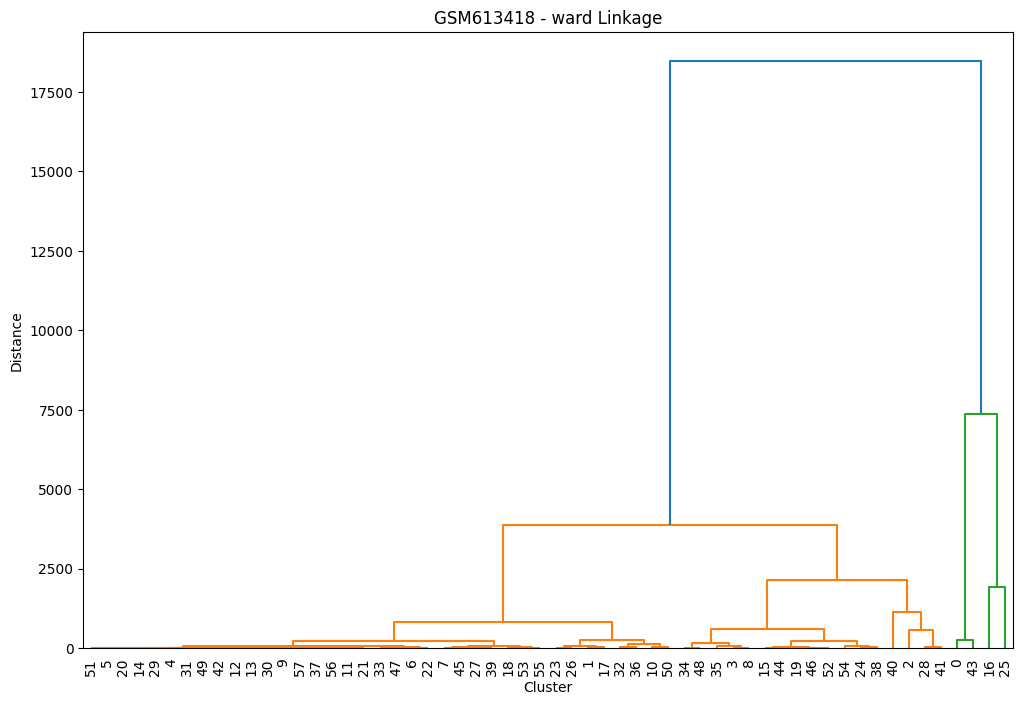

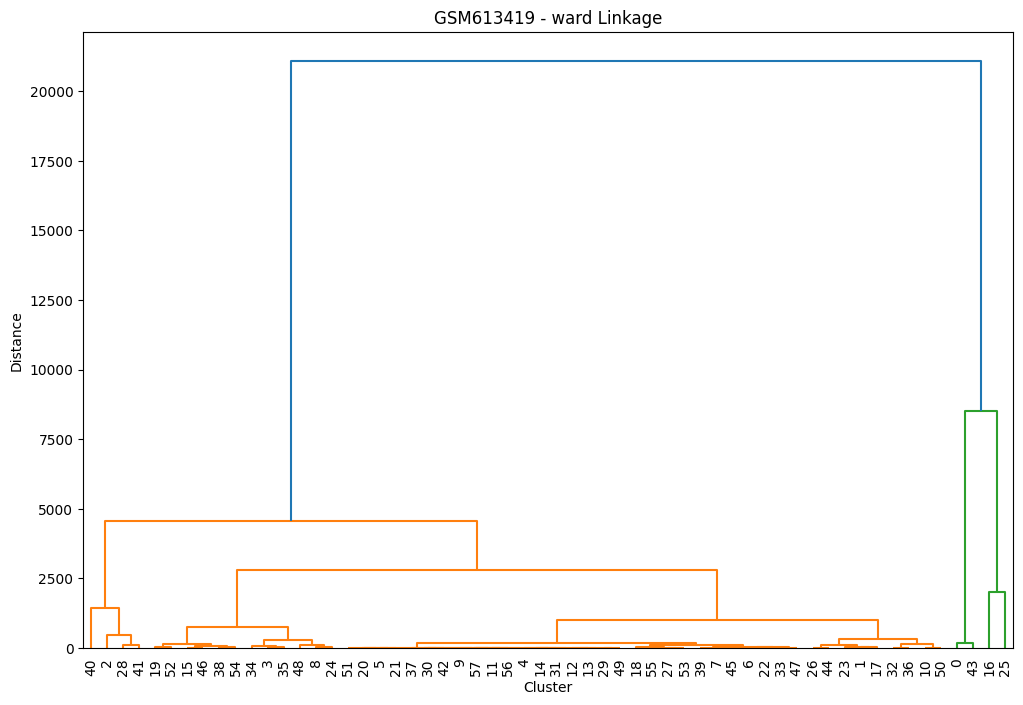

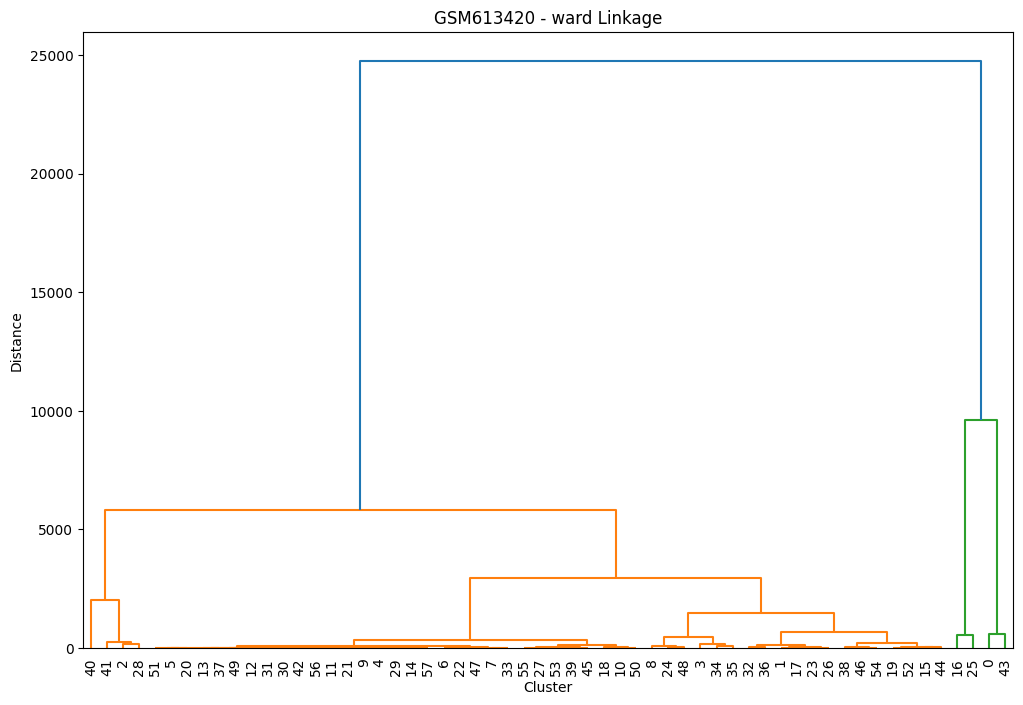

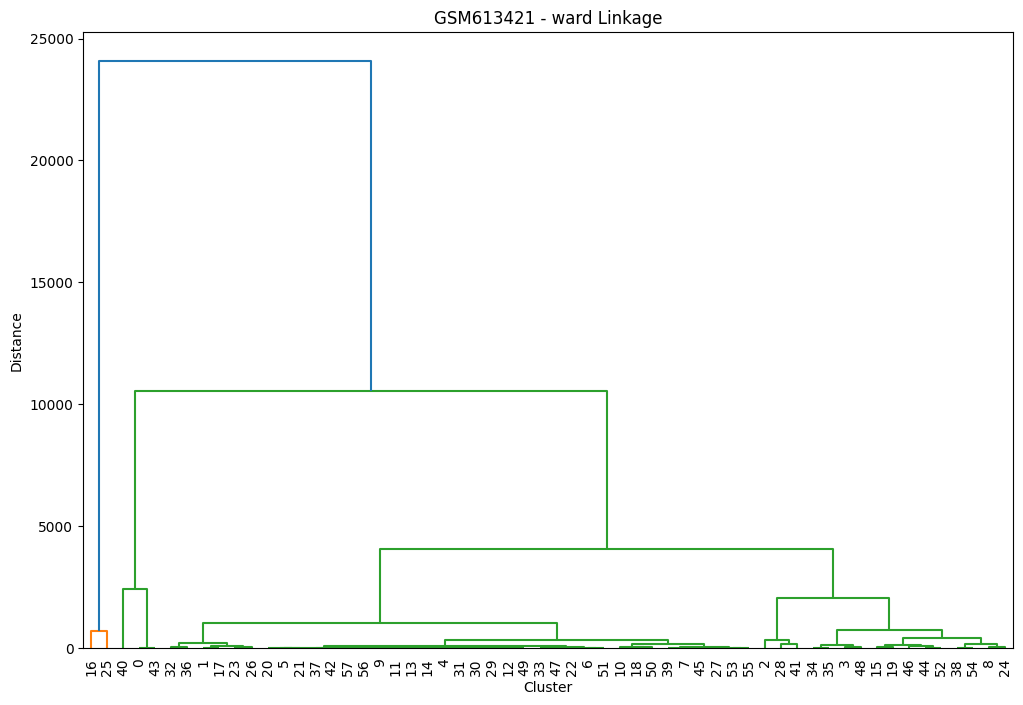

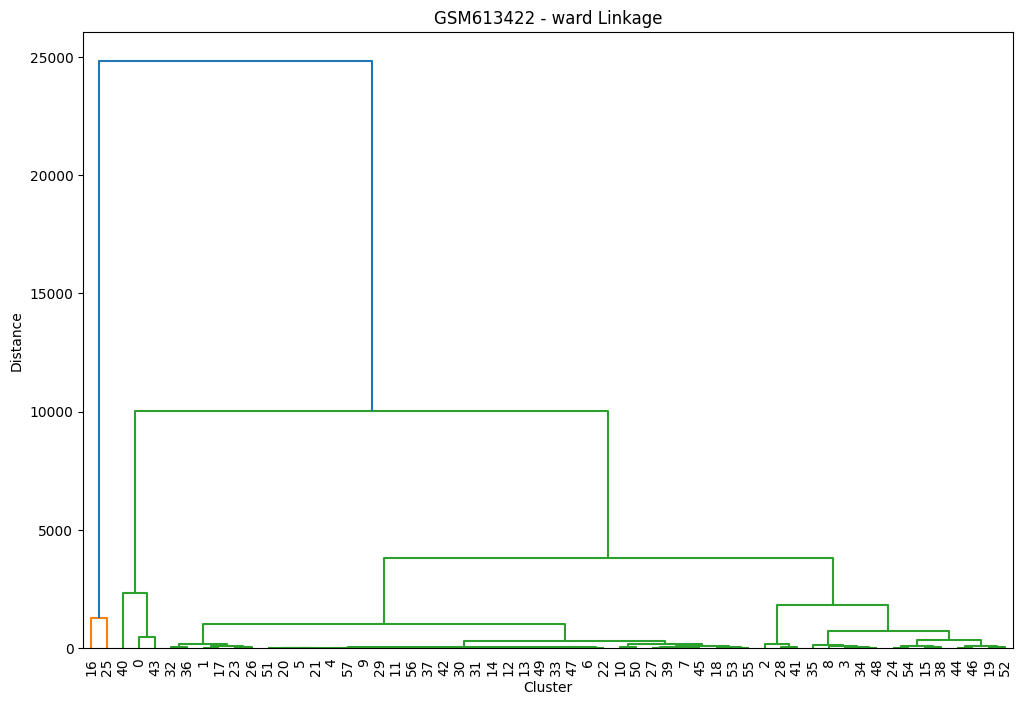

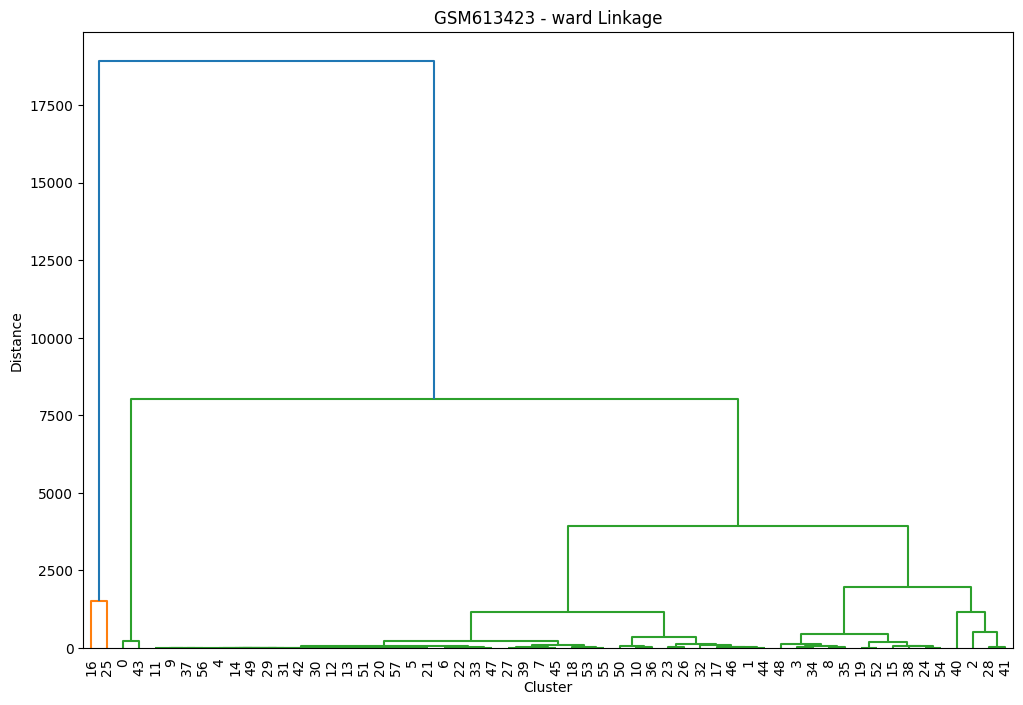

In [21]:
genedata = pd.read_csv("gene.csv", index_col=0)
linkage_methods = ['single', 'complete', 'average', 'ward']
# hc = HierarchicalClustering(genedata)
# linkage_matrix_ward = hc.perform_clustering(linkage_type='complete')
# hc.plot_dendrogram(linkage_matrix_ward, title='suii')
for linkage_type in linkage_methods:
    hc = HierarchicalClustering(genedata.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in genedata.columns:
        feature_data = genedata[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')

After Normalizing

In [22]:
X_normalized = (X - X.mean()) / X.std()

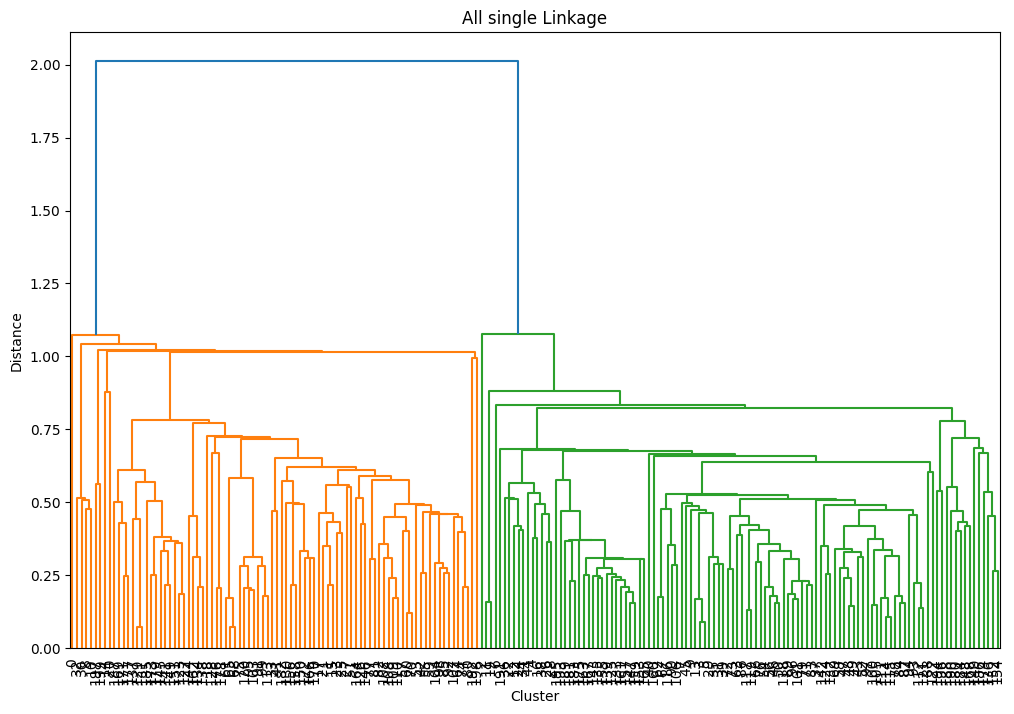

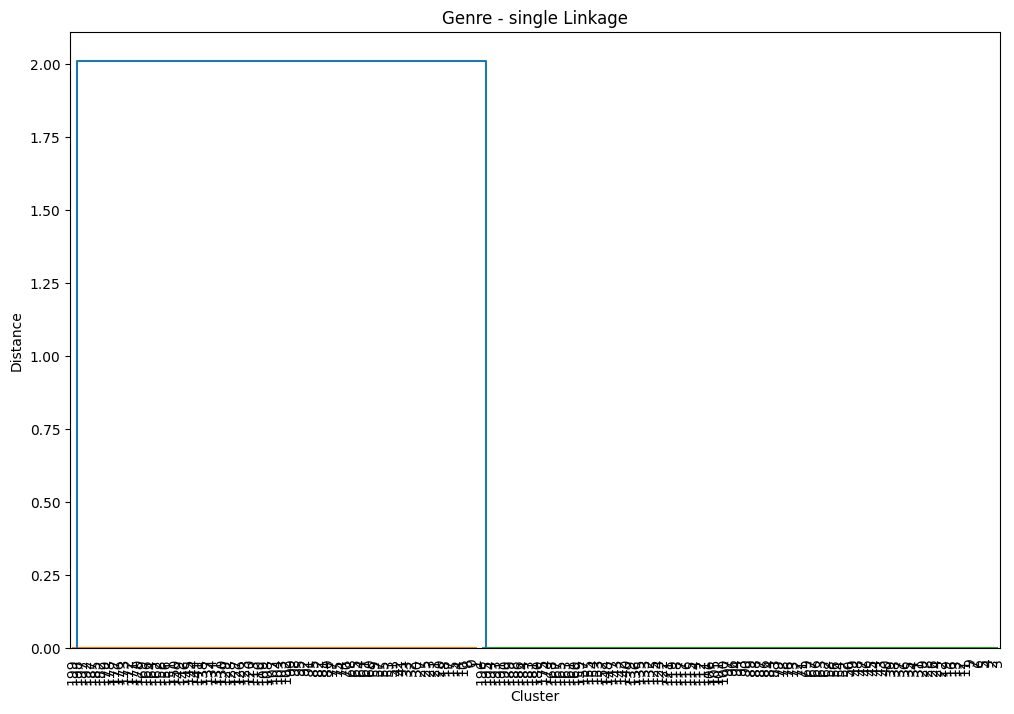

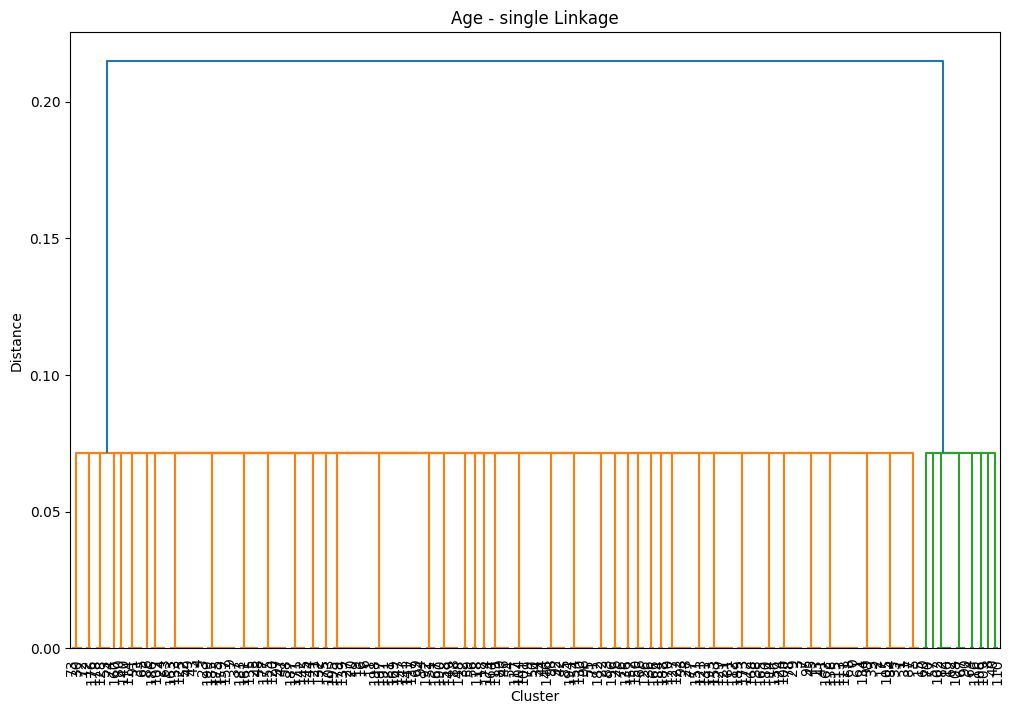

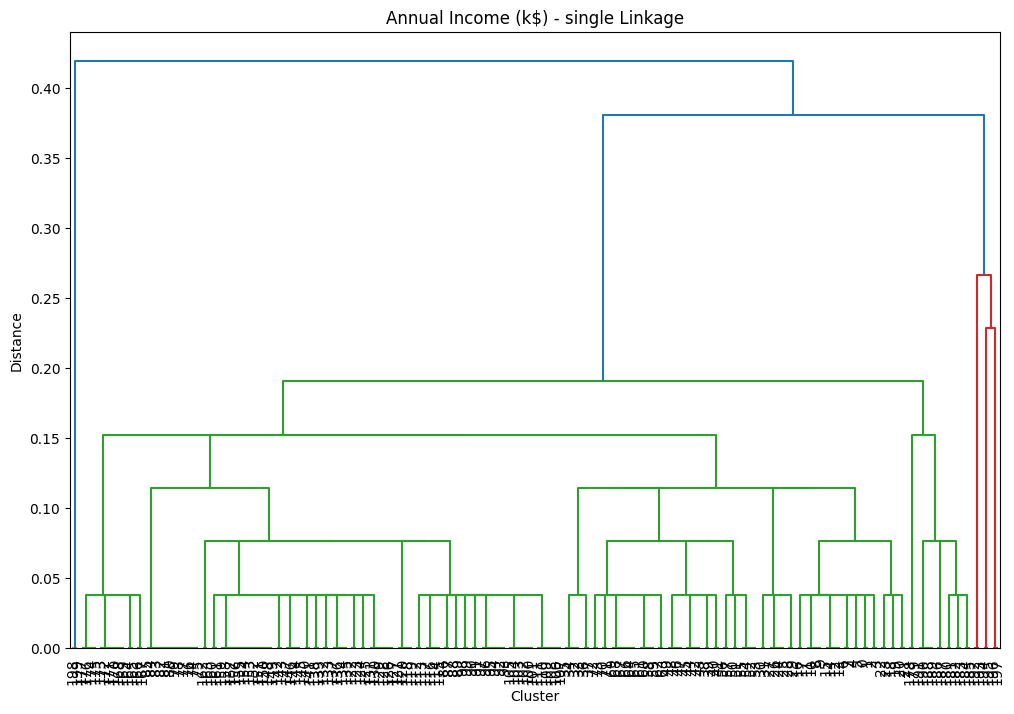

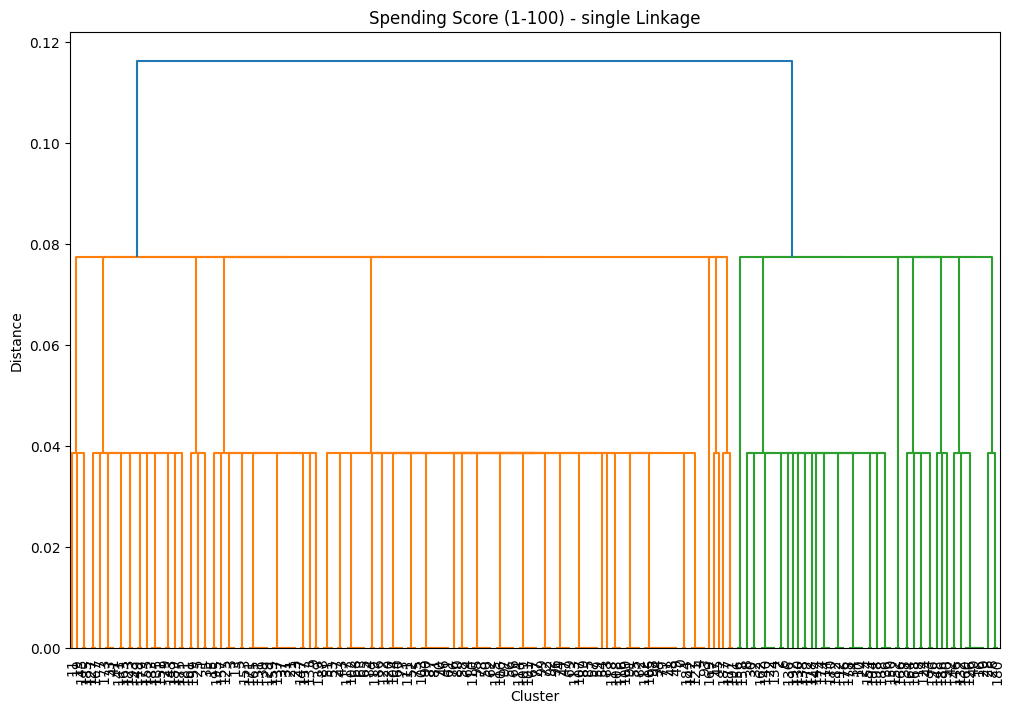

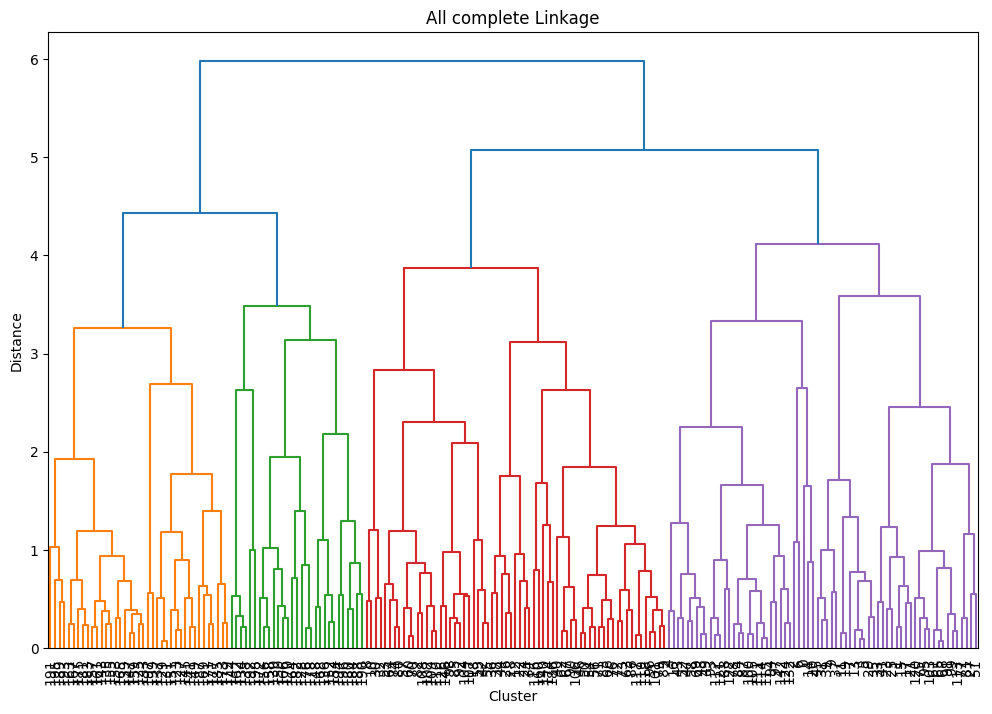

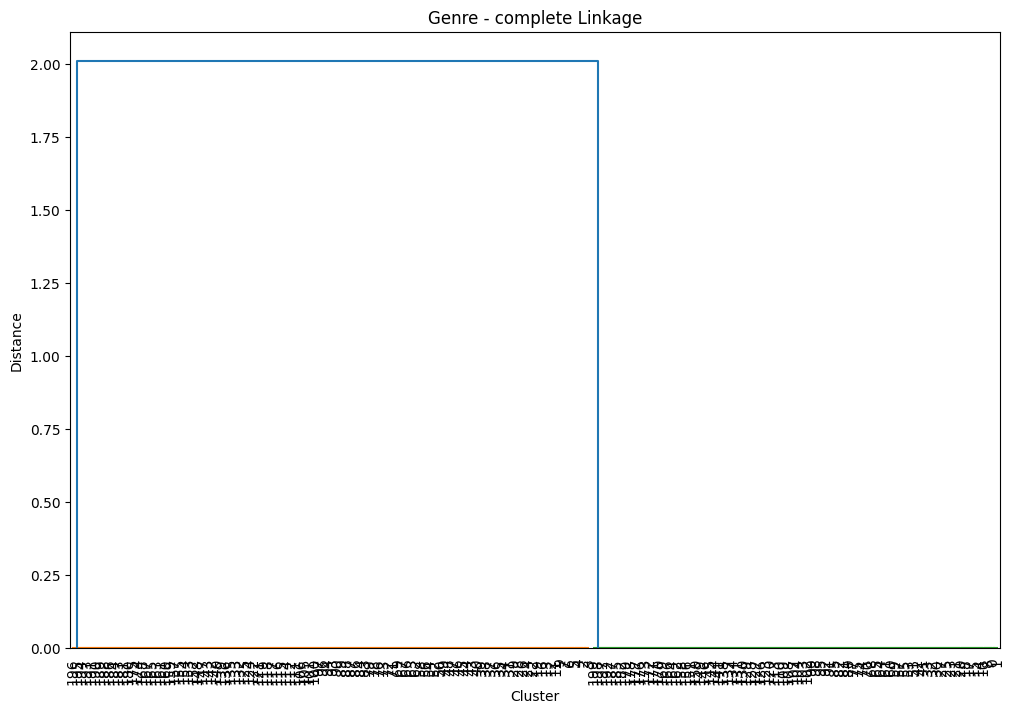

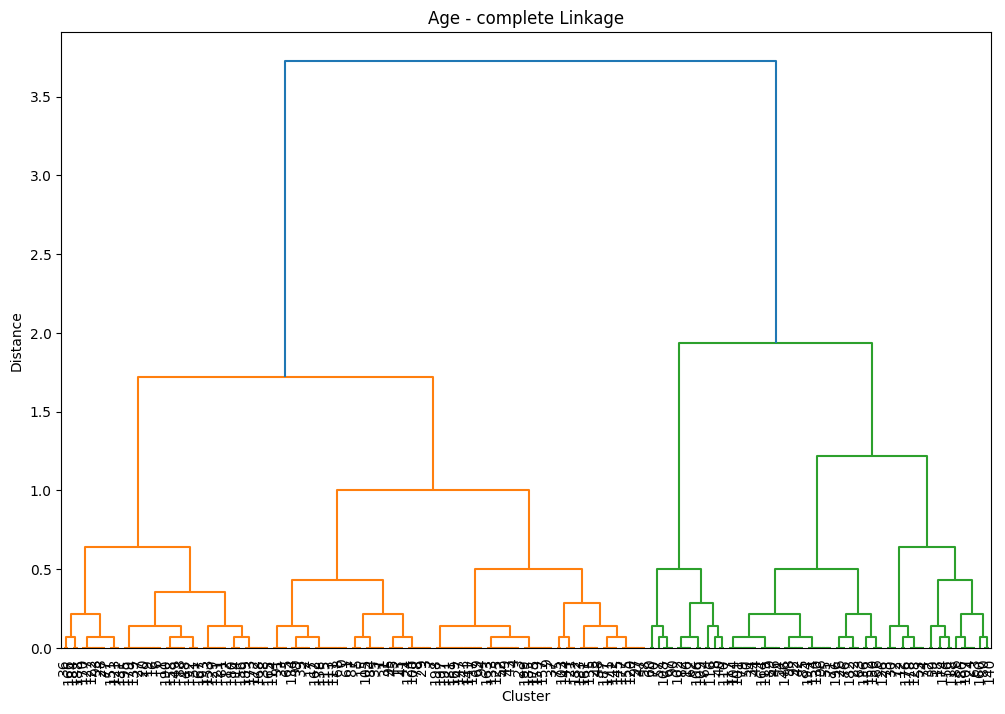

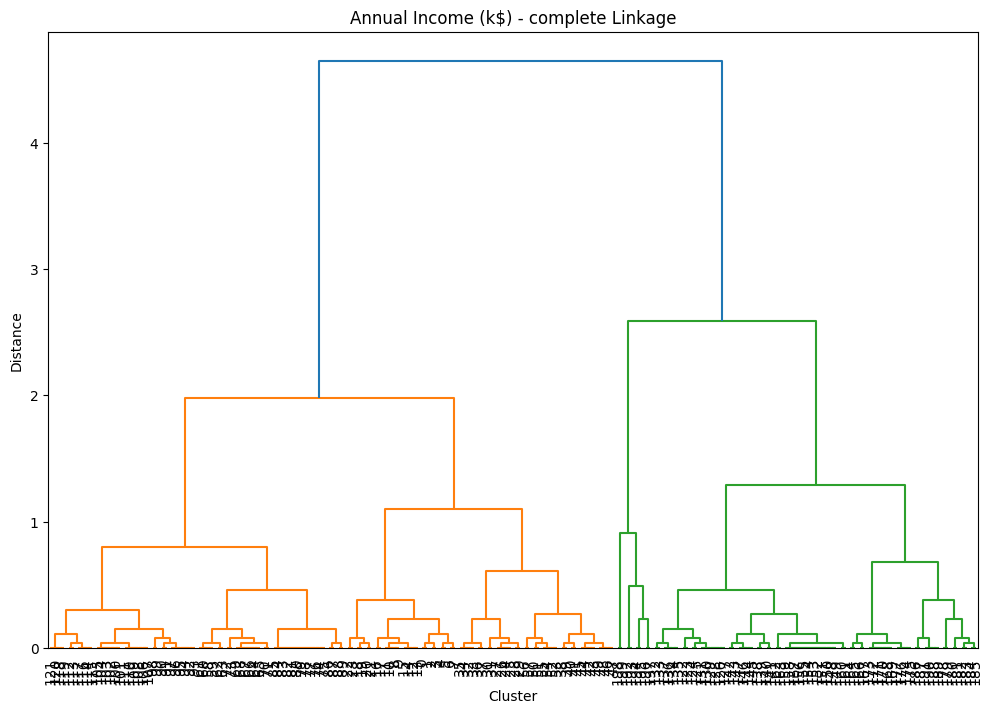

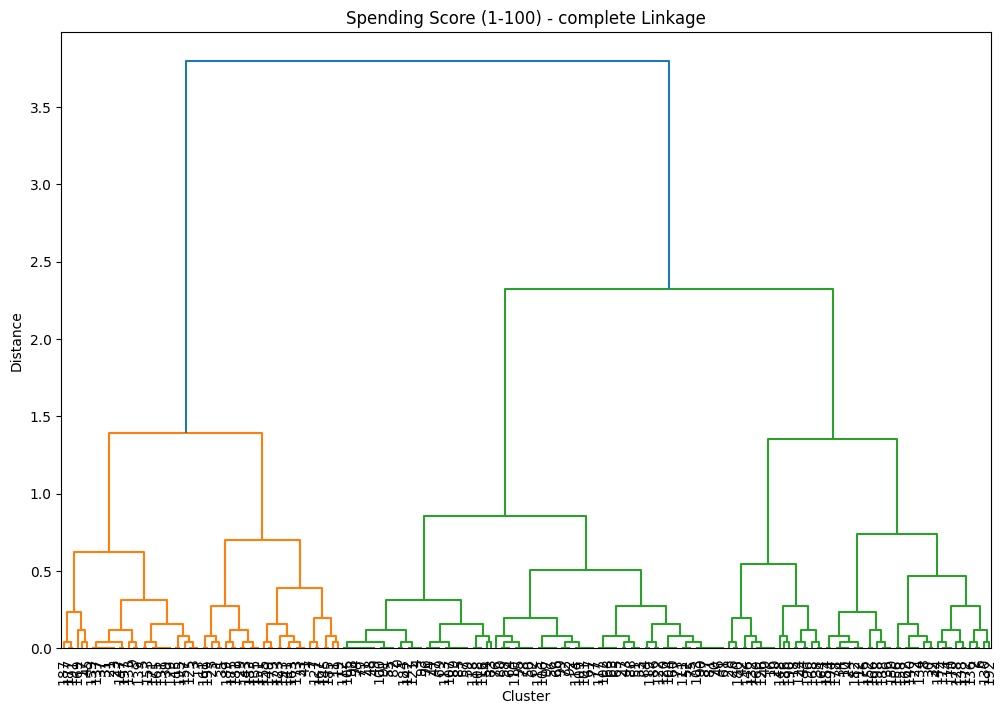

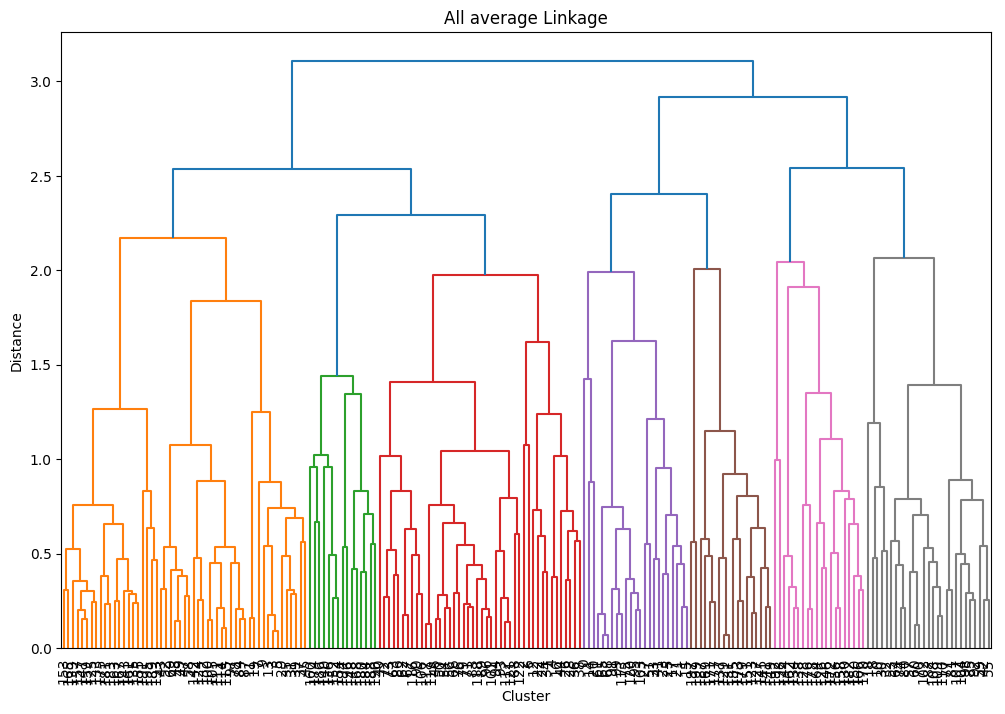

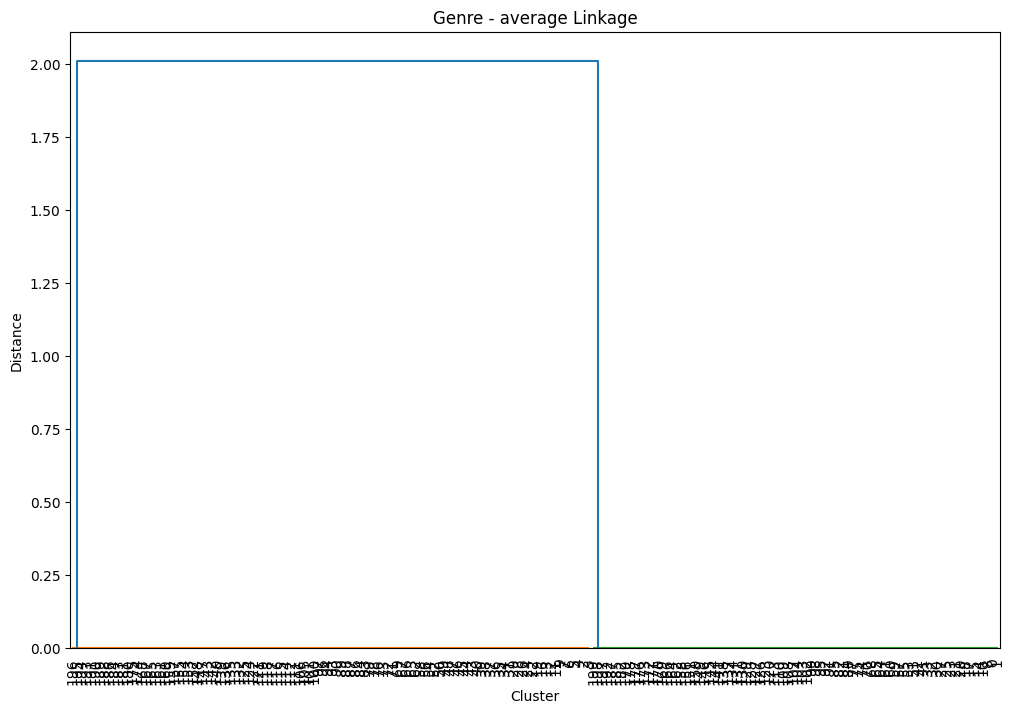

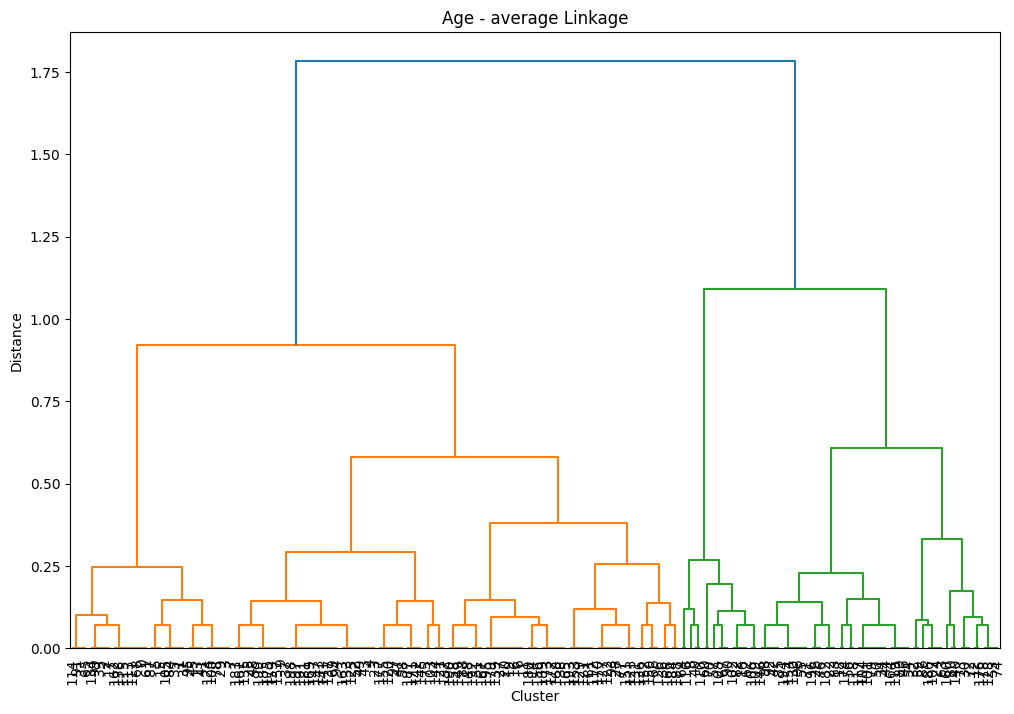

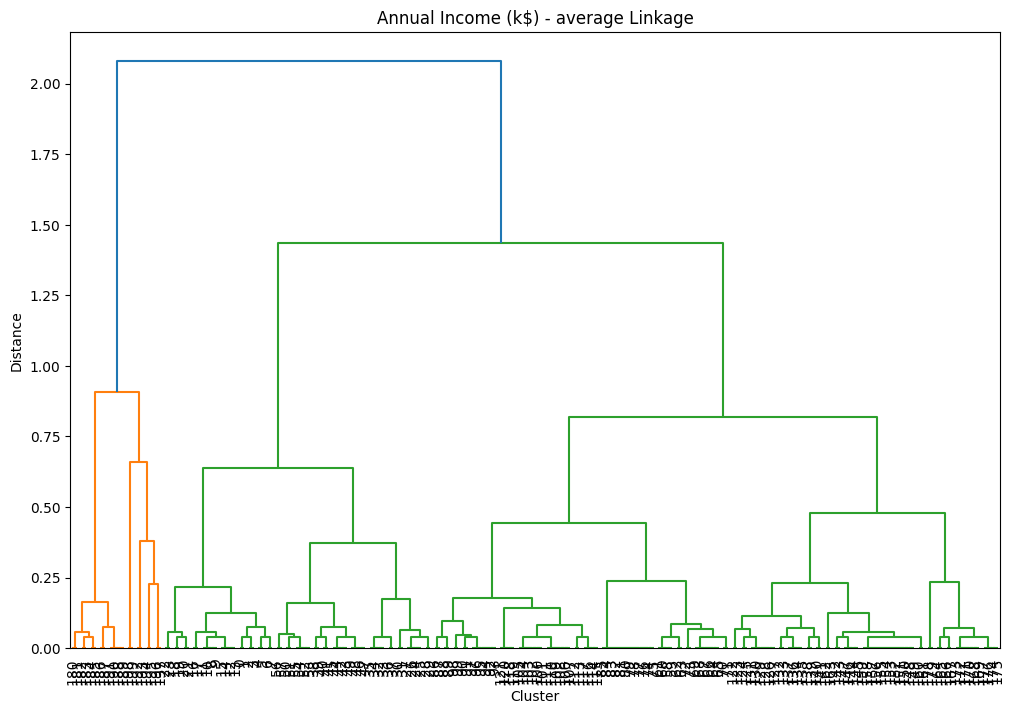

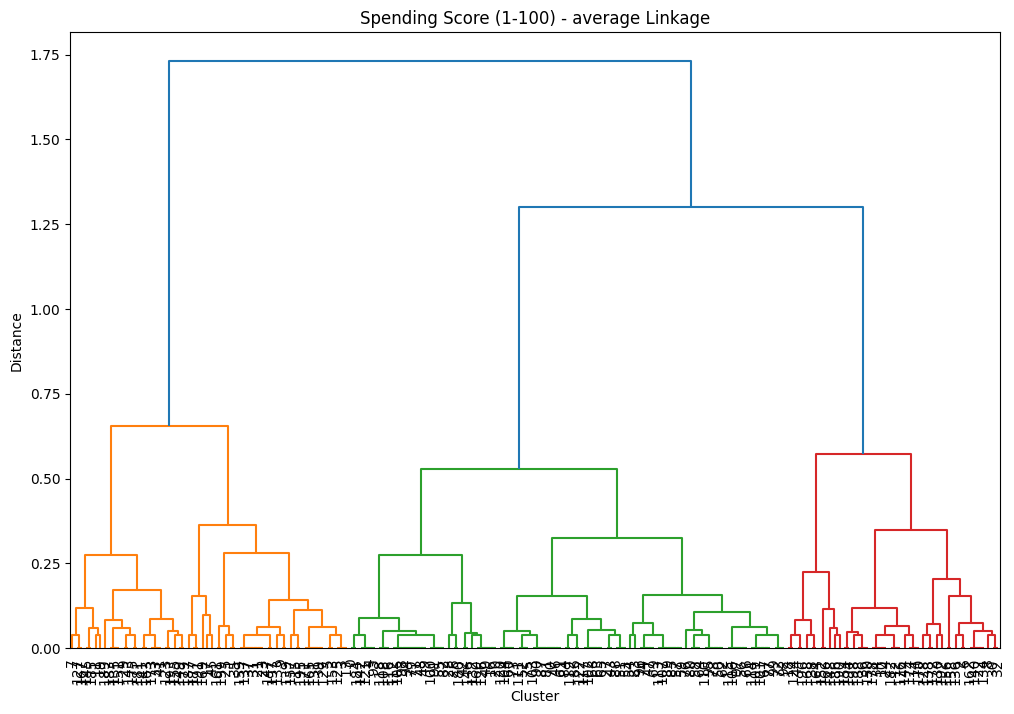

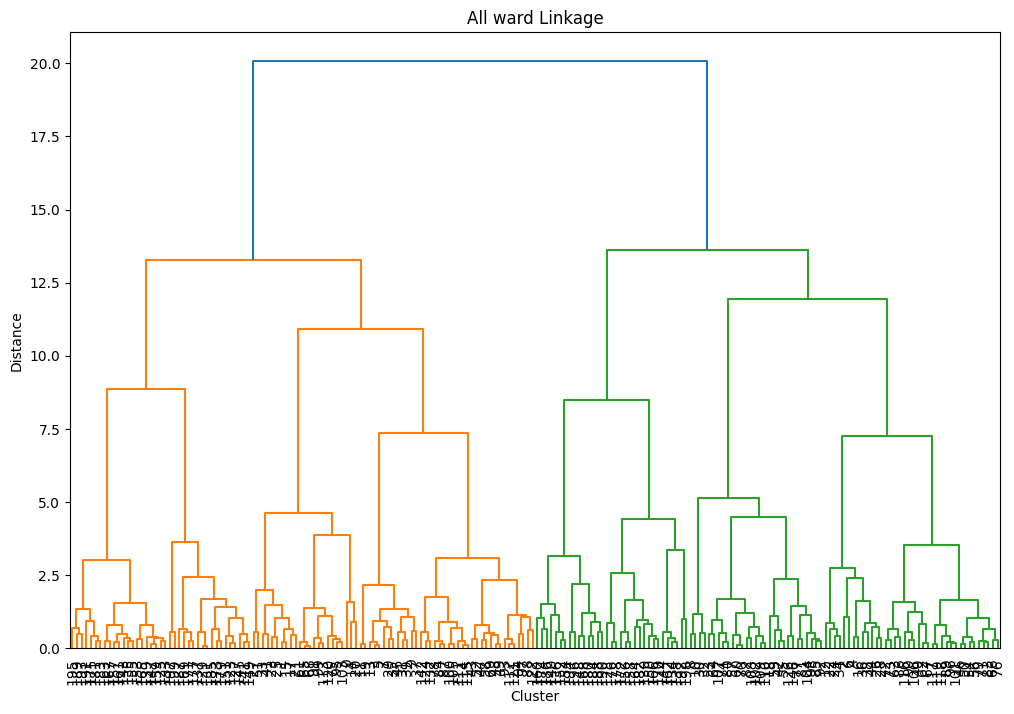

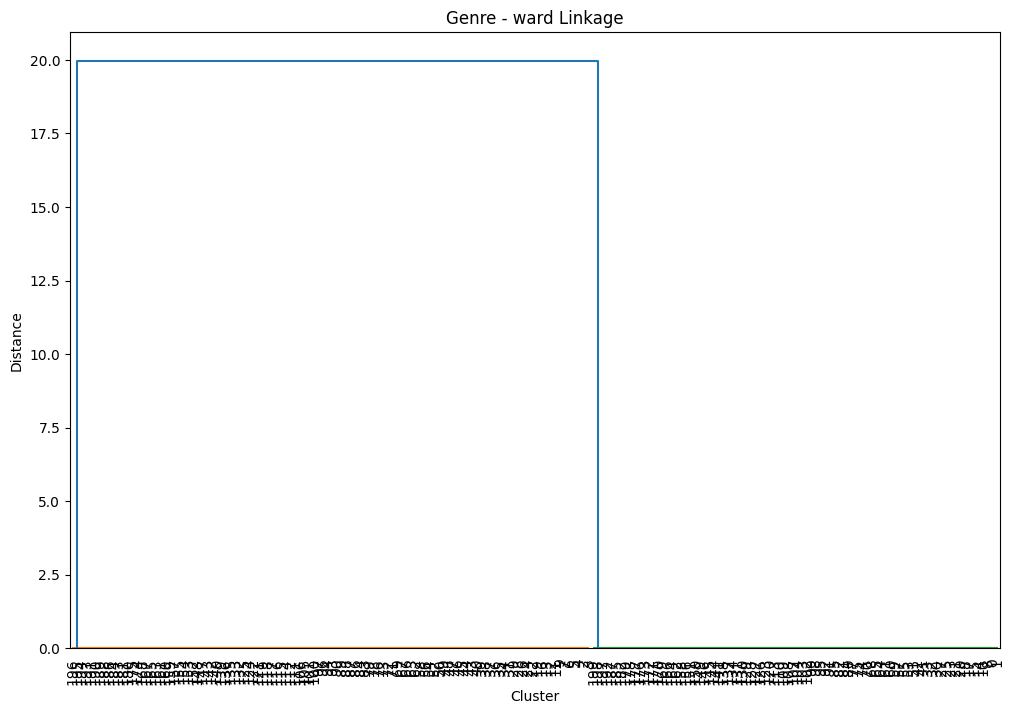

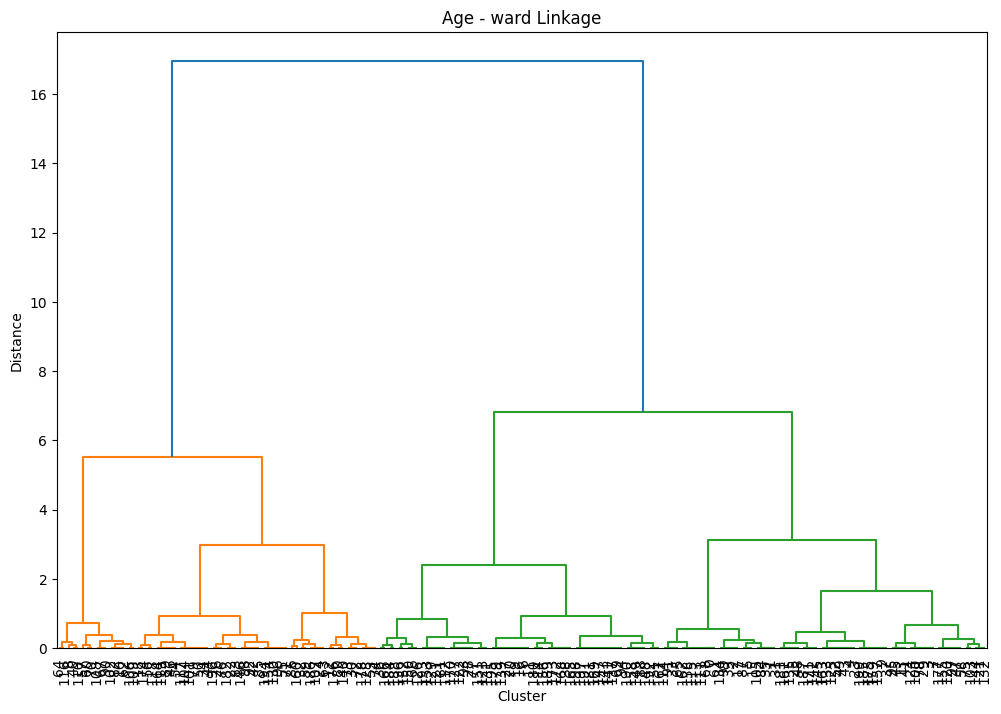

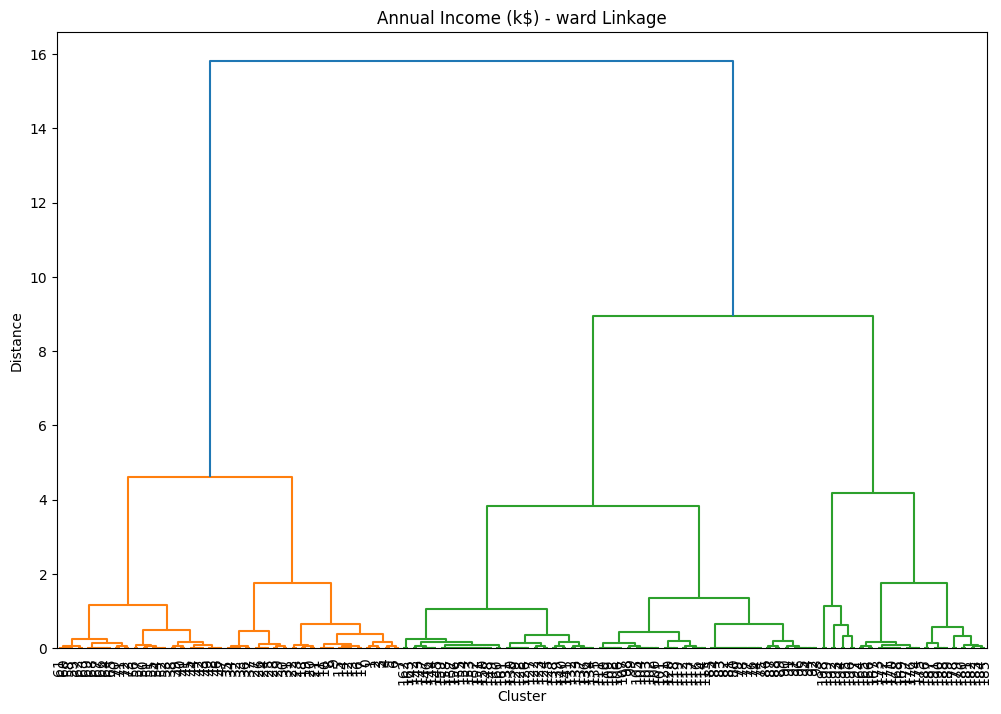

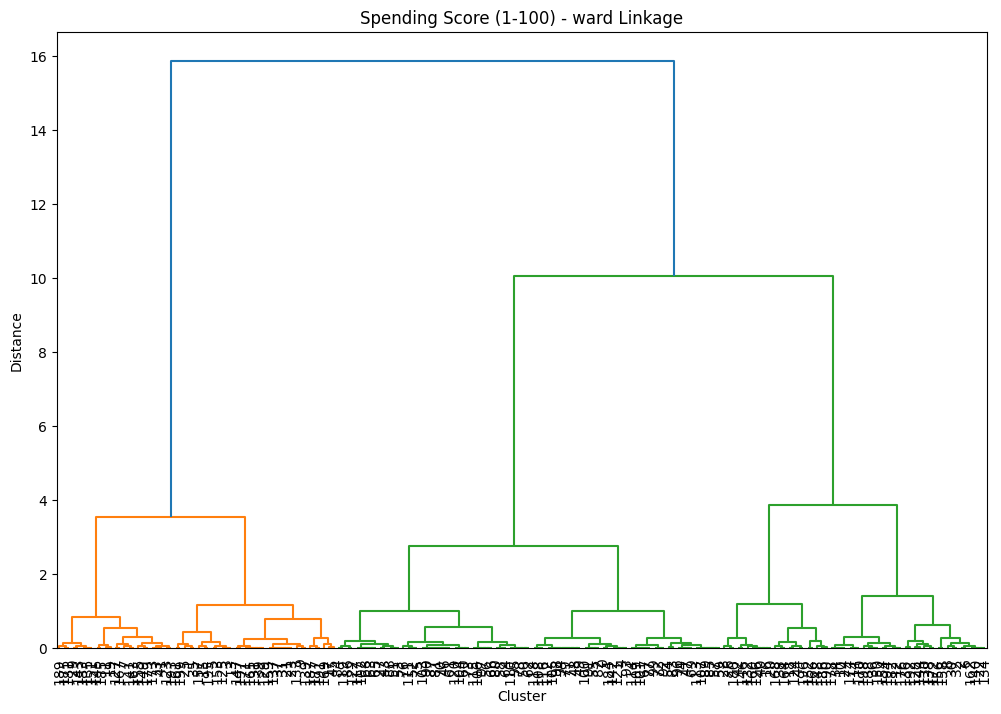

In [23]:
for linkage_type in linkage_methods:
    hc = HierarchicalClustering(X_normalized.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in X_normalized.columns:
        feature_data = X_normalized[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')

In [24]:
norm_genedata = (genedata-genedata.mean()) / genedata.std()

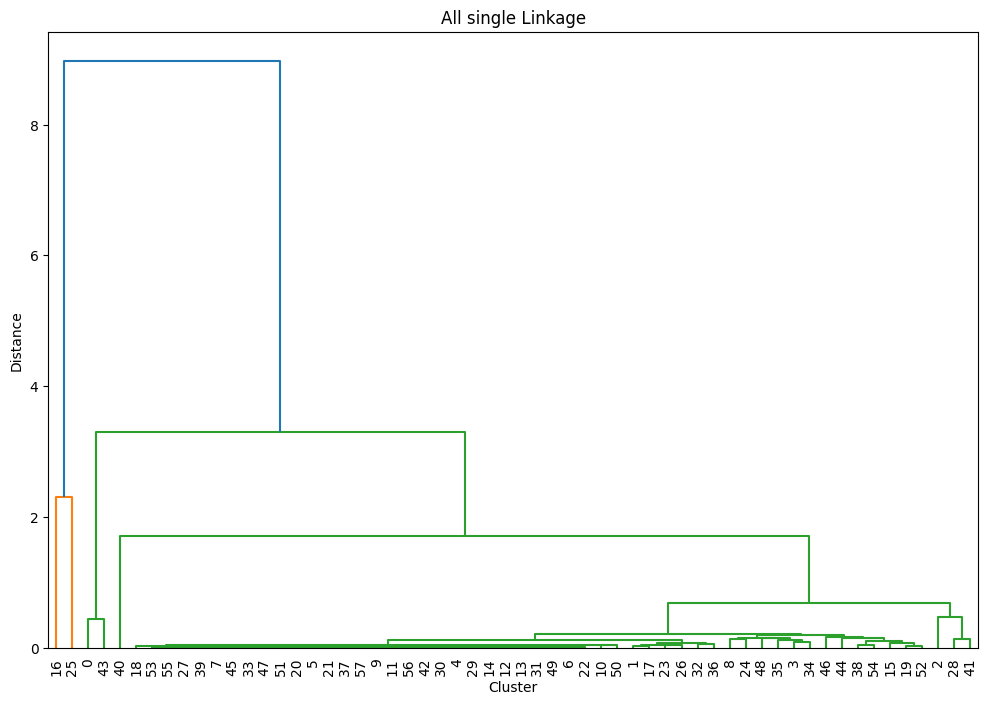

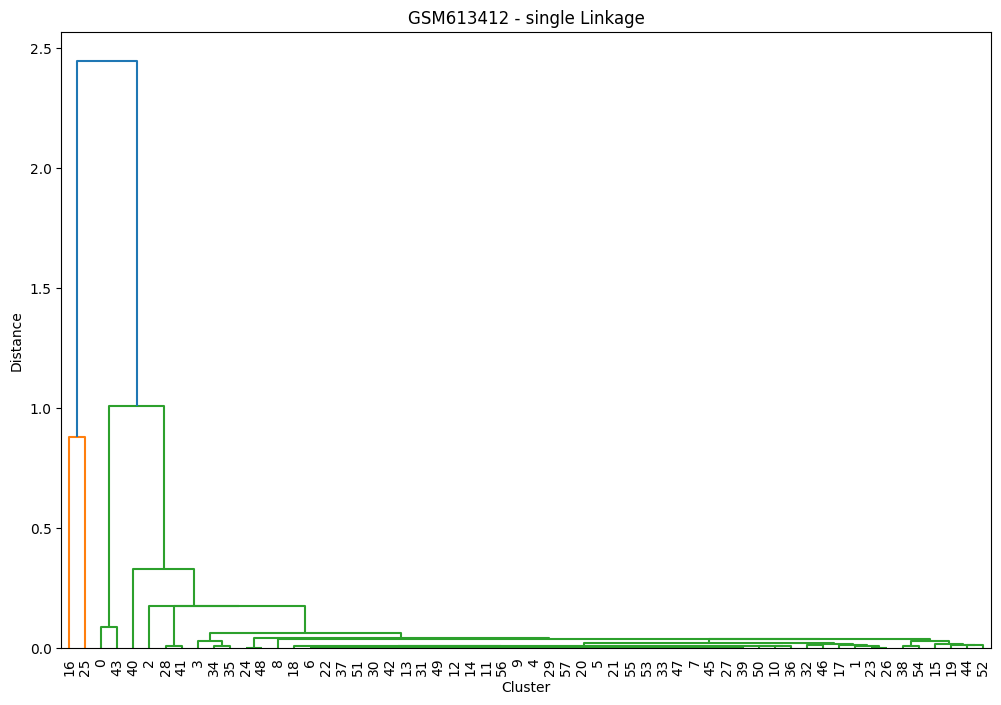

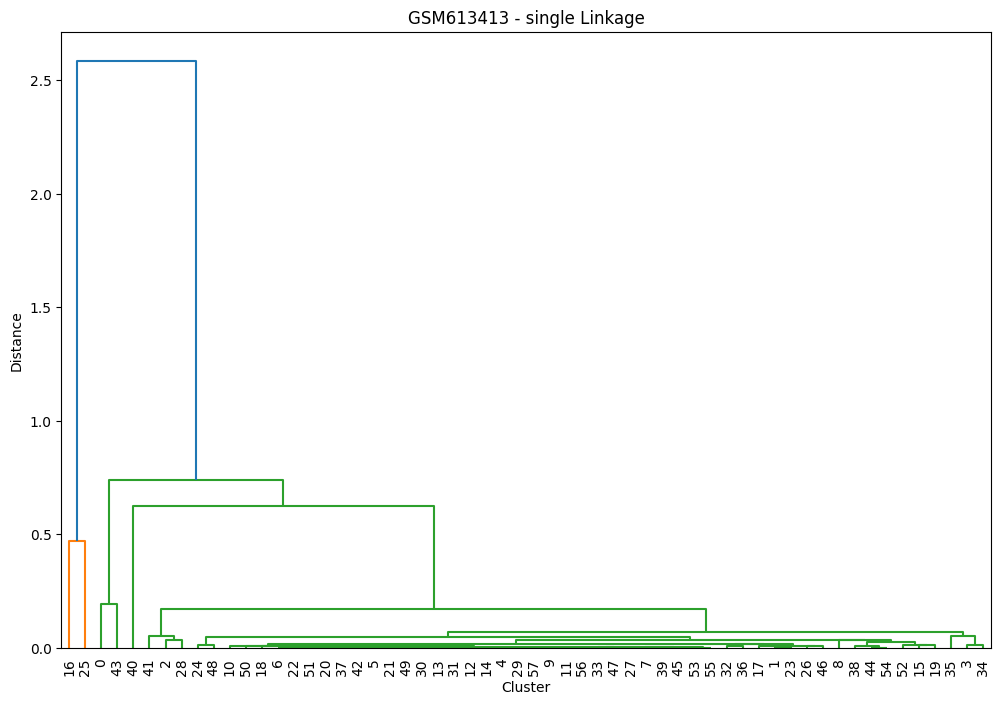

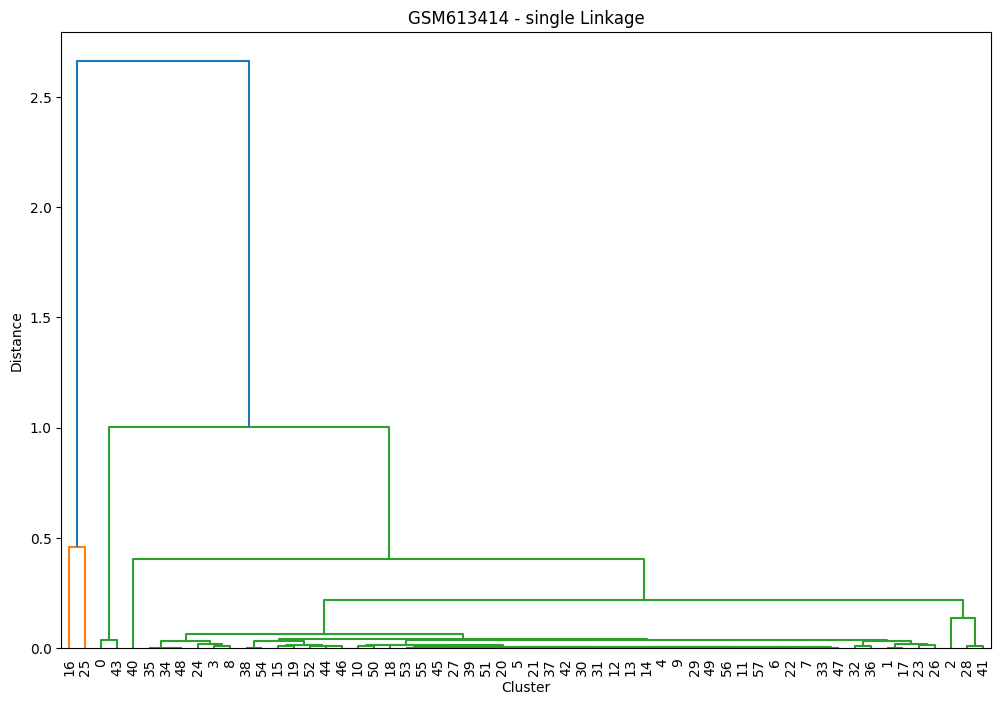

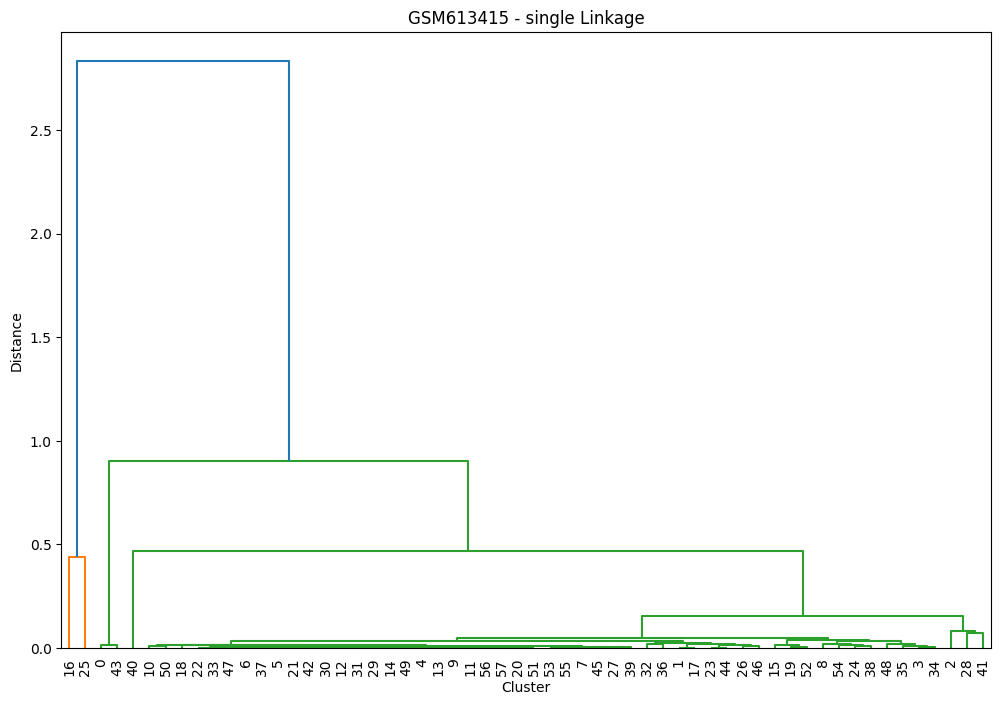

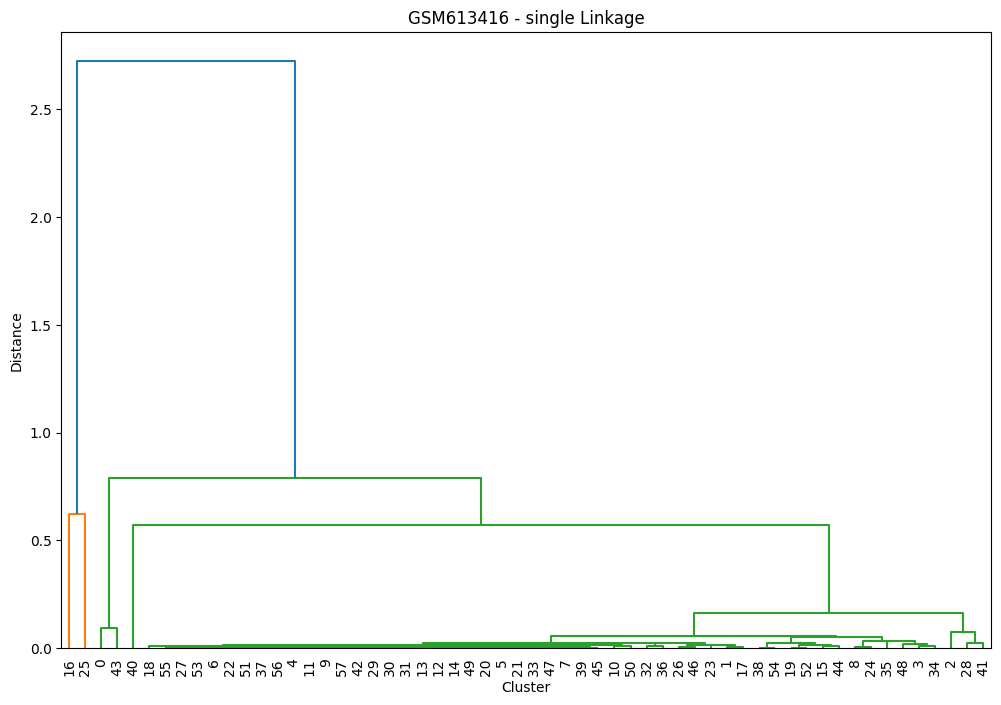

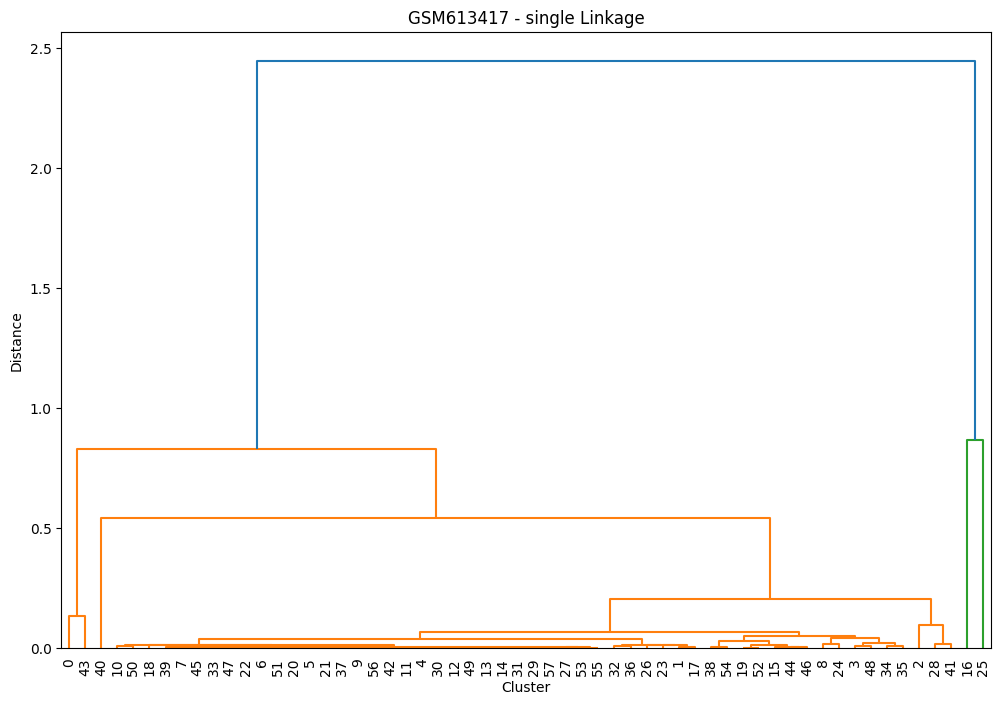

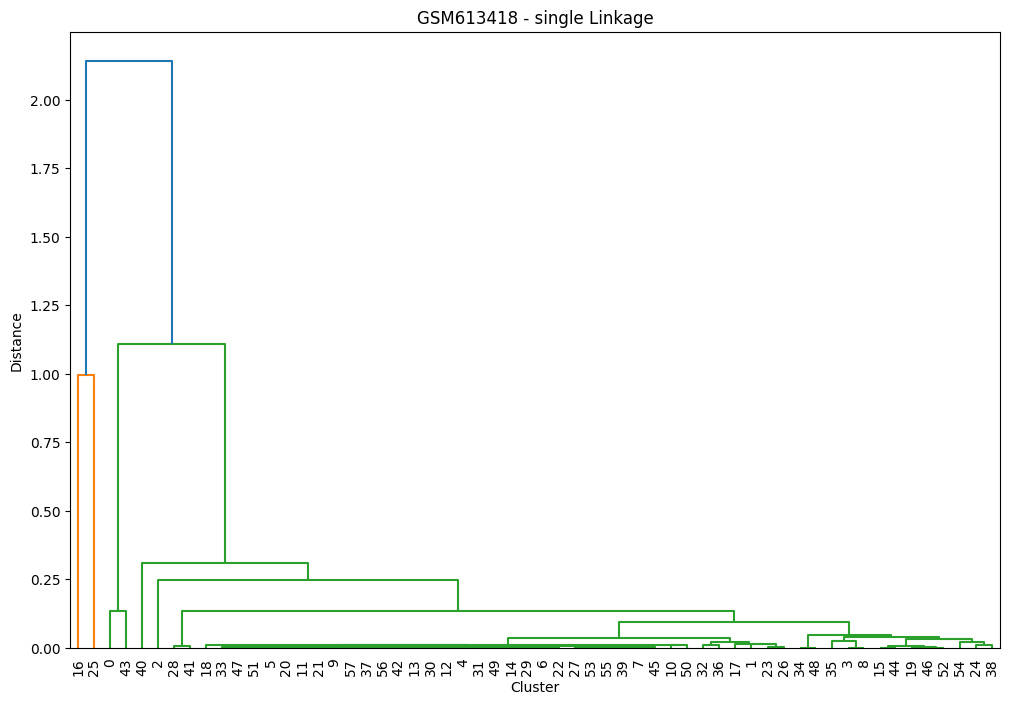

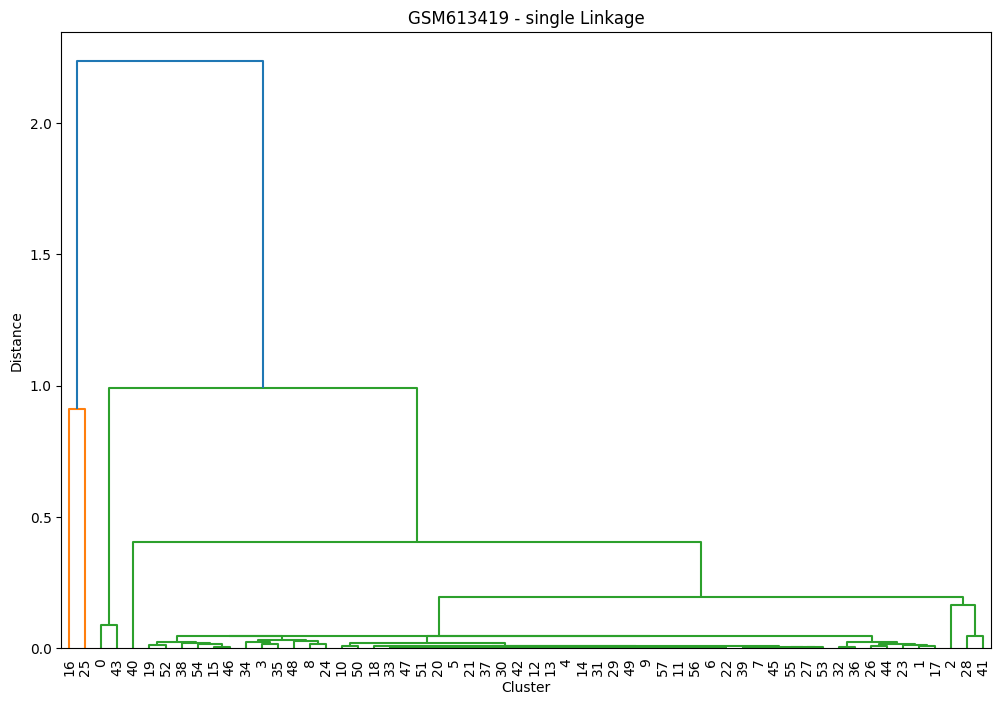

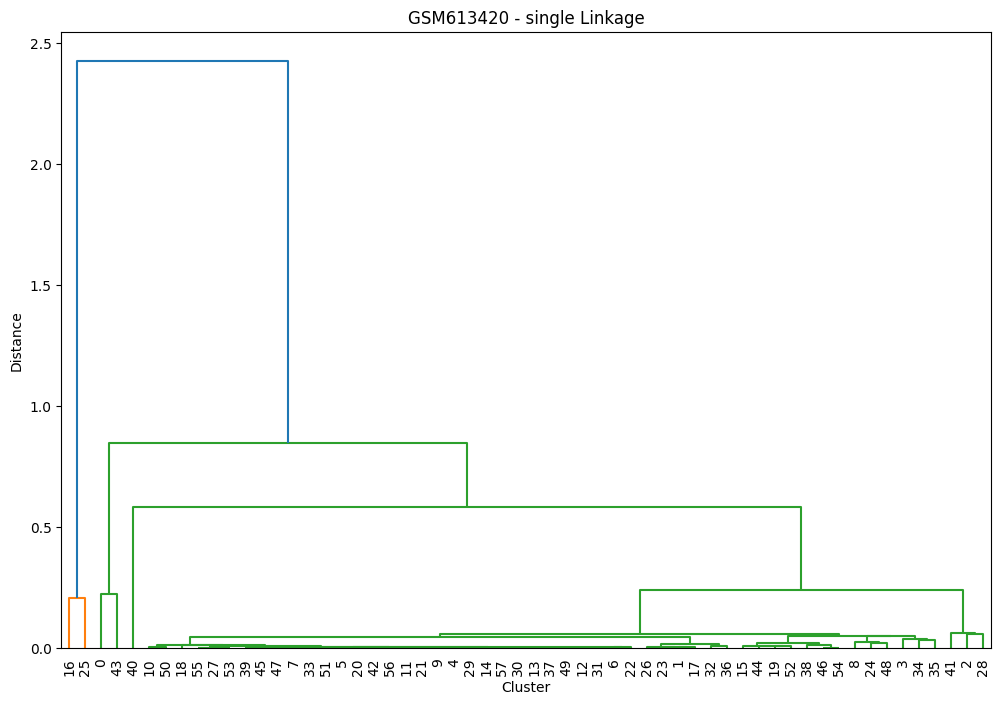

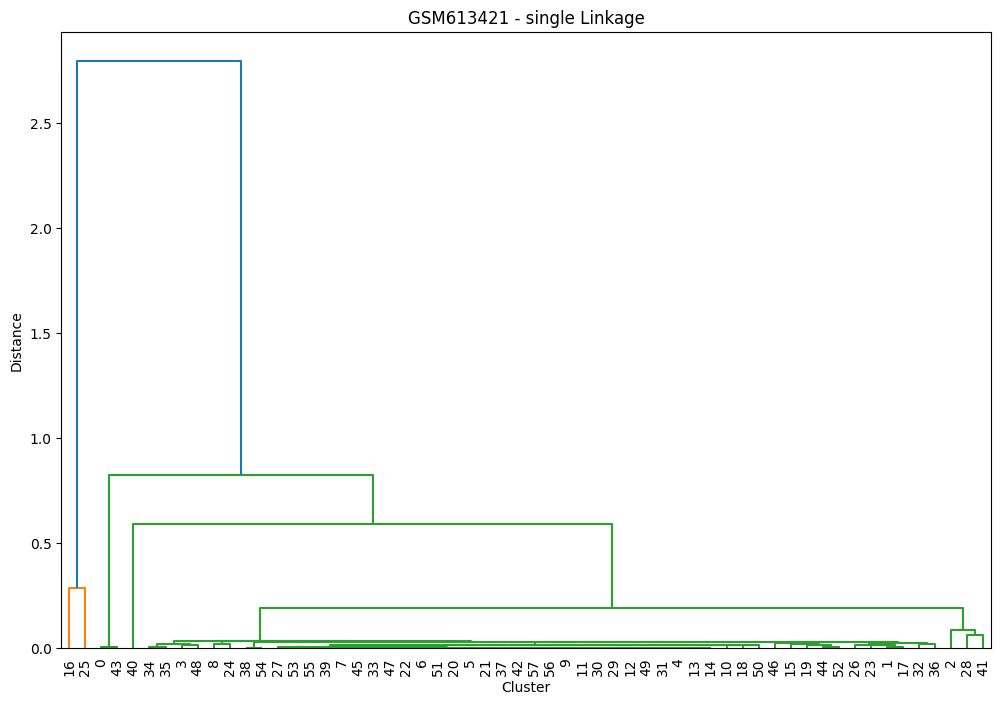

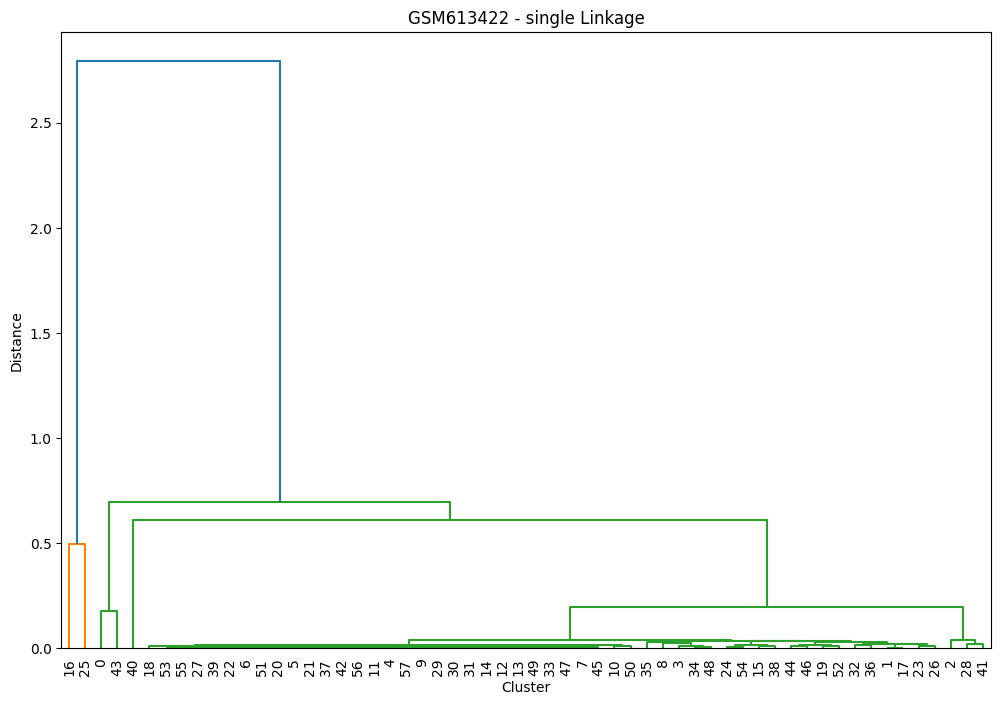

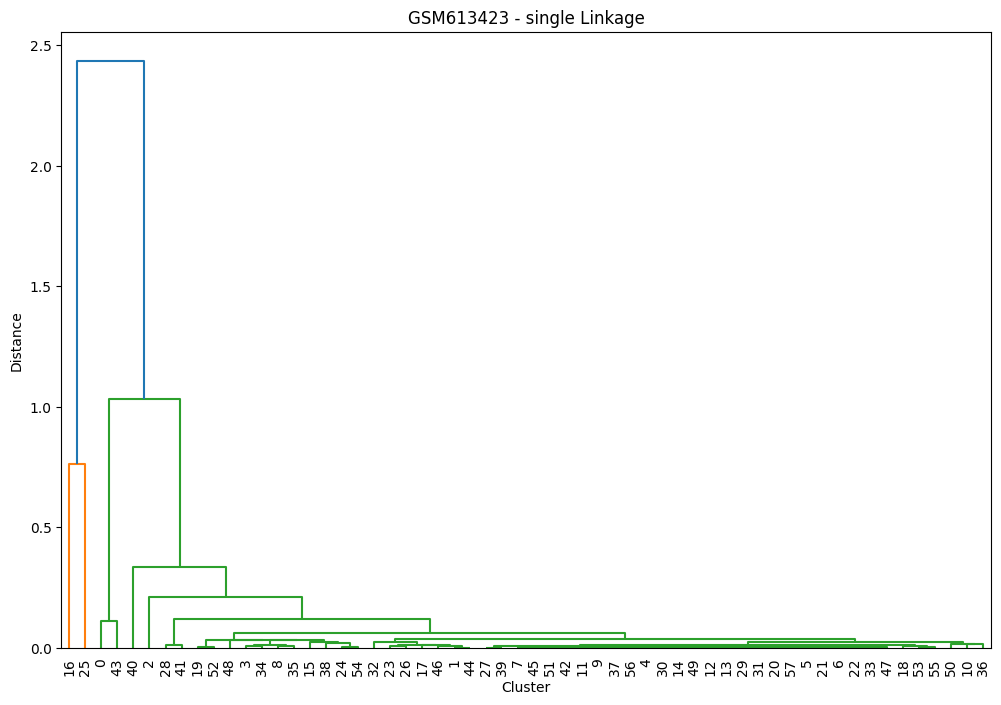

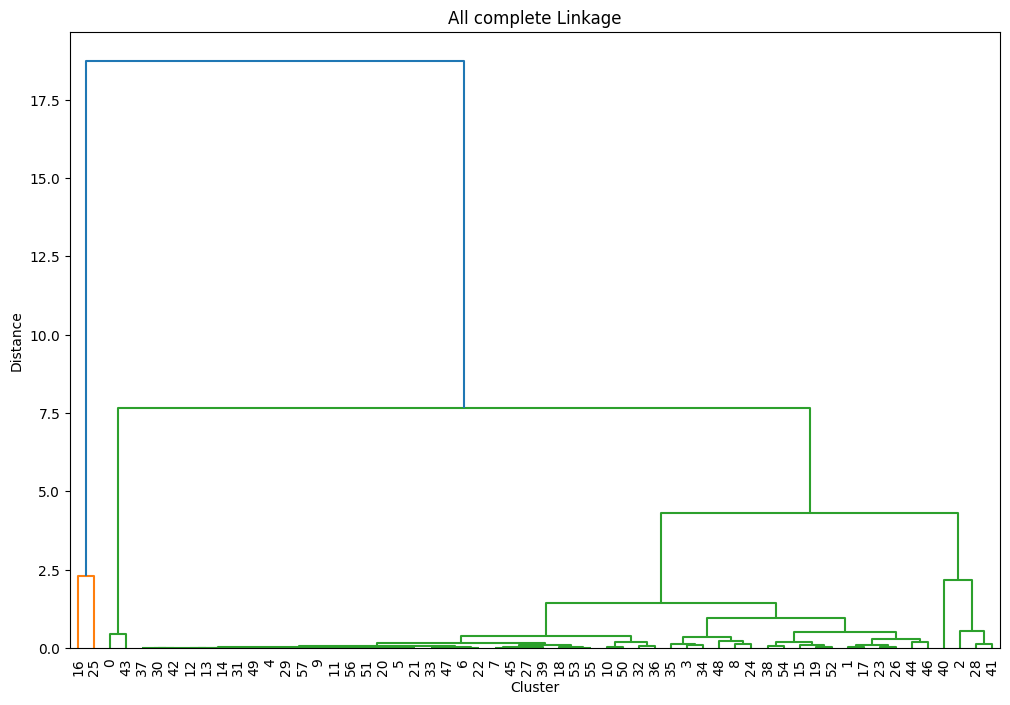

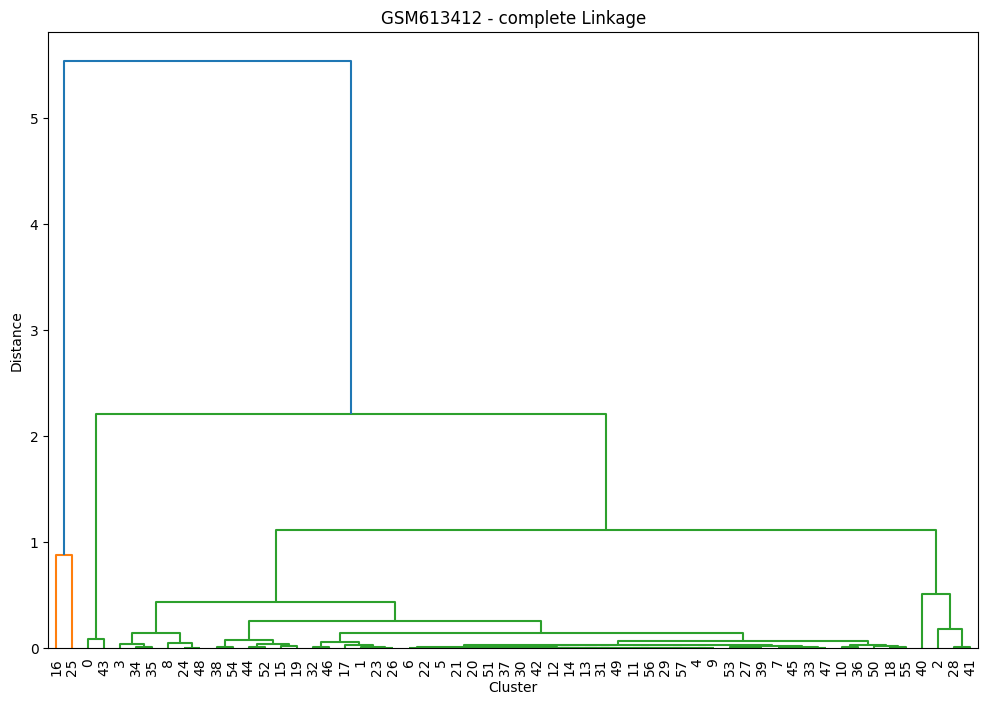

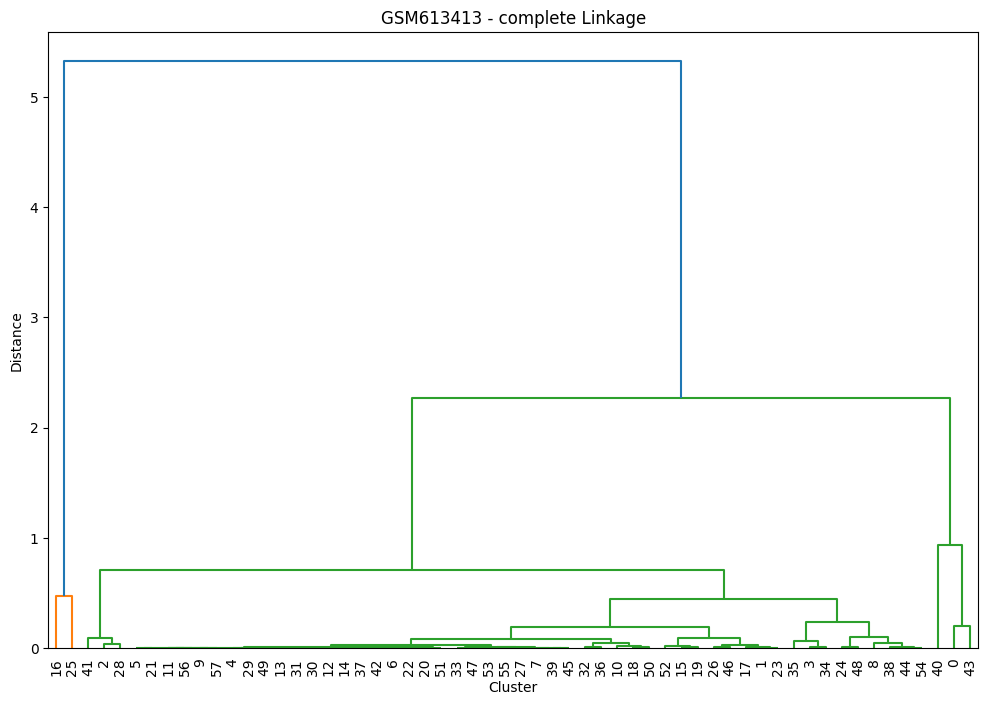

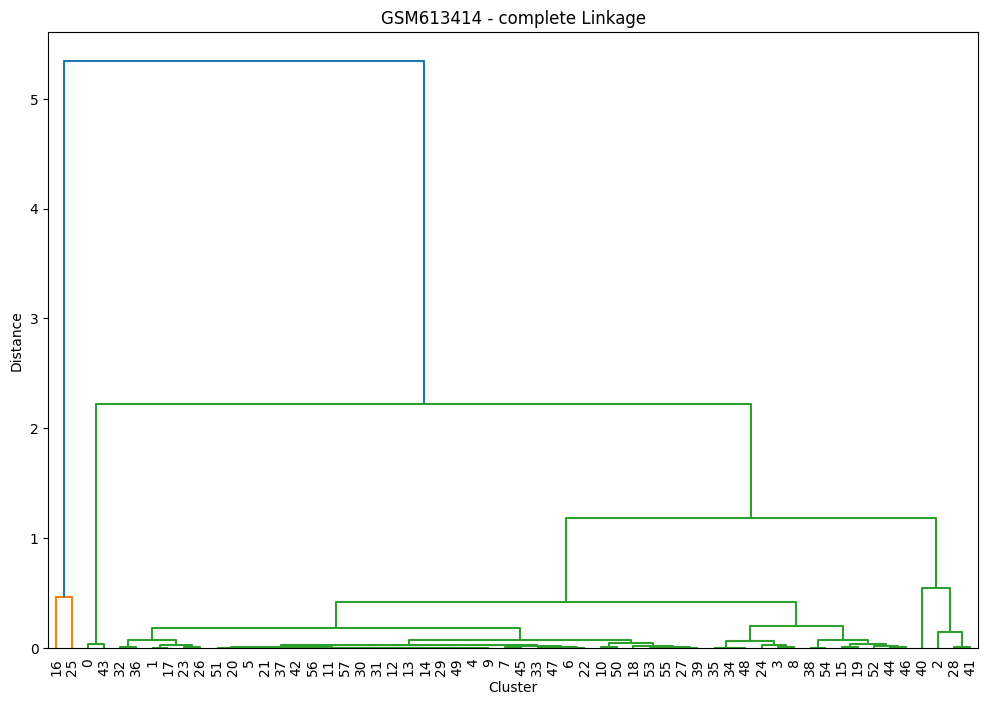

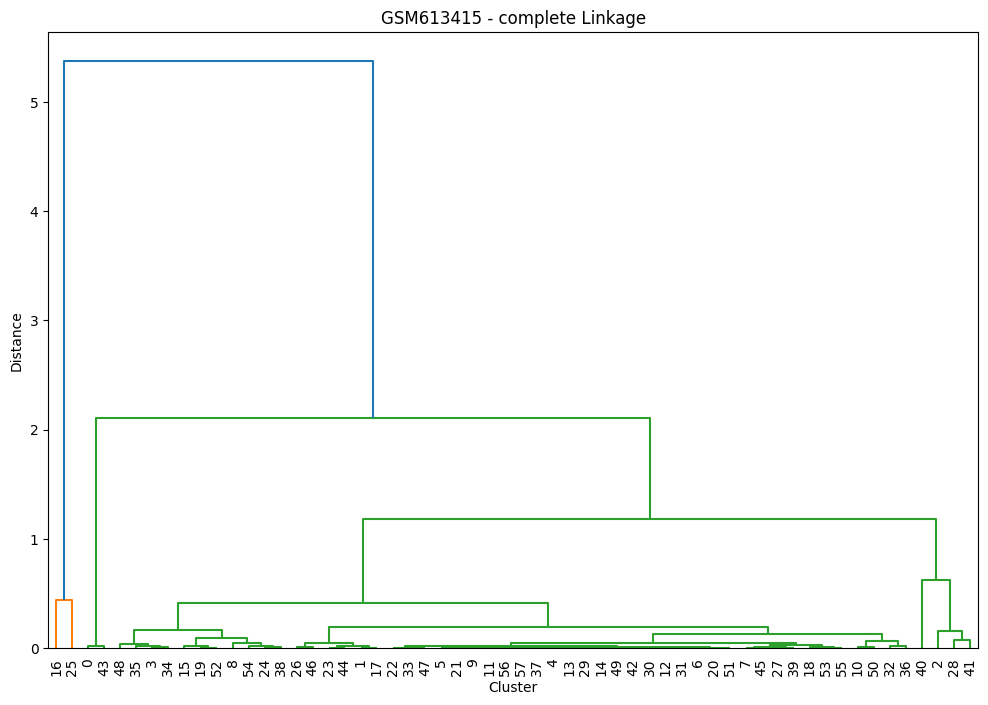

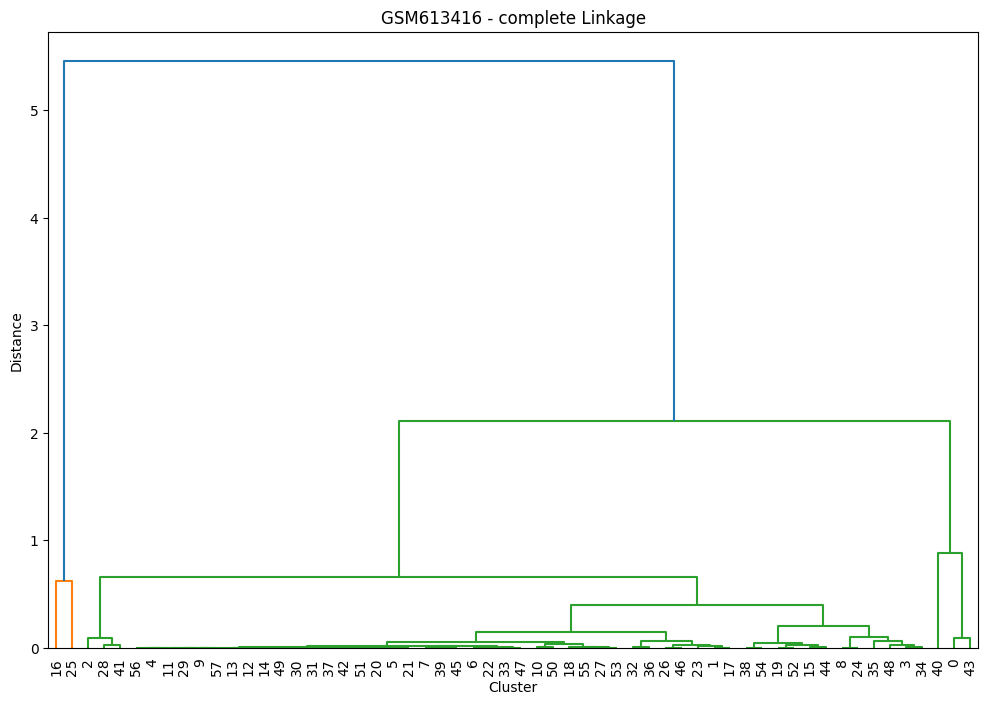

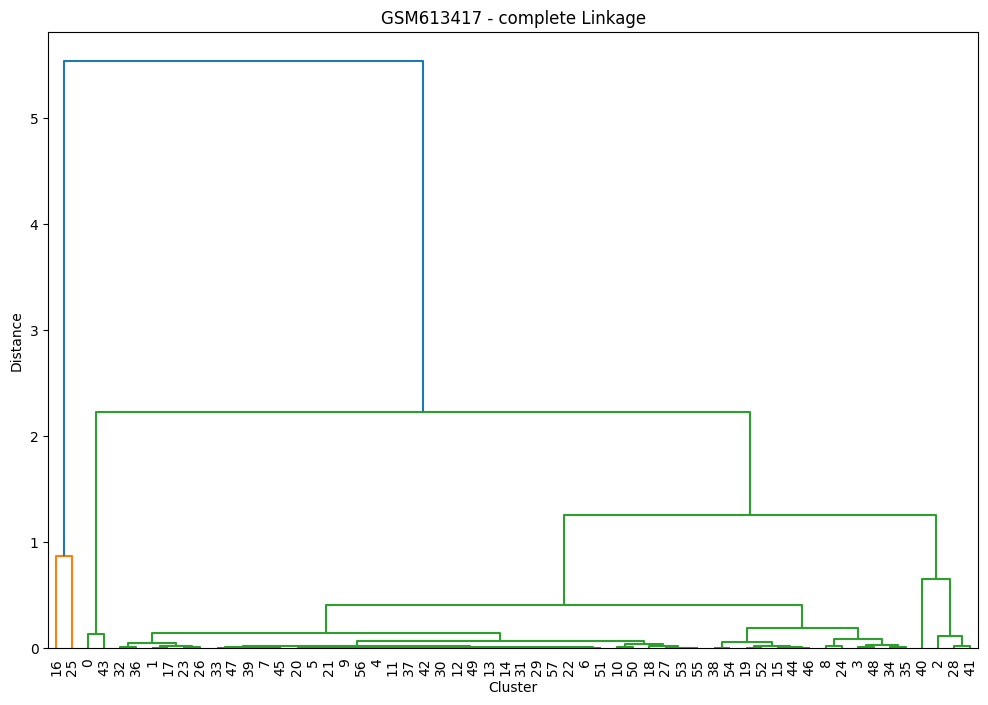

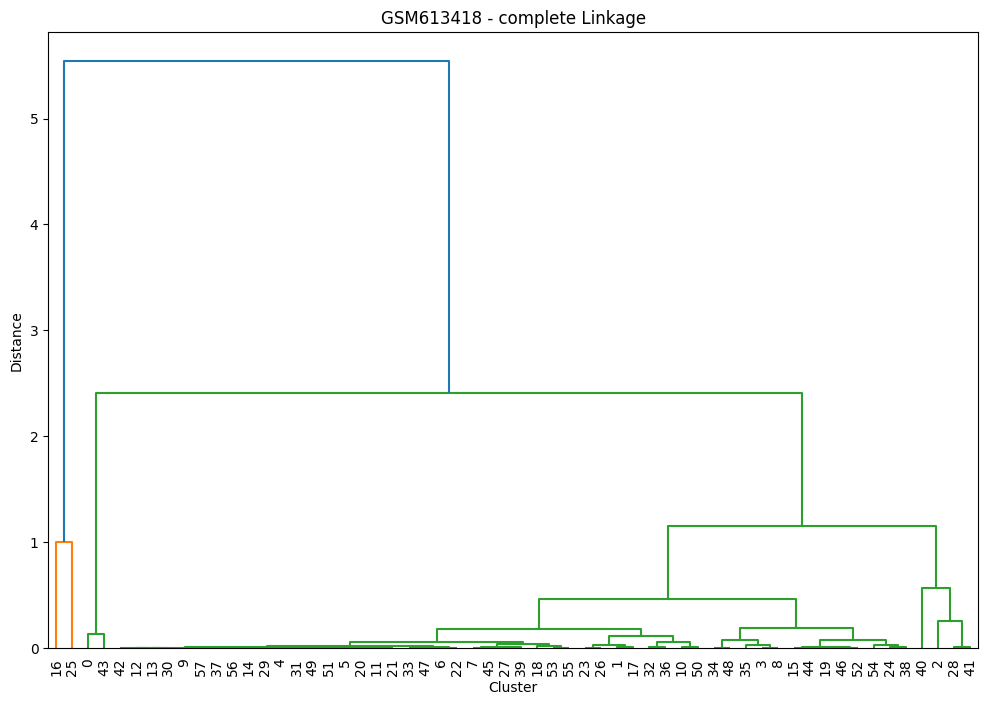

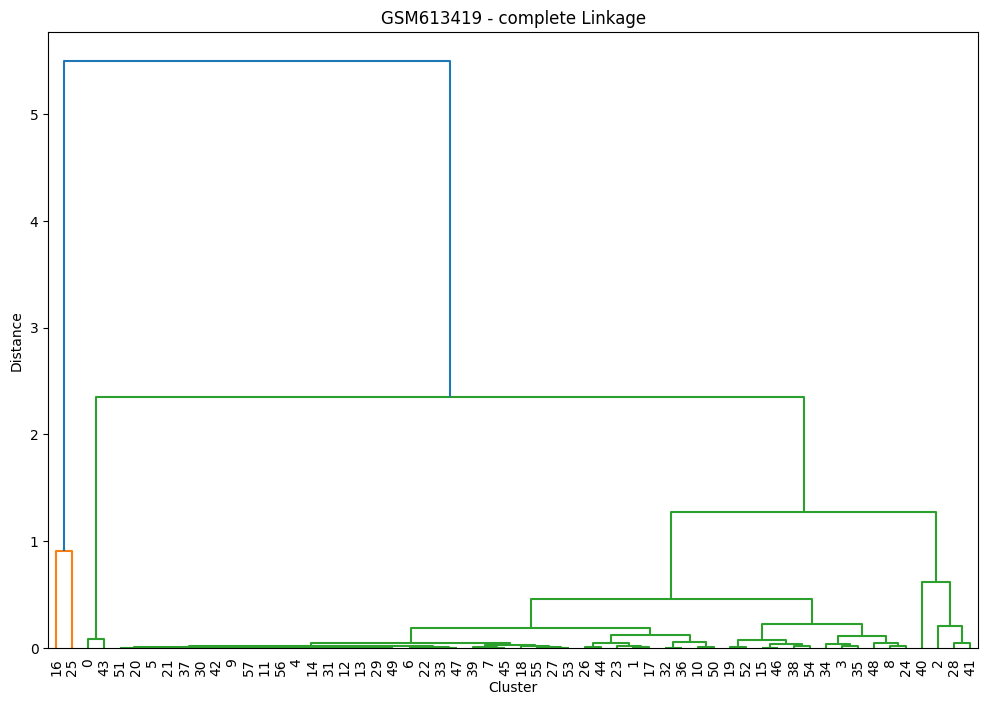

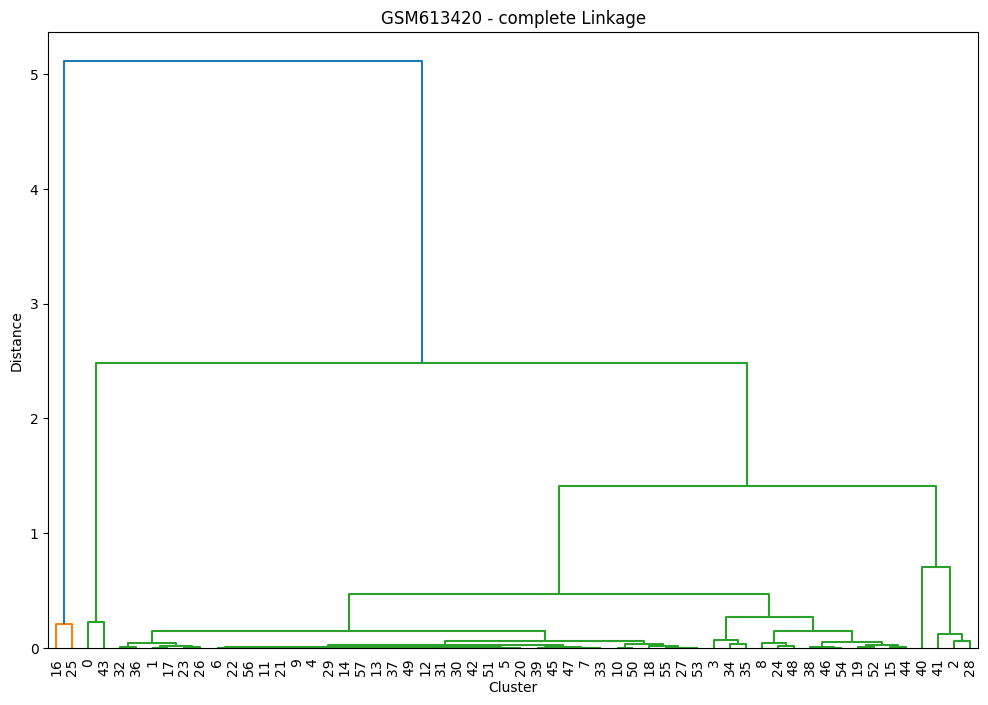

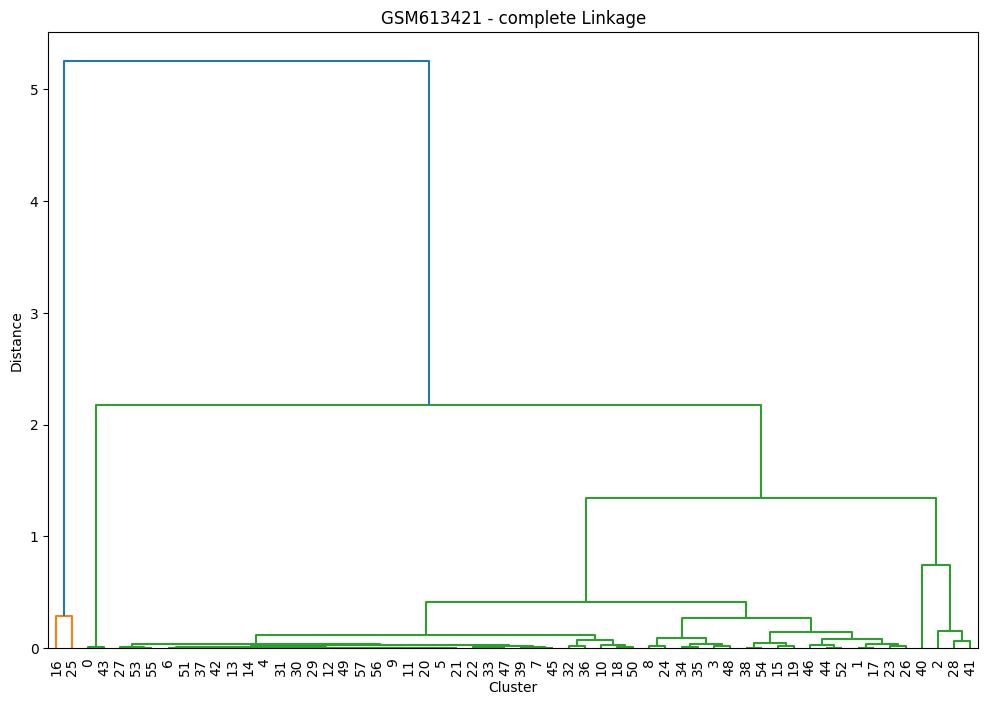

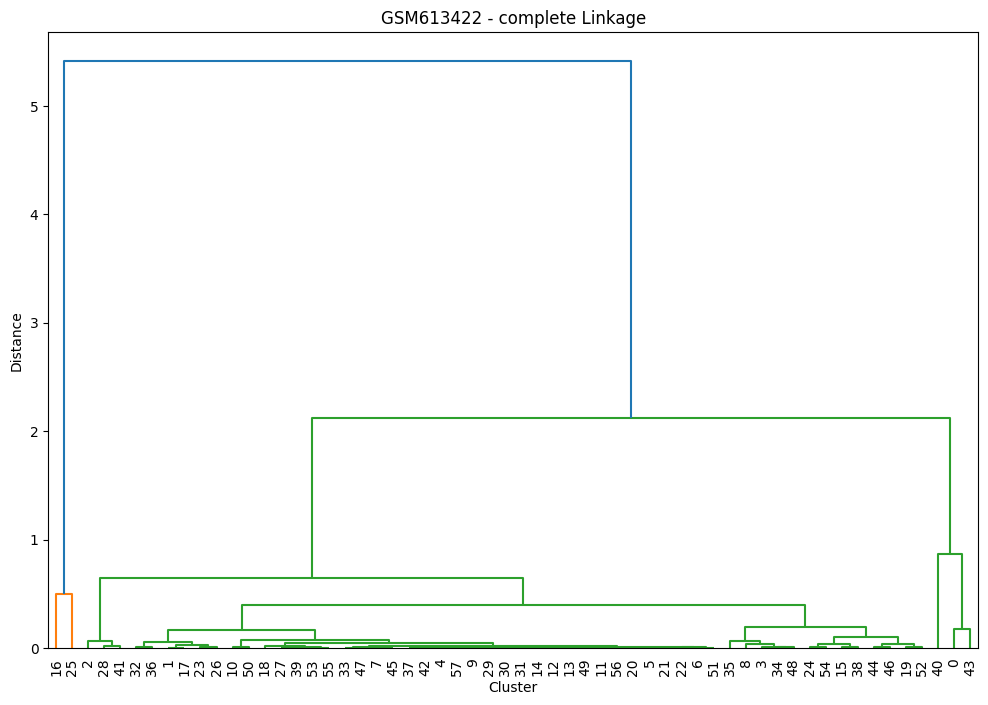

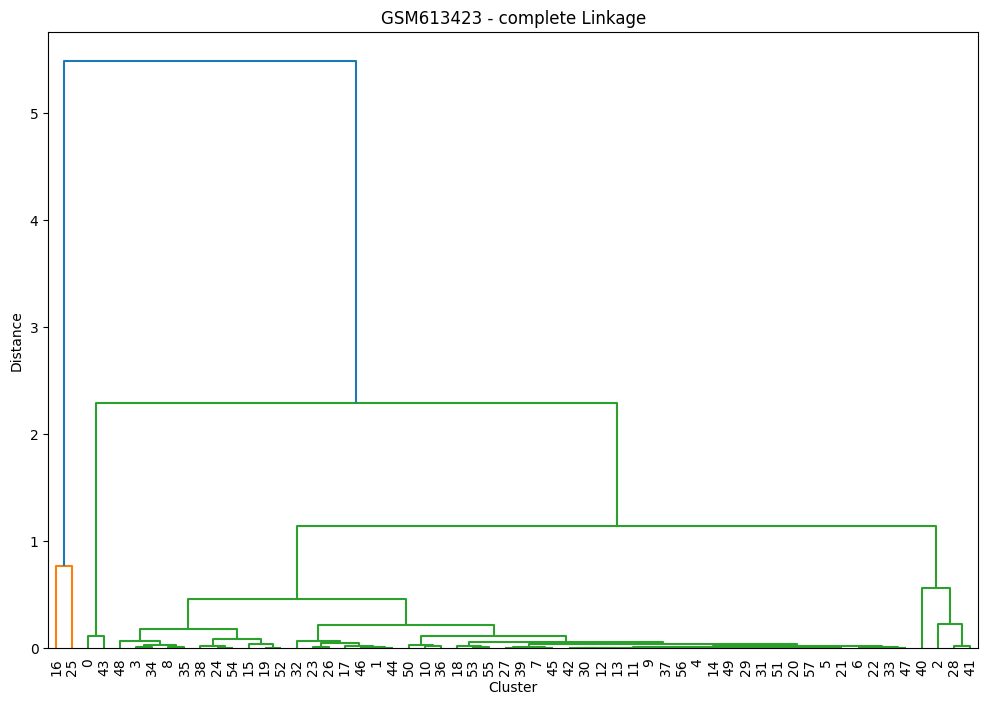

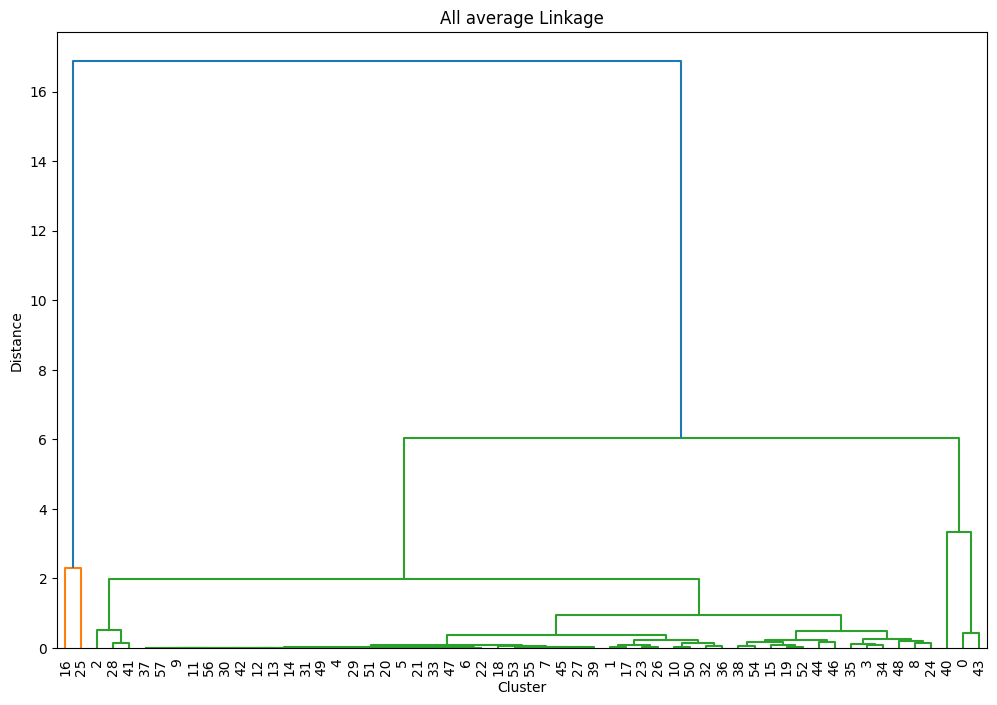

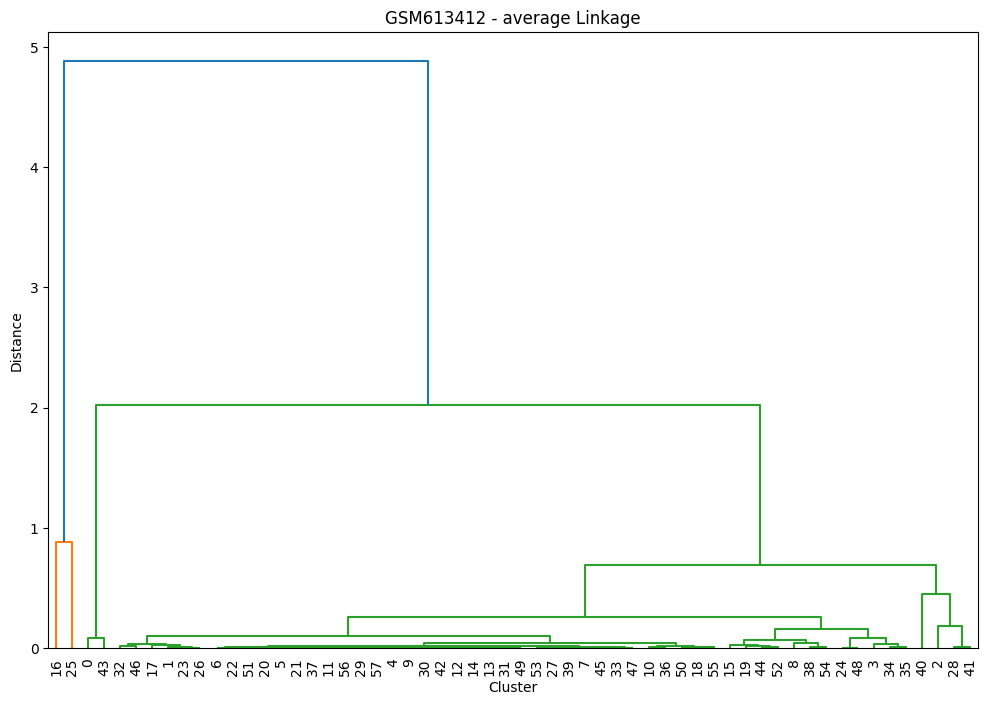

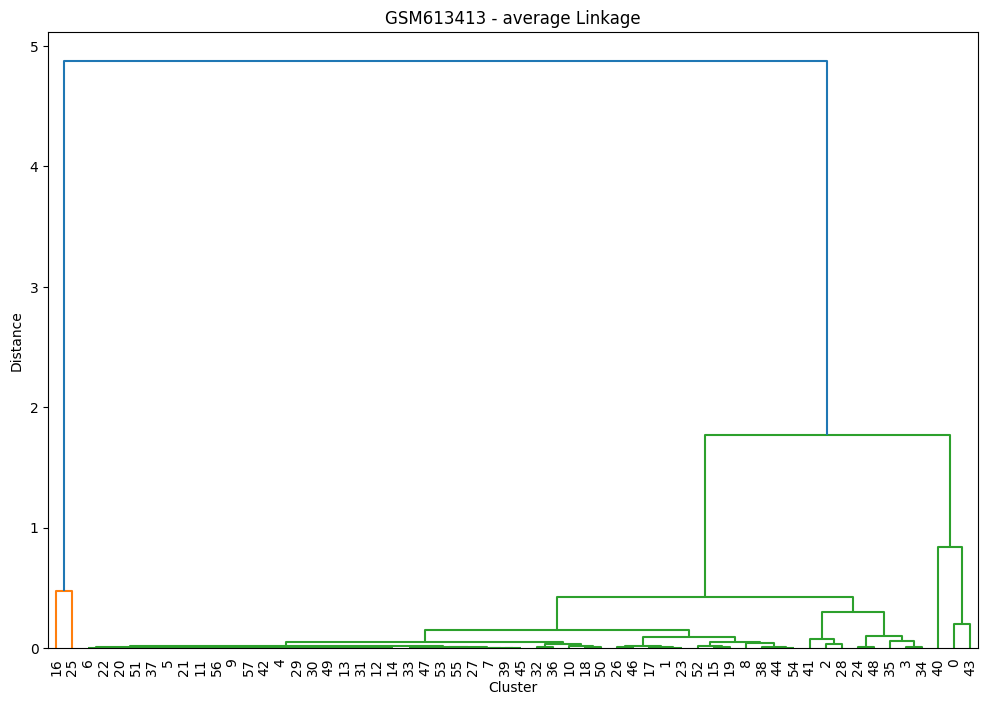

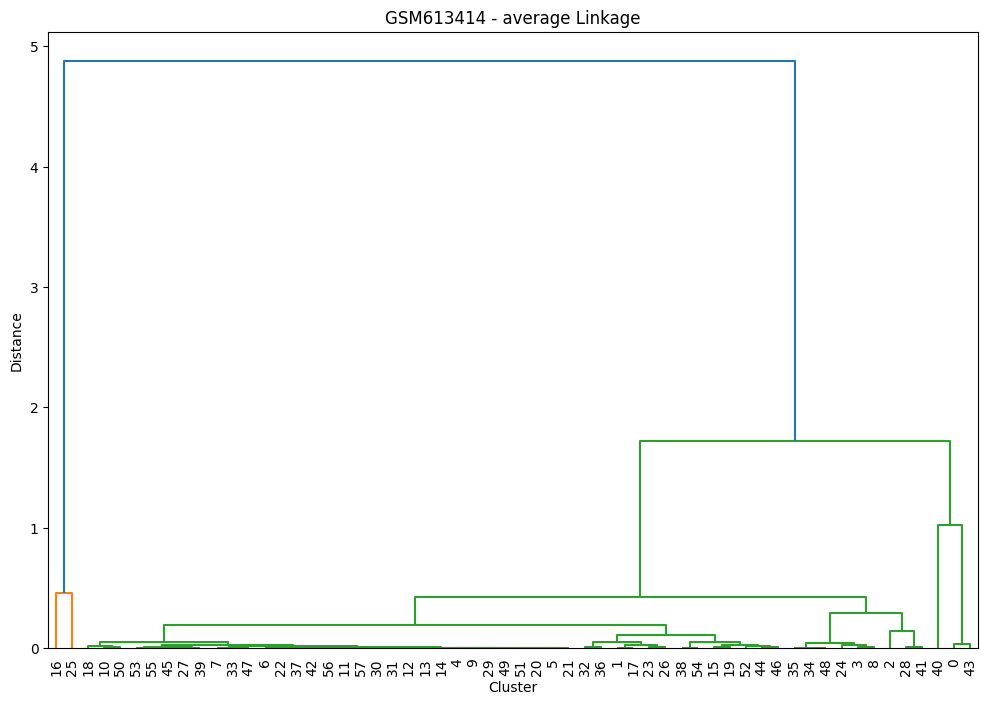

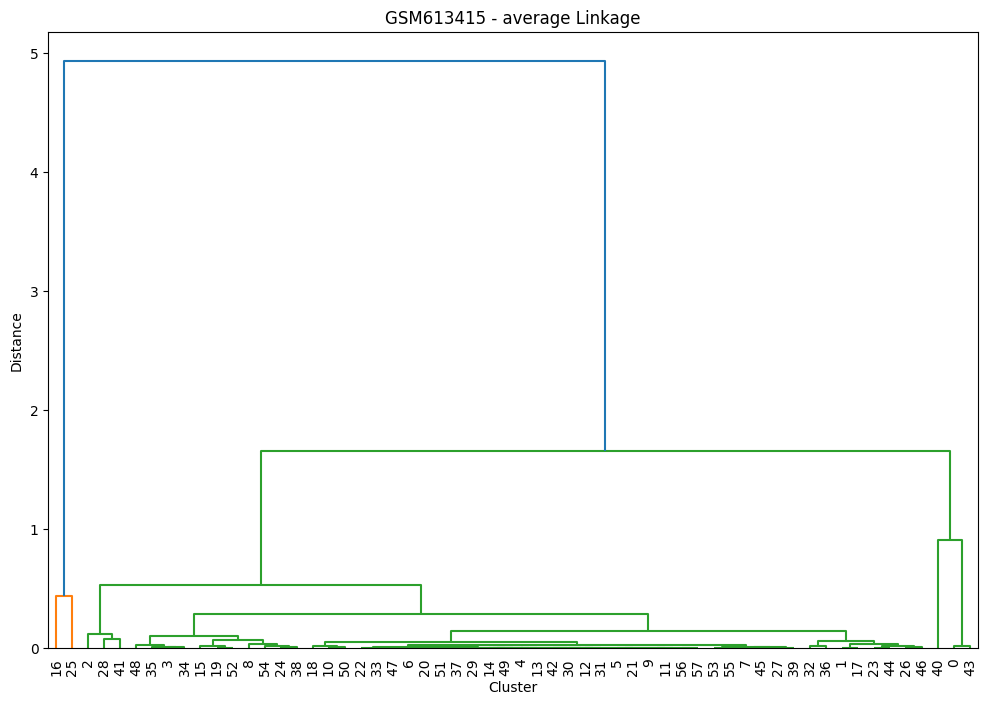

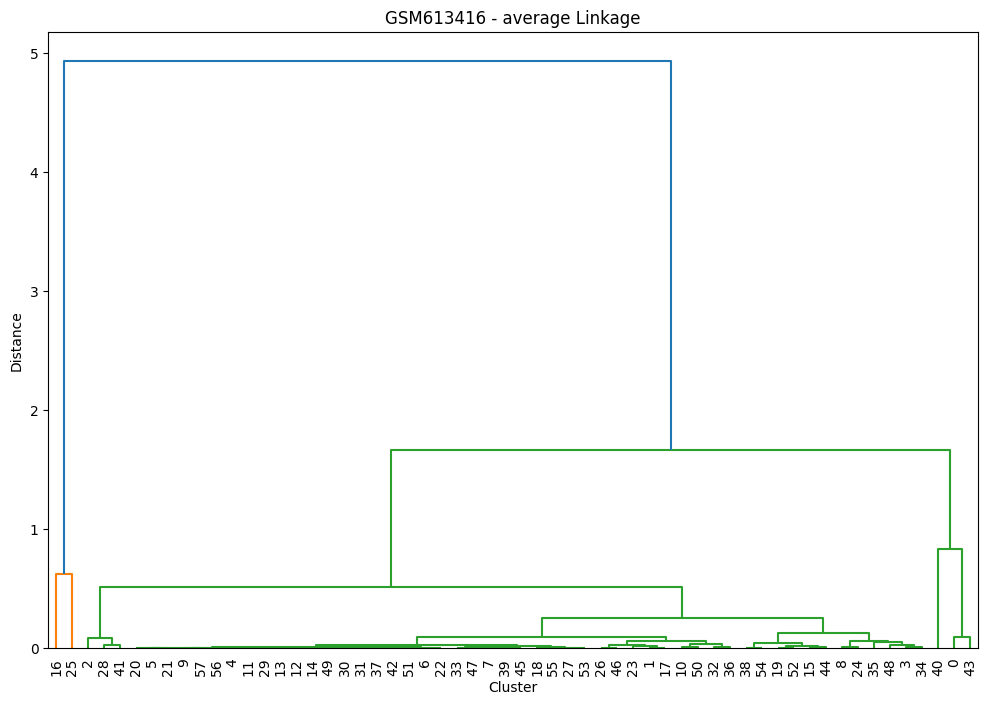

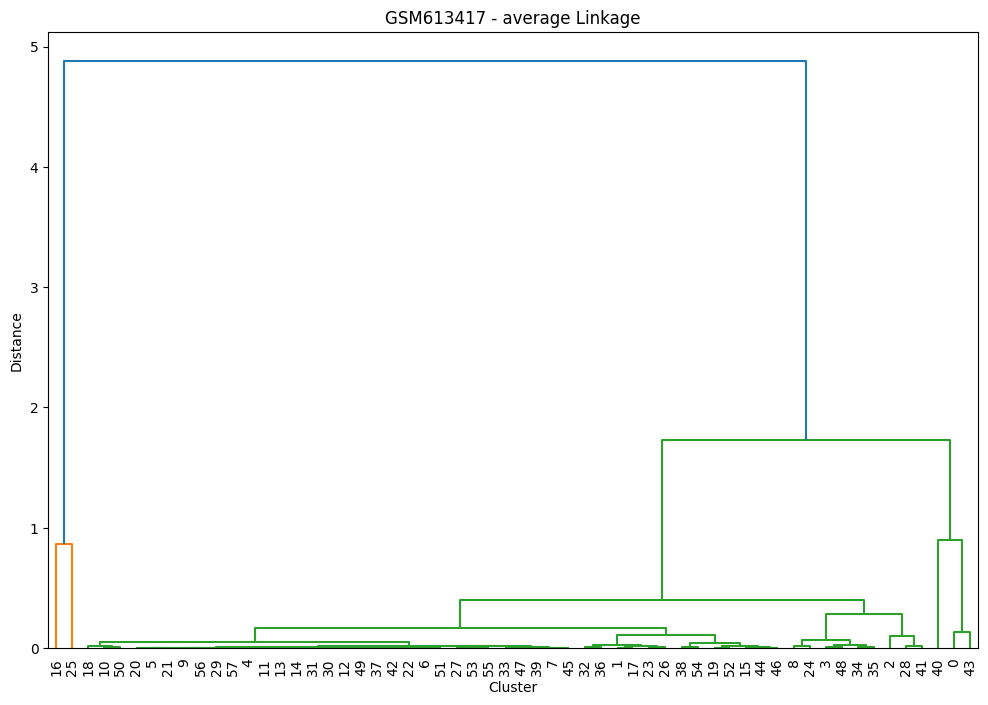

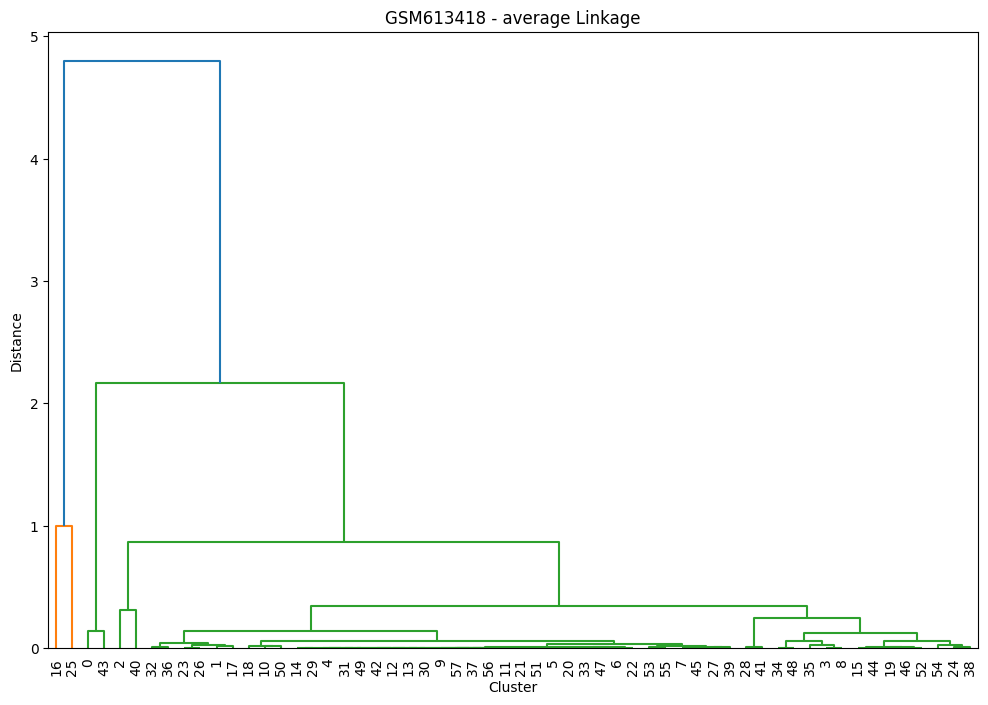

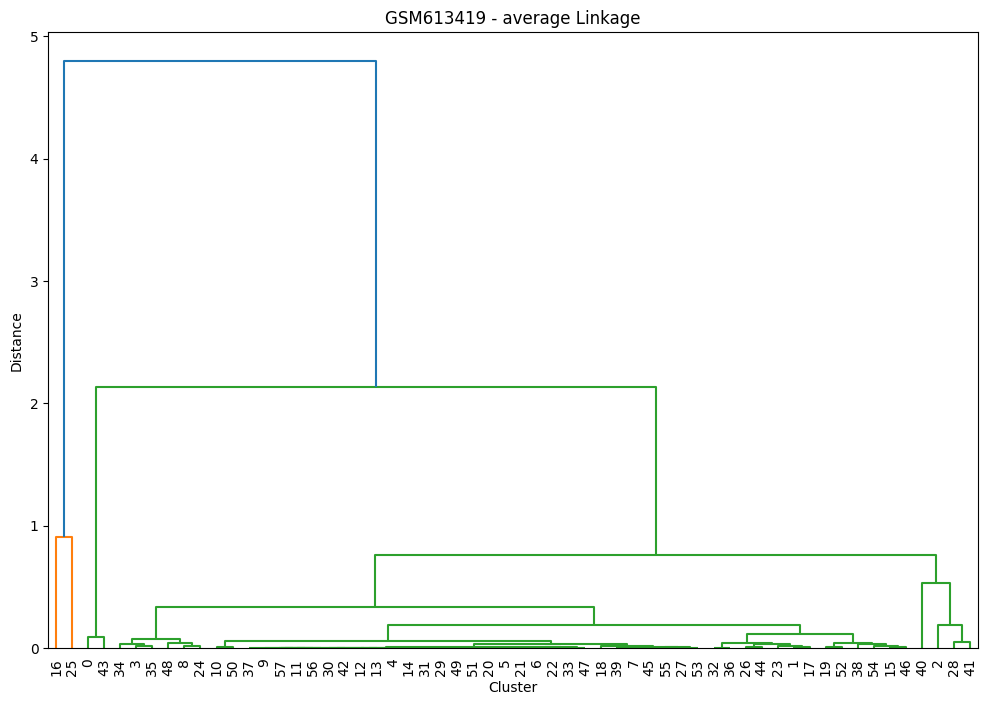

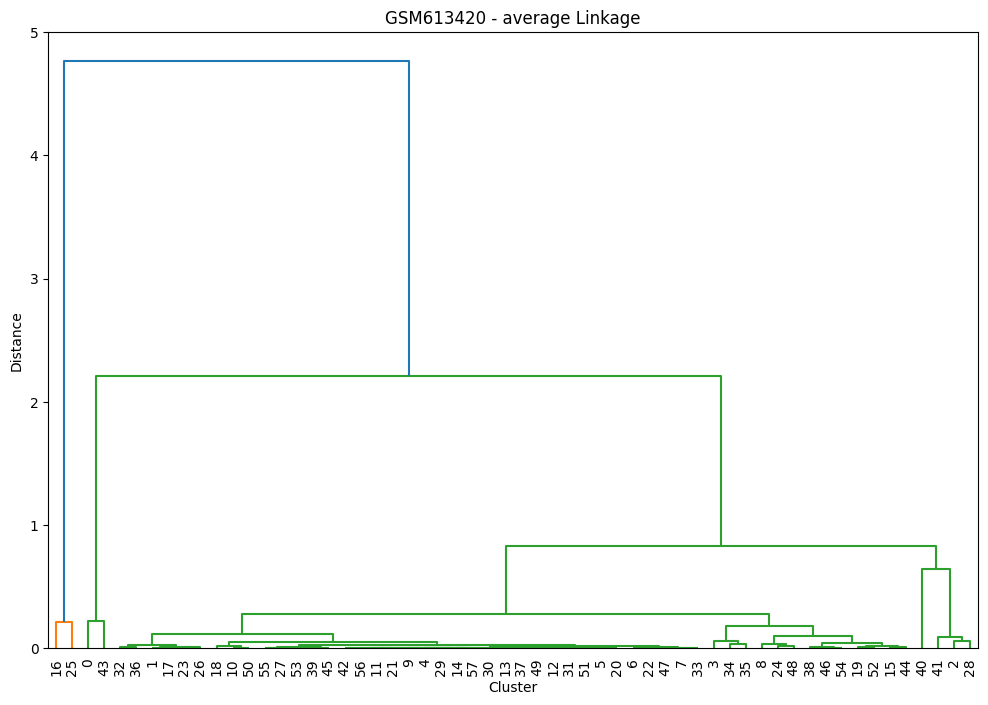

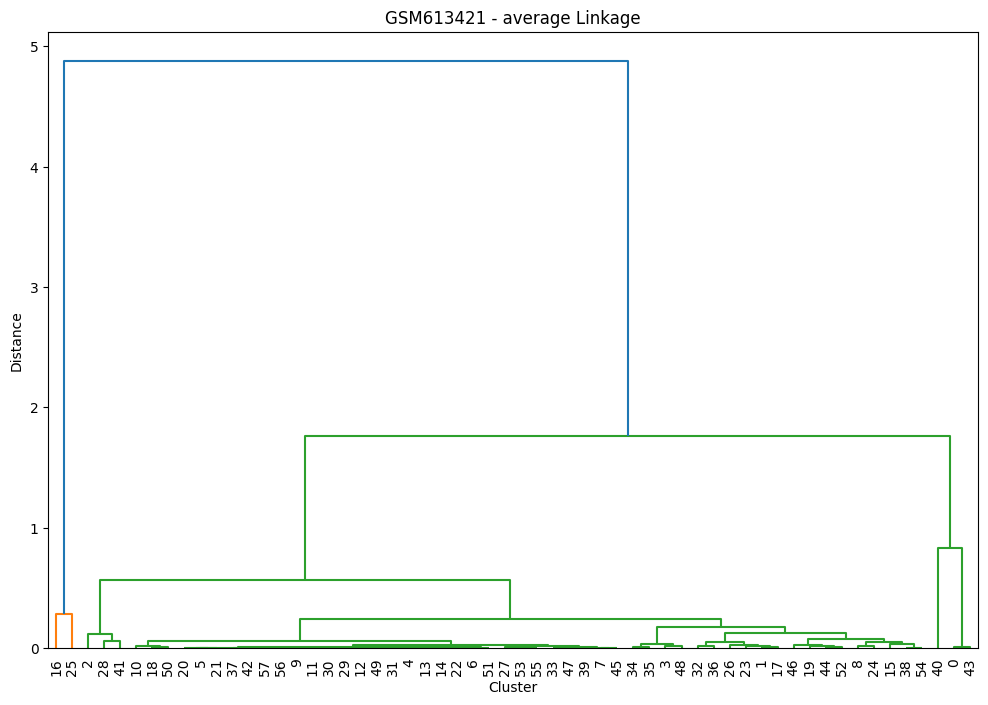

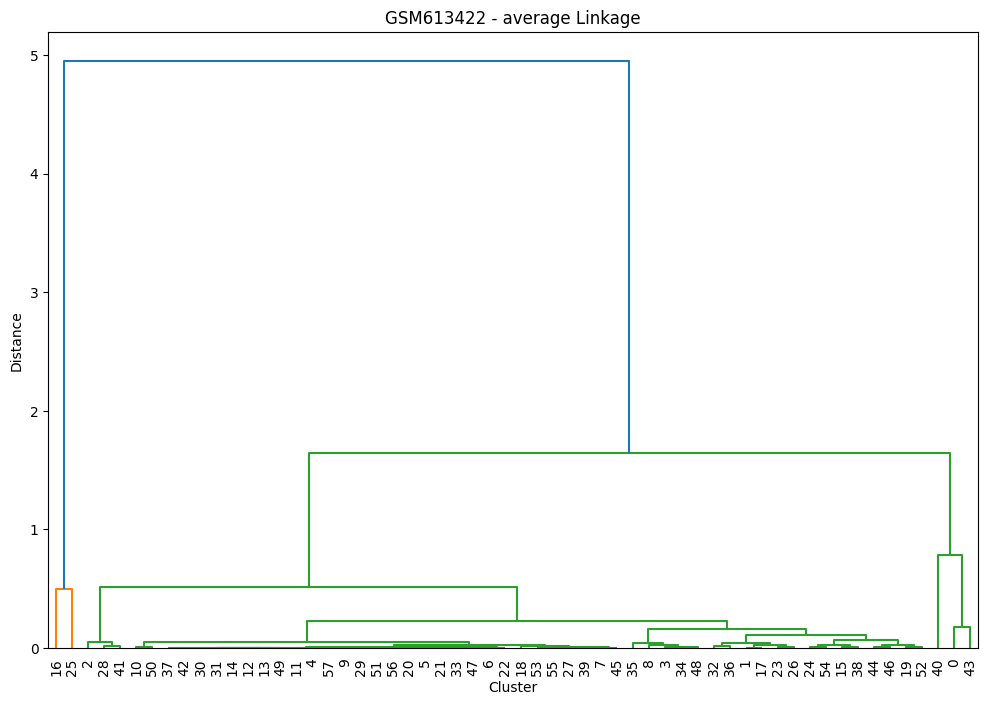

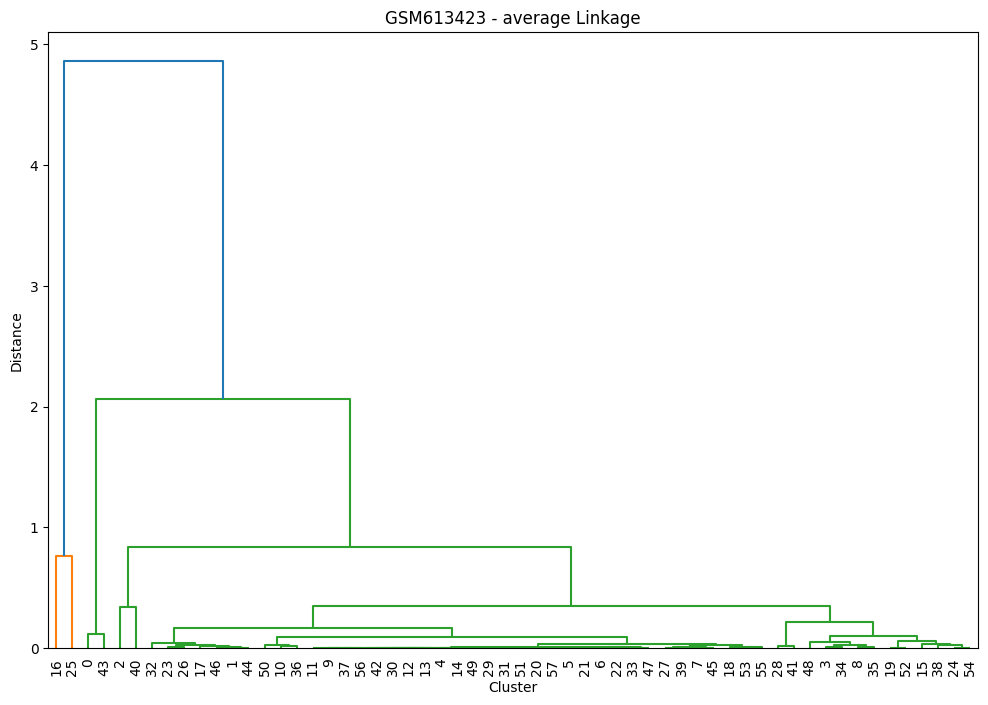

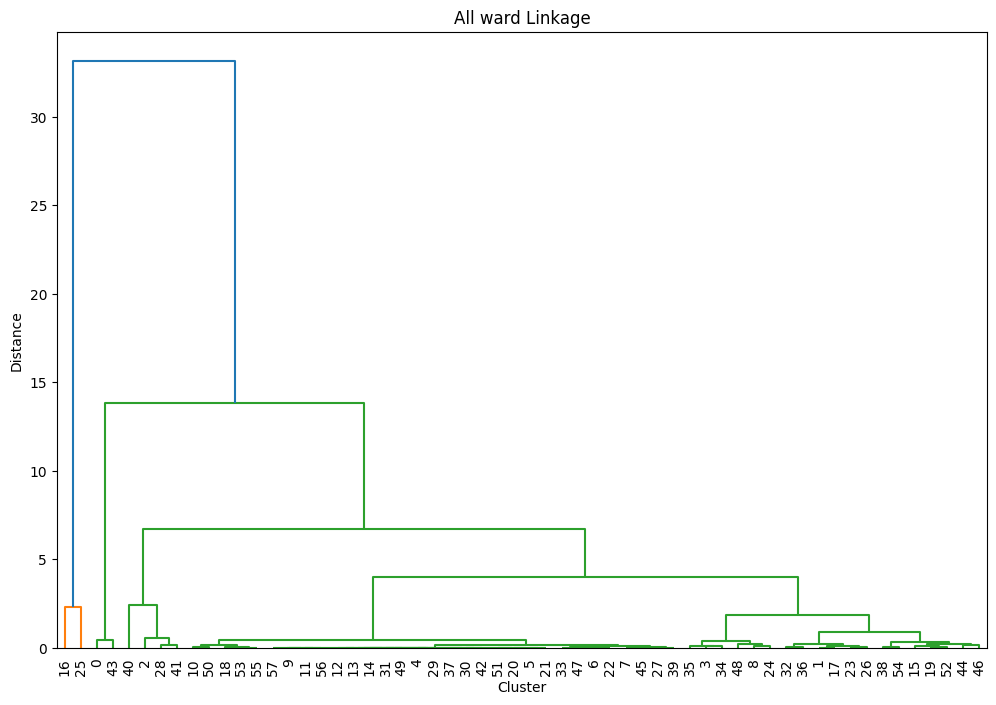

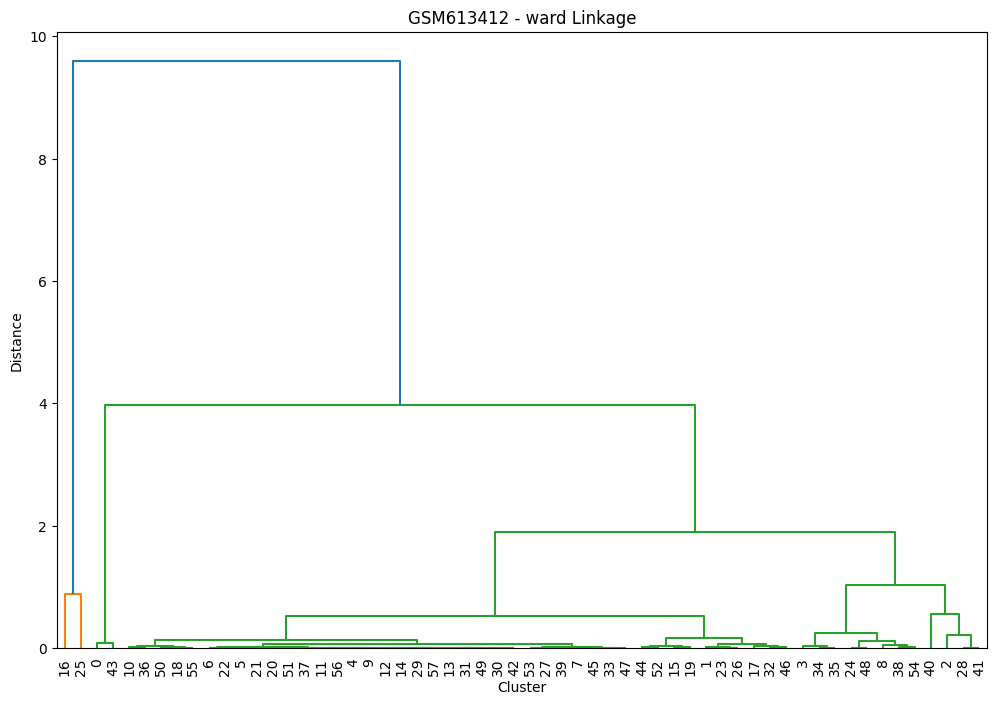

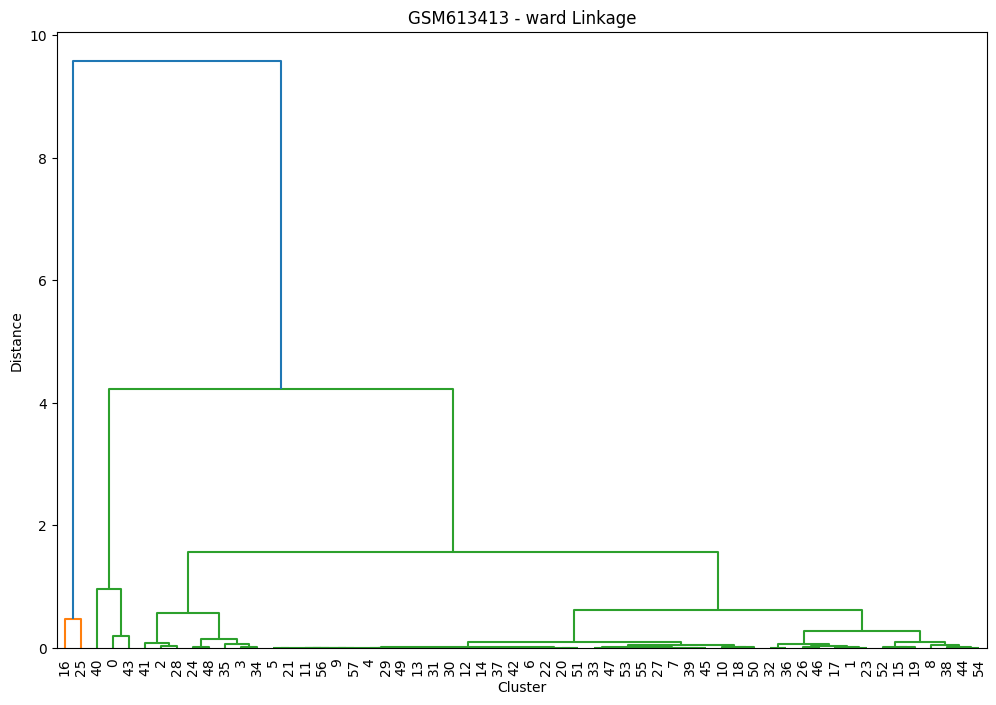

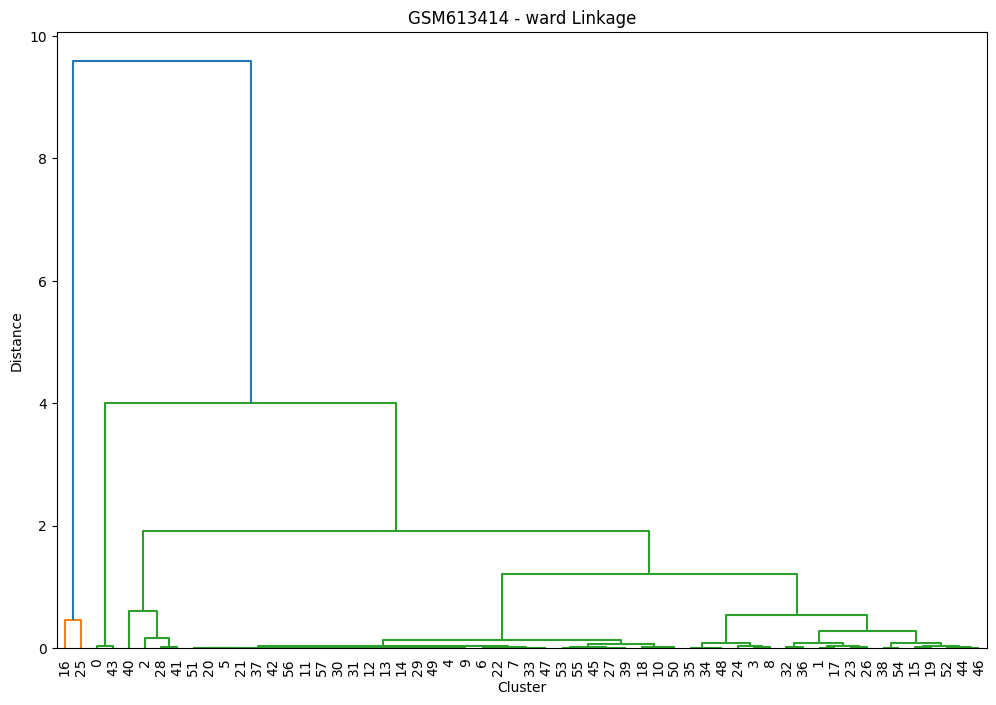

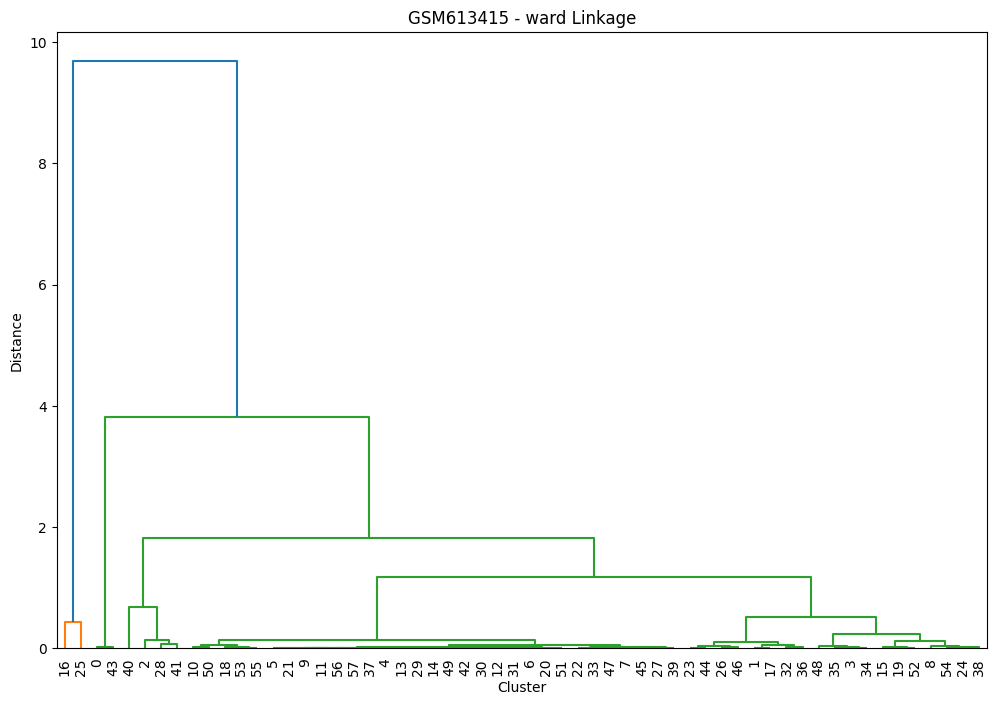

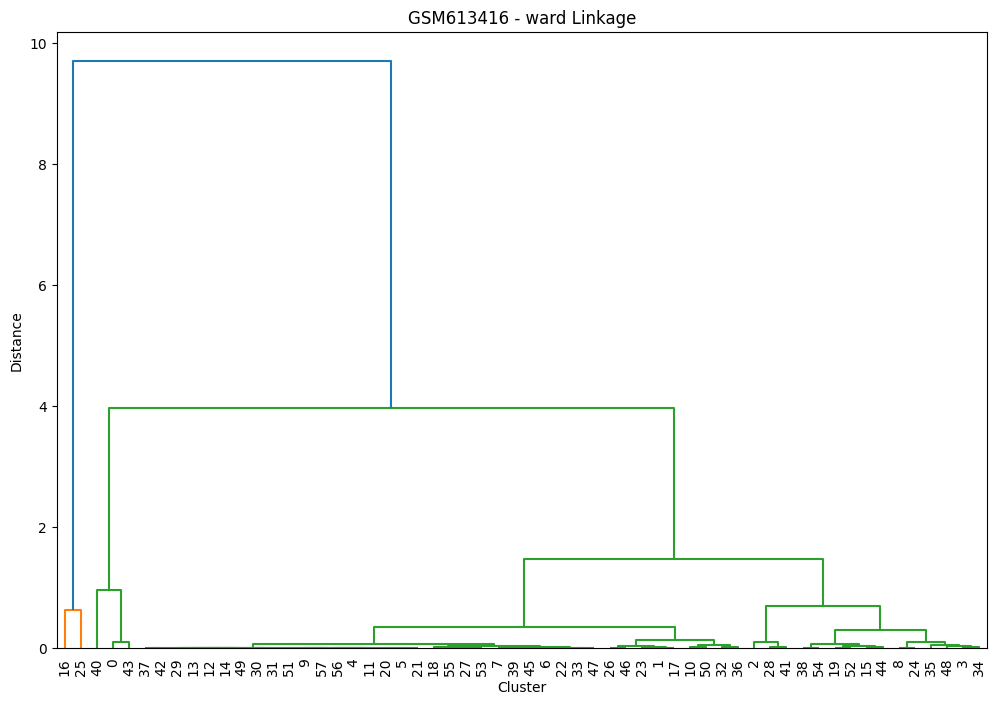

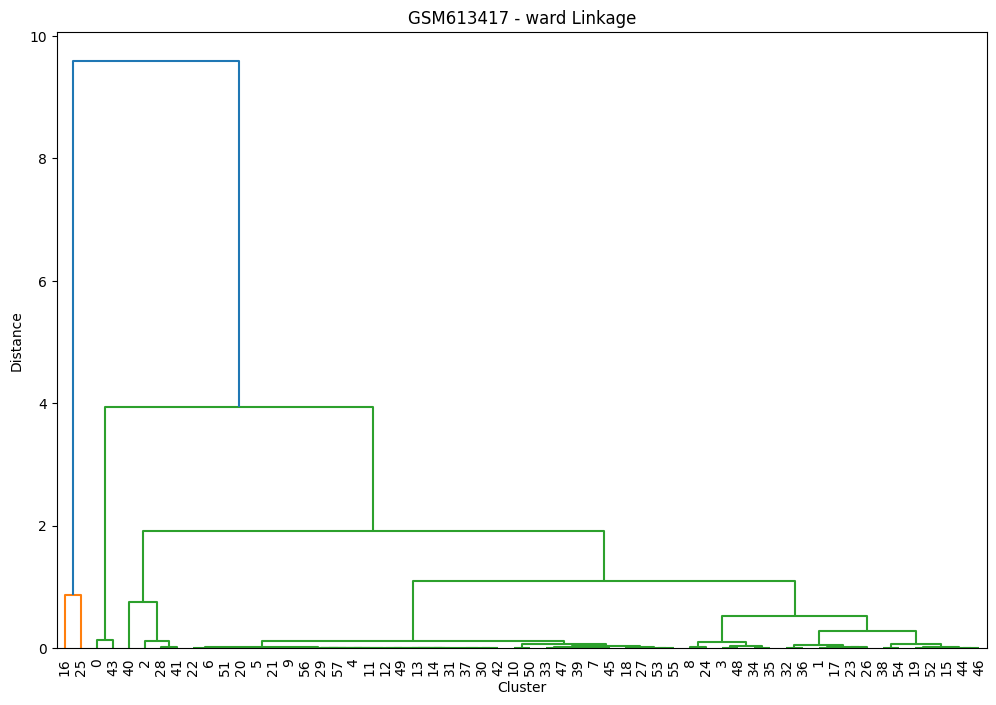

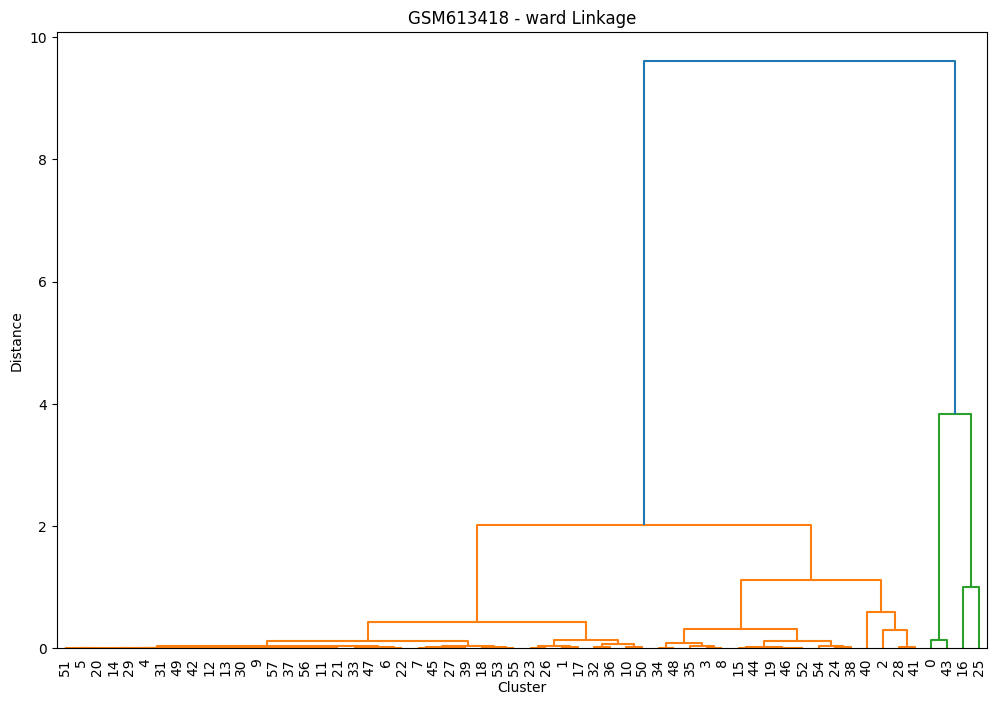

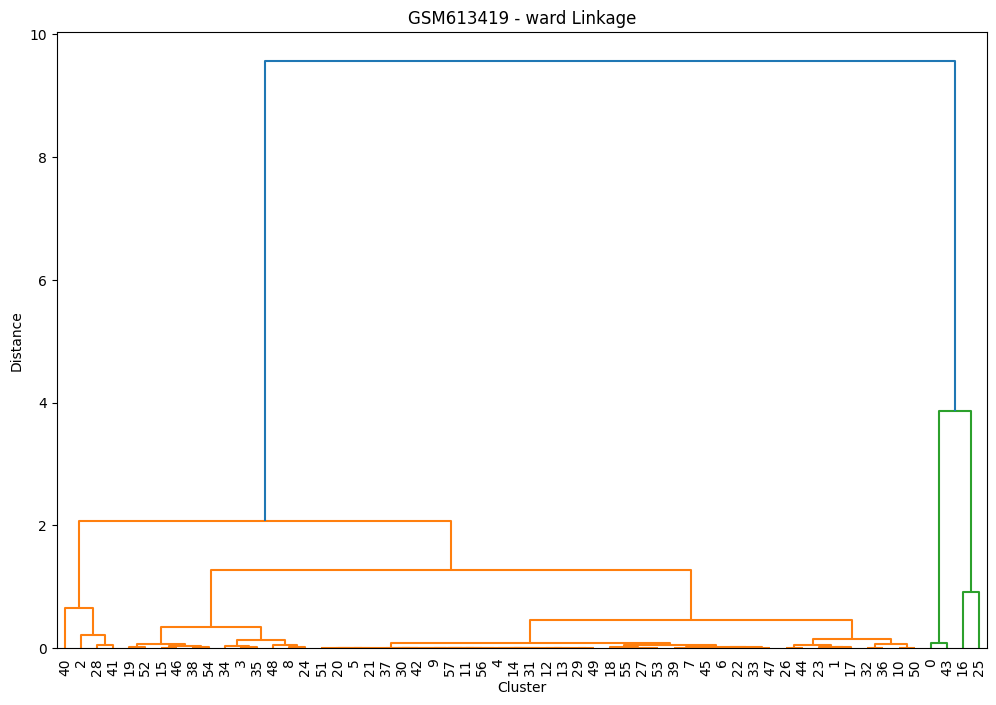

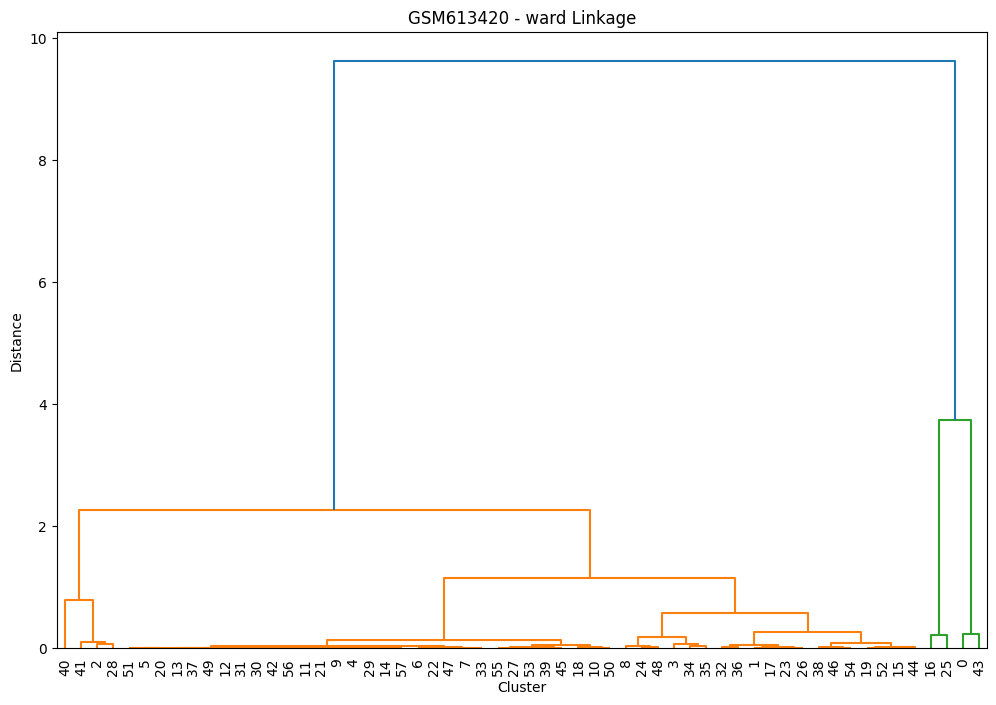

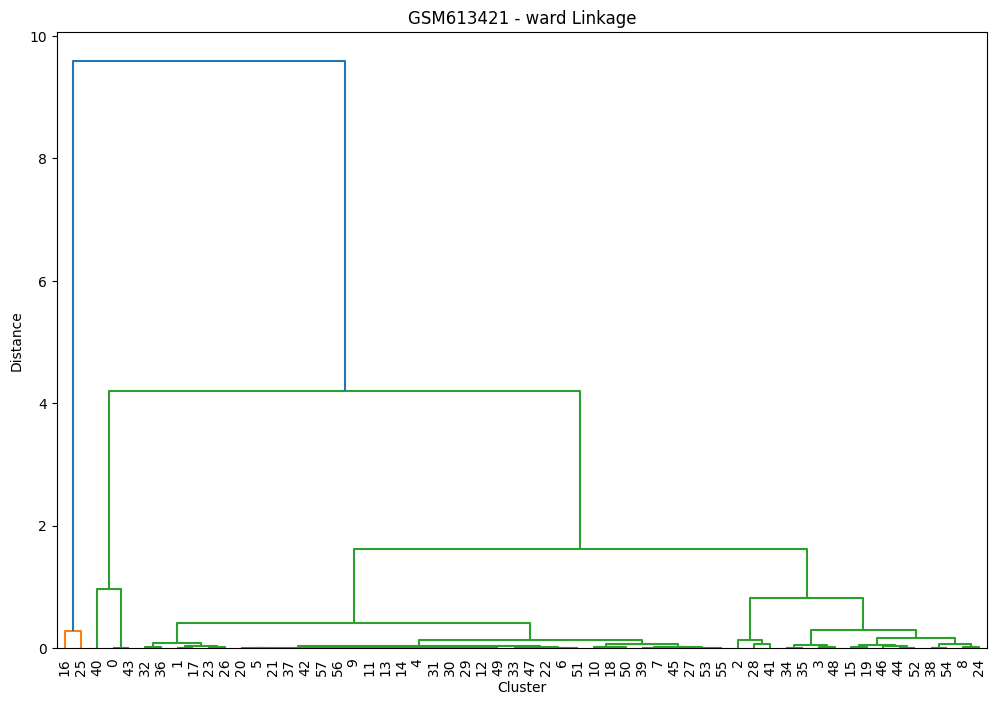

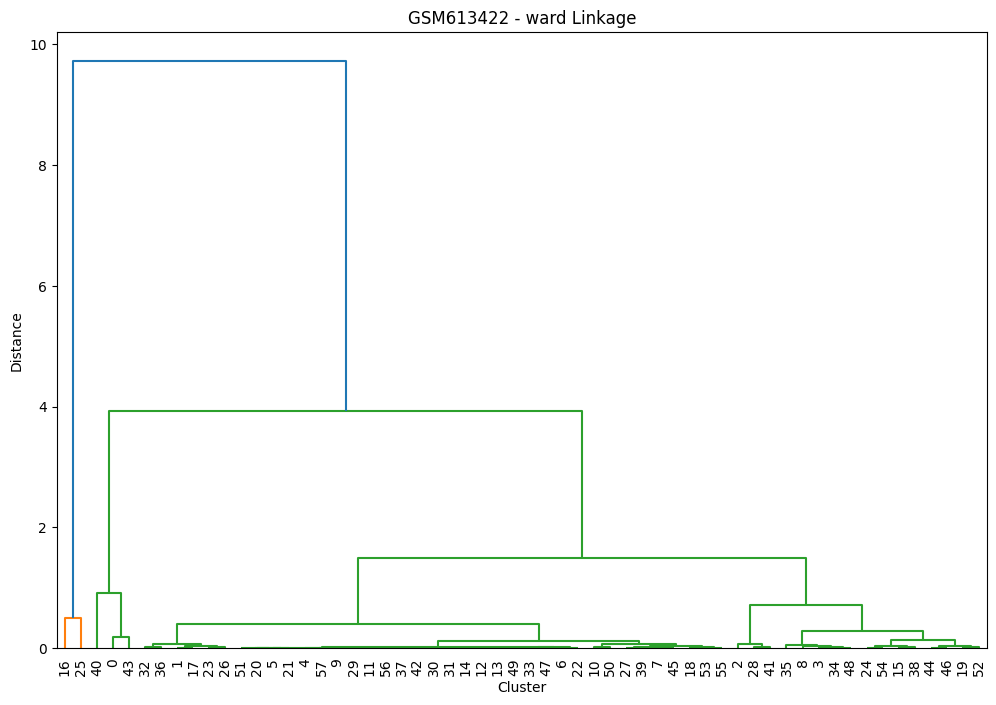

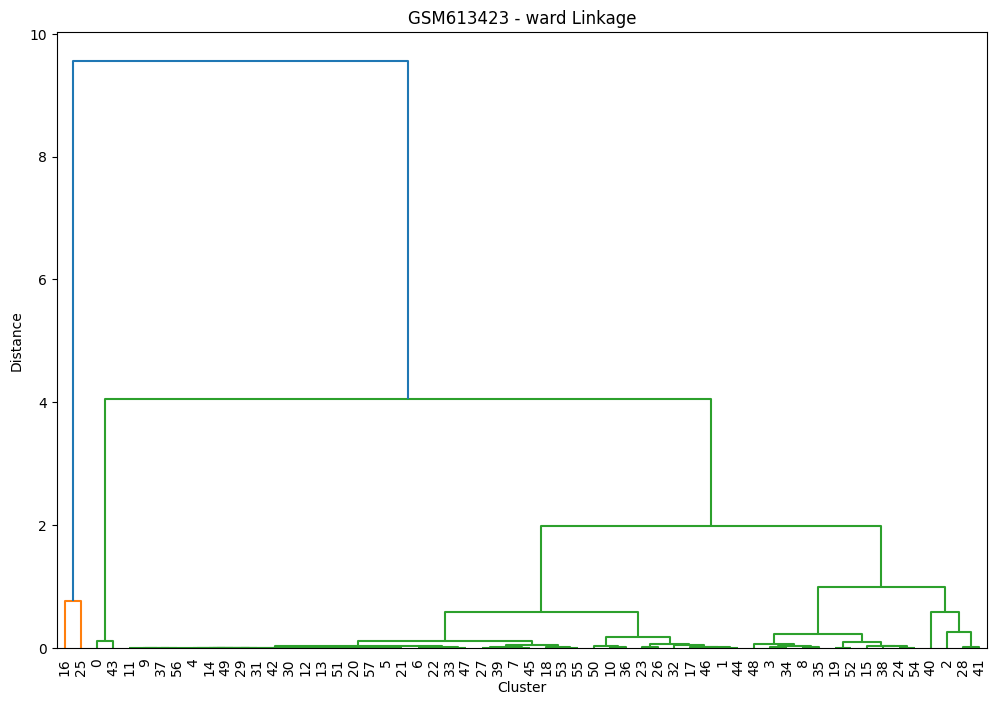

In [25]:
# For Gene Dataframe

for linkage_type in linkage_methods:
    hc = HierarchicalClustering(norm_genedata.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in norm_genedata.columns:
        feature_data = norm_genedata[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')